<table class="table table-bordered">
    <tr>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [176]:
# import the pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
import scipy.stats as stats
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OrdinalEncoder
from feature_engine.discretisation import EqualWidthDiscretiser
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC

### Step 1: Load and Explore the Data

In [177]:
allstar = pd.read_csv("Datasets/CSV/all_star.csv")
appearances = pd.read_csv("Datasets/CSV/appearances.csv")
batting = pd.read_csv("Datasets/CSV/batting.csv")
battingpostseason = pd.read_csv("Datasets/CSV/batting_postseason.csv")
college = pd.read_csv("Datasets/CSV/college.csv")
fielding = pd.read_csv("Datasets/CSV/fielding.csv")
fieldingoutfield = pd.read_csv("Datasets/CSV/fielding_outfield.csv")
fieldingpostseason = pd.read_csv("Datasets/CSV/fielding_postseason.csv")
halloffame = pd.read_csv("Datasets/CSV/hall_of_fame.csv")
homegame = pd.read_csv("Datasets/CSV/home_game.csv")
manager = pd.read_csv("Datasets/CSV/manager.csv")
manageraward = pd.read_csv("Datasets/CSV/manager_award.csv")
managerawardvote = pd.read_csv("Datasets/CSV/manager_award_vote.csv")
managerhalf = pd.read_csv("Datasets/CSV/manager_half.csv")
park = pd.read_csv("Datasets/CSV/park.csv")
pitching = pd.read_csv("Datasets/CSV/pitching.csv")
pitchingpostseason = pd.read_csv("Datasets/CSV/pitching_postseason.csv")
player = pd.read_csv("Datasets/CSV/player.csv")
playeraward = pd.read_csv("Datasets/CSV/player_award.csv")
playerawardvote = pd.read_csv("Datasets/CSV/player_award_vote.csv")
playercollege = pd.read_csv("Datasets/CSV/player_college.csv")
postseason = pd.read_csv("Datasets/CSV/postseason.csv")
salary = pd.read_csv("Datasets/CSV/salary.csv")
team = pd.read_csv("Datasets/CSV/team.csv")
teamfranchise = pd.read_csv("Datasets/CSV/team_franchise.csv")
teamhalf = pd.read_csv("Datasets/CSV/team_half.csv")

In [178]:
allstar.head()

player_id  year  game_num       game_id team_id league_id   gp  \
0  gomezle01  1933         0  ALS193307060     NYA        AL  1.0   
1  ferreri01  1933         0  ALS193307060     BOS        AL  1.0   
2  gehrilo01  1933         0  ALS193307060     NYA        AL  1.0   
3  gehrich01  1933         0  ALS193307060     DET        AL  1.0   
4  dykesji01  1933         0  ALS193307060     CHA        AL  1.0   

   starting_pos  
0           1.0  
1           2.0  
2           3.0  
3           4.0  
4           5.0

In [179]:
appearances.head()

year team_id league_id  player_id  g_all  gs  g_batting  g_defense  g_p  \
0  1871     BS1       NaN  barnero01   31.0 NaN         31       31.0    0   
1  1871     BS1       NaN  barrofr01   18.0 NaN         18       18.0    0   
2  1871     BS1       NaN  birdsda01   29.0 NaN         29       29.0    0   
3  1871     BS1       NaN   conefr01   19.0 NaN         19       19.0    0   
4  1871     BS1       NaN  gouldch01   31.0 NaN         31       31.0    0   

   g_c  ...  g_2b  g_3b  g_ss  g_lf  g_cf  g_rf  g_of  g_dh  g_ph  g_pr  
0    0  ...    16     0    15     0     0     0     0   NaN   NaN   NaN  
1    0  ...     1     0     0    13     0     4    17   NaN   NaN   NaN  
2    7  ...     0     0     0     0     0    27    27   NaN   NaN   NaN  
3    0  ...     0     0     0    18     0     1    18   NaN   NaN   NaN  
4    0  ...     0     0     0     0     0     1     1   NaN   NaN   NaN  

[5 rows x 21 columns]

In [180]:
batting.head()

player_id  year  stint team_id league_id   g     ab     r     h  double  \
0  abercda01  1871      1     TRO       NaN   1    4.0   0.0   0.0     0.0   
1   addybo01  1871      1     RC1       NaN  25  118.0  30.0  32.0     6.0   
2  allisar01  1871      1     CL1       NaN  29  137.0  28.0  40.0     4.0   
3  allisdo01  1871      1     WS3       NaN  27  133.0  28.0  44.0    10.0   
4  ansonca01  1871      1     RC1       NaN  25  120.0  29.0  39.0    11.0   

   ...   rbi   sb   cs   bb   so  ibb  hbp  sh  sf  g_idp  
0  ...   0.0  0.0  0.0  0.0  0.0  NaN  NaN NaN NaN    NaN  
1  ...  13.0  8.0  1.0  4.0  0.0  NaN  NaN NaN NaN    NaN  
2  ...  19.0  3.0  1.0  2.0  5.0  NaN  NaN NaN NaN    NaN  
3  ...  27.0  1.0  1.0  0.0  2.0  NaN  NaN NaN NaN    NaN  
4  ...  16.0  6.0  2.0  2.0  1.0  NaN  NaN NaN NaN    NaN  

[5 rows x 22 columns]

In [181]:
battingpostseason.head()

year round  player_id team_id league_id  g  ab  r  h  double  ...  rbi  sb  \
0  1884    WS  becanbu01     NY4        AA  1   2  0  1       0  ...    0   0   
1  1884    WS  bradyst01     NY4        AA  3  10  1  0       0  ...    0   0   
2  1884    WS  esterdu01     NY4        AA  3  10  0  3       1  ...    0   1   
3  1884    WS  forstto01     NY4        AA  1   3  0  0       0  ...    0   0   
4  1884    WS  keefeti01     NY4        AA  2   5  0  1       0  ...    0   0   

   cs  bb  so  ibb  hbp  sh  sf  g_idp  
0 NaN   0   0  0.0  NaN NaN NaN    NaN  
1 NaN   0   1  0.0  NaN NaN NaN    NaN  
2 NaN   0   3  0.0  NaN NaN NaN    NaN  
3 NaN   0   1  0.0  NaN NaN NaN    NaN  
4 NaN   0   4  0.0  NaN NaN NaN    NaN  

[5 rows x 22 columns]

In [182]:
college.head()

college_id                     name_full         city state country
0  abilchrist  Abilene Christian University      Abilene    TX     USA
1     adelphi            Adelphi University  Garden City    NY     USA
2    adrianmi                Adrian College       Adrian    MI     USA
3       akron           University of Akron        Akron    OH     USA
4     alabama         University of Alabama   Tuscaloosa    AL     USA

In [183]:
fielding.head()

player_id  year  stint team_id league_id pos   g  gs  inn_outs    po     a  \
0  abercda01  1871      1     TRO       NaN  SS   1 NaN       NaN   1.0   3.0   
1   addybo01  1871      1     RC1       NaN  2B  22 NaN       NaN  67.0  72.0   
2   addybo01  1871      1     RC1       NaN  SS   3 NaN       NaN   8.0  14.0   
3  allisar01  1871      1     CL1       NaN  2B   2 NaN       NaN   1.0   4.0   
4  allisar01  1871      1     CL1       NaN  OF  29 NaN       NaN  51.0   3.0   

      e   dp  pb  wp  sb  cs  zr  
0   2.0  0.0 NaN NaN NaN NaN NaN  
1  42.0  5.0 NaN NaN NaN NaN NaN  
2   7.0  0.0 NaN NaN NaN NaN NaN  
3   0.0  0.0 NaN NaN NaN NaN NaN  
4   7.0  1.0 NaN NaN NaN NaN NaN

In [184]:
fieldingoutfield.head() 

player_id  year  stint   glf   gcf  grf
0  allisar01  1871      1   0.0  29.0  0.0
1  ansonca01  1871      1   1.0   0.0  0.0
2  armstbo01  1871      1   0.0  11.0  1.0
3  barkeal01  1871      1   1.0   0.0  0.0
4  barrofr01  1871      1  13.0   0.0  4.0

In [185]:
fieldingpostseason.head()

player_id  year team_id league_id round pos  g   gs  inn_outs  po   a  e  \
0  colliji01  1903     BOS        AL    WS  3B  8  8.0     213.0   9  18  1   
1  crigelo01  1903     BOS        AL    WS   C  8  8.0     213.0  54   7  3   
2  dinnebi01  1903     BOS        AL    WS   P  4  4.0     105.0   2   9  0   
3  doughpa01  1903     BOS        AL    WS  LF  8  8.0     213.0  13   3  1   
4  ferriho01  1903     BOS        AL    WS  2B  8  8.0     213.0  18  23  2   

   dp  tp   pb   sb   cs  
0   1   0  NaN  NaN  NaN  
1   2   0  0.0  9.0  3.0  
2   0   0  NaN  6.0  1.0  
3   1   0  NaN  NaN  NaN  
4   2   0  NaN  NaN  NaN

In [186]:
halloffame.head()

player_id  yearid votedby  ballots  needed  votes inducted category  \
0   cobbty01    1936   BBWAA    226.0   170.0  222.0        Y   Player   
1   ruthba01    1936   BBWAA    226.0   170.0  215.0        Y   Player   
2  wagneho01    1936   BBWAA    226.0   170.0  215.0        Y   Player   
3  mathech01    1936   BBWAA    226.0   170.0  205.0        Y   Player   
4  johnswa01    1936   BBWAA    226.0   170.0  189.0        Y   Player   

  needed_note  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [187]:
homegame.head()

year league_id team_id park_id  span_first   span_last  games  openings  \
0  1871       NaN     BS1   BOS01  1871-05-16  1871-10-07     16        16   
1  1871       NaN     BS1   NYC01  1871-05-27  1871-05-27      1         1   
2  1871       NaN     CH1   CHI01  1871-05-08  1871-09-29     16        15   
3  1871       NaN     CH1   NYC01  1871-10-30  1871-10-30      1         1   
4  1871       NaN     CL1   CIN01  1871-05-13  1871-07-22      2         2   

   attendance  
0       32600  
1        3000  
2       85500  
3         600  
4        2200

In [188]:
manager.head()

player_id  year team_id league_id  inseason   g   w   l  rank plyr_mgr
0  wrighha01  1871     BS1       NaN         1  31  20  10   3.0        Y
1   woodji01  1871     CH1       NaN         1  28  19   9   2.0        Y
2  paborch01  1871     CL1       NaN         1  29  10  19   8.0        Y
3  lennobi01  1871     FW1       NaN         1  14   5   9   8.0        Y
4  deaneha01  1871     FW1       NaN         2   5   2   3   8.0        Y

In [189]:
manageraward.head()

player_id                   award_id  year league_id  tie  notes
0  larusto01  BBWAA Manager of the year  1983        AL  NaN    NaN
1  lasorto01  BBWAA Manager of the year  1983        NL  NaN    NaN
2  andersp01  BBWAA Manager of the year  1984        AL  NaN    NaN
3   freyji99  BBWAA Manager of the year  1984        NL  NaN    NaN
4    coxbo01  BBWAA Manager of the year  1985        AL  NaN    NaN

In [190]:
managerawardvote.head()

award_id  year league_id  player_id  points_won  points_max  \
0  Mgr of the year  1983        AL  altobjo01           7          28   
1  Mgr of the year  1983        AL    coxbo01           4          28   
2  Mgr of the year  1983        AL  larusto01          17          28   
3  Mgr of the year  1983        NL  lasorto01          10          24   
4  Mgr of the year  1983        NL  lillibo01           9          24   

   votes_first  
0            7  
1            4  
2           17  
3           10  
4            9

In [191]:
managerhalf.head()

player_id  year team_id league_id  inseason  half   g   w   l  rank
0  hanlone01  1892     BLN        NL         3     1  56  17  39    12
1  hanlone01  1892     BLN        NL         3     2  77  26  46    10
2  vanhage01  1892     BLN        NL         1     1  11   1  10    12
3  waltzjo99  1892     BLN        NL         2     1   8   2   6    12
4   wardjo01  1892     BRO        NL         1     1  78  51  26     2

In [192]:
park.head()

park_id                      park_name  \
0   ALB01                 Riverside Park   
1   ALT01                  Columbia Park   
2   ANA01       Angel Stadium of Anaheim   
3   ARL01              Arlington Stadium   
4   ARL02  Rangers Ballpark in Arlington   

                                    park_alias       city state country  
0                                          NaN     Albany    NY      US  
1                                          NaN    Altoona    PA      US  
2                Edison Field; Anaheim Stadium    Anaheim    CA      US  
3                                          NaN  Arlington    TX      US  
4  The Ballpark in Arlington; Ameriquest Field  Arlington    TX      US

In [193]:
pitching.head()

player_id  year  stint team_id league_id   w   l   g  gs  cg  ...  ibb  wp  \
0  bechtge01  1871      1     PH1       NaN   1   2   3   3   2  ...  NaN NaN   
1  brainas01  1871      1     WS3       NaN  12  15  30  30  30  ...  NaN NaN   
2  fergubo01  1871      1     NY2       NaN   0   0   1   0   0  ...  NaN NaN   
3  fishech01  1871      1     RC1       NaN   4  16  24  24  22  ...  NaN NaN   
4  fleetfr01  1871      1     NY2       NaN   0   1   1   1   1  ...  NaN NaN   

   hbp  bk  bfp  gf    r  sh  sf  g_idp  
0  NaN   0  NaN NaN   42 NaN NaN    NaN  
1  NaN   0  NaN NaN  292 NaN NaN    NaN  
2  NaN   0  NaN NaN    9 NaN NaN    NaN  
3  NaN   0  NaN NaN  257 NaN NaN    NaN  
4  NaN   0  NaN NaN   21 NaN NaN    NaN  

[5 rows x 30 columns]

In [194]:
pitchingpostseason.head()

player_id  year round team_id league_id  w  l  g  gs  cg  ...  ibb  wp  \
0  becanbu01  1884    WS     NY4        AA  0  1  1   1   1  ...  NaN NaN   
1  keefeti01  1884    WS     NY4        AA  0  2  2   2   2  ...  NaN NaN   
2  radboch01  1884    WS     PRO        NL  3  0  3   3   3  ...  NaN NaN   
3  clarkjo01  1885    WS     CHN        NL  0  1  2   2   2  ...  NaN NaN   
4  mccorji01  1885    WS     CHN        NL  3  2  5   5   5  ...  NaN NaN   

   hbp  bk  bfp  gf   r  sh  sf  g_idp  
0  NaN NaN  NaN   0  12 NaN NaN    NaN  
1  NaN NaN  NaN   0   9 NaN NaN    NaN  
2  NaN NaN  NaN   0   3 NaN NaN    NaN  
3  NaN NaN  NaN   0  14 NaN NaN    NaN  
4  NaN NaN  NaN   0  22 NaN NaN    NaN  

[5 rows x 30 columns]

In [195]:
player.head()

player_id  birth_year  birth_month  birth_day birth_country birth_state  \
0  aardsda01      1981.0         12.0       27.0           USA          CO   
1  aaronha01      1934.0          2.0        5.0           USA          AL   
2  aaronto01      1939.0          8.0        5.0           USA          AL   
3   aasedo01      1954.0          9.0        8.0           USA          CA   
4   abadan01      1972.0          8.0       25.0           USA          FL   

   birth_city  death_year  death_month  death_day  ... name_last  \
0      Denver         NaN          NaN        NaN  ...   Aardsma   
1      Mobile         NaN          NaN        NaN  ...     Aaron   
2      Mobile      1984.0          8.0       16.0  ...     Aaron   
3      Orange         NaN          NaN        NaN  ...      Aase   
4  Palm Beach         NaN          NaN        NaN  ...      Abad   

       name_given weight height bats throws       debut  final_game  retro_id  \
0     David Allan  220.0   75.0    R      R  2004-04-06  2015-08-23  aardd001   
1     Henry Louis  180.0   72.0    R      R  1954-04-13  1976-10-03  aaroh101   
2      Tommie Lee  190.0   75.0    R      R  1962-04-10  1971-09-26  aarot101   
3  Donald William  190.0   75.0    R      R  1977-07-26  1990-10-03  aased001   
4   Fausto Andres  184.0   73.0    L      L  2001-09-10  2006-04-13  abada001   

    bbref_id  
0  aardsda01  
1  aaronha01  
2  aaronto01  
3   aasedo01  
4   abadan01  

[5 rows x 24 columns]

In [196]:
playeraward.head()

player_id               award_id  year league_id  tie notes
0   bondto01  Pitching Triple Crown  1877        NL  NaN   NaN
1  hinespa01           Triple Crown  1878        NL  NaN   NaN
2  heckegu01  Pitching Triple Crown  1884        AA  NaN   NaN
3  radboch01  Pitching Triple Crown  1884        NL  NaN   NaN
4  oneilti01           Triple Crown  1887        AA  NaN   NaN

In [197]:
playerawardvote.head()

award_id  year league_id  player_id  points_won  points_max  votes_first
0  Cy Young  1956        ML   fordwh01         1.0          16          1.0
1  Cy Young  1956        ML  maglisa01         4.0          16          4.0
2  Cy Young  1956        ML  newcodo01        10.0          16         10.0
3  Cy Young  1956        ML  spahnwa01         1.0          16          1.0
4  Cy Young  1957        ML  donovdi01         1.0          16          1.0

In [198]:
playercollege.head()

player_id college_id  year
0  aardsda01     pennst  2001
1  aardsda01       rice  2002
2  aardsda01       rice  2003
3   abadan01    gamiddl  1992
4   abadan01    gamiddl  1993

In [199]:
postseason.head()

year round team_id_winner league_id_winner team_id_loser league_id_loser  \
0  1884    WS            PRO               NL           NYP              AA   
1  1885    WS            CHC               NL           STL              AA   
2  1886    WS            STL               AA           CHC              NL   
3  1887    WS            DTN               NL           STL              AA   
4  1888    WS            NYG               NL           STL              AA   

   wins  losses  ties  
0     3       0     0  
1     3       3     1  
2     4       2     0  
3    10       5     0  
4     6       4     0

In [200]:
salary.head()

year team_id league_id  player_id  salary
0  1985     ATL        NL  barkele01  870000
1  1985     ATL        NL  bedrost01  550000
2  1985     ATL        NL  benedbr01  545000
3  1985     ATL        NL   campri01  633333
4  1985     ATL        NL  ceronri01  625000

In [201]:
team.head()

year league_id team_id franchise_id div_id  rank   g  ghome   w   l  ...  \
0  1871       NaN     BS1          BNA    NaN     3  31    NaN  20  10  ...   
1  1871       NaN     CH1          CNA    NaN     2  28    NaN  19   9  ...   
2  1871       NaN     CL1          CFC    NaN     8  29    NaN  10  19  ...   
3  1871       NaN     FW1          KEK    NaN     7  19    NaN   7  12  ...   
4  1871       NaN     NY2          NNA    NaN     5  33    NaN  16  17  ...   

   dp    fp                     name                          park  \
0 NaN  0.83     Boston Red Stockings           South End Grounds I   
1 NaN  0.82  Chicago White Stockings       Union Base-Ball Grounds   
2 NaN  0.81   Cleveland Forest Citys  National Association Grounds   
3 NaN  0.80     Fort Wayne Kekiongas                Hamilton Field   
4 NaN  0.83         New York Mutuals      Union Grounds (Brooklyn)   

   attendance  bpf  ppf  team_id_br  team_id_lahman45  team_id_retro  
0         NaN  103   98         BOS               BS1            BS1  
1         NaN  104  102         CHI               CH1            CH1  
2         NaN   96  100         CLE               CL1            CL1  
3         NaN  101  107         KEK               FW1            FW1  
4         NaN   90   88         NYU               NY2            NY2  

[5 rows x 48 columns]

In [202]:
teamfranchise.head()

franchise_id                 franchise_name active na_assoc
0          ALT          Altoona Mountain City      N      NaN
1          ANA  Los Angeles Angels of Anaheim      Y      NaN
2          ARI           Arizona Diamondbacks      Y      NaN
3          ATH         Philadelphia Athletics      N      PNA
4          ATL                 Atlanta Braves      Y      BNA

In [203]:
teamhalf.head()

year league_id team_id  half div_id div_win  rank   g   w   l
0  1981        NL     ATL     1      W       N     4  54  25  29
1  1981        NL     ATL     2      W       N     5  52  25  27
2  1981        AL     BAL     1      E       N     2  54  31  23
3  1981        AL     BAL     2      E       N     4  51  28  23
4  1981        AL     BOS     1      E       N     5  56  30  26

### Step 2: Data Wrangling on multiple tables 

In [204]:
allstar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5069 entries, 0 to 5068
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player_id     5069 non-null   object 
 1   year          5069 non-null   int64  
 2   game_num      5069 non-null   int64  
 3   game_id       5020 non-null   object 
 4   team_id       5069 non-null   object 
 5   league_id     5069 non-null   object 
 6   gp            5050 non-null   float64
 7   starting_pos  1580 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 316.9+ KB


In [205]:
allstar['league_id'].value_counts()

league_id
AL    2544
NL    2525
Name: count, dtype: int64

In [206]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_id      18846 non-null  object 
 1   birth_year     18703 non-null  float64
 2   birth_month    18531 non-null  float64
 3   birth_day      18382 non-null  float64
 4   birth_country  18773 non-null  object 
 5   birth_state    18220 non-null  object 
 6   birth_city     18647 non-null  object 
 7   death_year     9336 non-null   float64
 8   death_month    9335 non-null   float64
 9   death_day      9334 non-null   float64
 10  death_country  9329 non-null   object 
 11  death_state    9277 non-null   object 
 12  death_city     9325 non-null   object 
 13  name_first     18807 non-null  object 
 14  name_last      18846 non-null  object 
 15  name_given     18807 non-null  object 
 16  weight         17975 non-null  float64
 17  height         18041 non-null  float64
 18  bats  

In [207]:
#Create new column bmi and drop unneccessary columns
player['bmi'] = ((player['weight'] / (player['height'] ** 2)) * 703).astype(float)
player.drop(['weight'], axis=1, inplace=True)
player.drop(['height'], axis=1, inplace=True)
player.drop(['death_year'], axis=1, inplace=True)
player.drop(['death_month'], axis=1, inplace=True)
player.drop(['death_day'], axis=1, inplace=True)
player.drop(['death_country'], axis=1, inplace=True)
player.drop(['death_state'], axis=1, inplace=True)
player.drop(['death_city'], axis=1, inplace=True)
player.drop(['birth_month'], axis=1, inplace=True)
player.drop(['birth_day'], axis=1, inplace=True)
player.drop(['birth_state'], axis=1, inplace=True)
player.drop(['birth_city'], axis=1, inplace=True)
player.drop(['birth_country'], axis=1, inplace=True)
player.drop(['name_first'], axis=1, inplace=True)
player.drop(['name_last'], axis=1, inplace=True)
player.drop(['name_given'], axis=1, inplace=True)
player.drop(['debut'], axis=1, inplace=True)
player.drop(['retro_id'], axis=1, inplace=True)
player.drop(['bbref_id'], axis=1, inplace=True)
player.drop(['final_game'], axis=1, inplace=True)

In [208]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   player_id   18846 non-null  object 
 1   birth_year  18703 non-null  float64
 2   bats        17655 non-null  object 
 3   throws      17868 non-null  object 
 4   bmi         17918 non-null  float64
dtypes: float64(2), object(3)
memory usage: 736.3+ KB


In [209]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   player_id  101332 non-null  object 
 1   year       101332 non-null  int64  
 2   stint      101332 non-null  int64  
 3   team_id    101332 non-null  object 
 4   league_id  100595 non-null  object 
 5   g          101332 non-null  int64  
 6   ab         96183 non-null   float64
 7   r          96183 non-null   float64
 8   h          96183 non-null   float64
 9   double     96183 non-null   float64
 10  triple     96183 non-null   float64
 11  hr         96183 non-null   float64
 12  rbi        95759 non-null   float64
 13  sb         94883 non-null   float64
 14  cs         72729 non-null   float64
 15  bb         96183 non-null   float64
 16  so         88345 non-null   float64
 17  ibb        59620 non-null   float64
 18  hbp        93373 non-null   float64
 19  sh         89845 non-nu

In [210]:
batting['league_id'].value_counts()

league_id
NL    51385
AL    46371
AA     1890
FL      470
UA      332
PL      147
Name: count, dtype: int64

In [211]:
#drop unneccessary columns and columns with large percentage of nulls, group by player and year
#filter to leagues NL and AL since only these leagues had allstar players
batting = batting[(batting['league_id']=='NL')|(batting['league_id'] == 'AL')]
batting = batting.drop(['stint','team_id','league_id','g_idp','ibb','sh','sf'],axis=1)
batting = batting.groupby(['player_id','year'],as_index=False).sum()

In [212]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90774 entries, 0 to 90773
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  90774 non-null  object 
 1   year       90774 non-null  int64  
 2   g          90774 non-null  int64  
 3   ab         90774 non-null  float64
 4   r          90774 non-null  float64
 5   h          90774 non-null  float64
 6   double     90774 non-null  float64
 7   triple     90774 non-null  float64
 8   hr         90774 non-null  float64
 9   rbi        90774 non-null  float64
 10  sb         90774 non-null  float64
 11  cs         90774 non-null  float64
 12  bb         90774 non-null  float64
 13  so         90774 non-null  float64
 14  hbp        90774 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 10.4+ MB


In [213]:
pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  44139 non-null  object 
 1   year       44139 non-null  int64  
 2   stint      44139 non-null  int64  
 3   team_id    44139 non-null  object 
 4   league_id  44008 non-null  object 
 5   w          44139 non-null  int64  
 6   l          44139 non-null  int64  
 7   g          44139 non-null  int64  
 8   gs         44139 non-null  int64  
 9   cg         44139 non-null  int64  
 10  sho        44139 non-null  int64  
 11  sv         44139 non-null  int64  
 12  ipouts     44138 non-null  float64
 13  h          44139 non-null  int64  
 14  er         44139 non-null  int64  
 15  hr         44139 non-null  int64  
 16  bb         44139 non-null  int64  
 17  so         44139 non-null  int64  
 18  baopp      42614 non-null  float64
 19  era        44049 non-null  float64
 20  ibb   

In [214]:
pitching['league_id'].value_counts()

league_id
NL    22405
AL    20620
AA      657
FL      173
UA       96
PL       57
Name: count, dtype: int64

In [215]:
#drop unneccessary columns and columns with large percentage of nulls, group by player and year
#filter to leagues NL and AL since only these leagues had allstar players
#make new column winrate from win and games columns
pitching = pitching[(pitching['league_id']=='NL')|(pitching['league_id'] == 'AL')]
pitching['winrate'] = (pitching['w'] / pitching['g']).astype(float)
pitching = pitching.drop(['stint','team_id','league_id','w','l','g','gs','cg','gf','ibb','sh','sf','g_idp','ipouts'],axis=1)
pitching = pitching.groupby(['player_id','year'],as_index=False).sum()

In [216]:
pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39871 entries, 0 to 39870
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  39871 non-null  object 
 1   year       39871 non-null  int64  
 2   sho        39871 non-null  int64  
 3   sv         39871 non-null  int64  
 4   h          39871 non-null  int64  
 5   er         39871 non-null  int64  
 6   hr         39871 non-null  int64  
 7   bb         39871 non-null  int64  
 8   so         39871 non-null  int64  
 9   baopp      39871 non-null  float64
 10  era        39871 non-null  float64
 11  wp         39871 non-null  float64
 12  hbp        39871 non-null  float64
 13  bk         39871 non-null  int64  
 14  bfp        39871 non-null  float64
 15  r          39871 non-null  int64  
 16  winrate    39871 non-null  float64
dtypes: float64(6), int64(10), object(1)
memory usage: 5.2+ MB


In [217]:
fielding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170526 entries, 0 to 170525
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   player_id  170526 non-null  object 
 1   year       170526 non-null  int64  
 2   stint      170526 non-null  int64  
 3   team_id    170526 non-null  object 
 4   league_id  169023 non-null  object 
 5   pos        170526 non-null  object 
 6   g          170526 non-null  int64  
 7   gs         75849 non-null   float64
 8   inn_outs   102313 non-null  float64
 9   po         156409 non-null  float64
 10  a          156408 non-null  float64
 11  e          156407 non-null  float64
 12  dp         156408 non-null  float64
 13  pb         11116 non-null   float64
 14  wp         4189 non-null    float64
 15  sb         6024 non-null    float64
 16  cs         6024 non-null    float64
 17  zr         4189 non-null    float64
dtypes: float64(11), int64(3), object(4)
memory usage: 23.4+ MB


In [218]:
fielding['league_id'].value_counts()

league_id
NL    84468
AL    79248
AA     3674
UA      673
FL      671
PL      289
Name: count, dtype: int64

In [219]:
#drop unneccessary columns and columns with large percentage of nulls, group by player and year
#filter to leagues NL and AL since only these leagues had allstar players
fielding = fielding[(fielding['league_id']=='NL')|(fielding['league_id'] == 'AL')]
fielding = fielding.drop(['stint','team_id','league_id','cs','gs','inn_outs','pb','wp','sb','cs','zr','g'],axis=1)
fielding = fielding.groupby(['player_id','year'],as_index=False).sum()

In [220]:
fielding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89797 entries, 0 to 89796
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  89797 non-null  object 
 1   year       89797 non-null  int64  
 2   pos        89797 non-null  object 
 3   po         89797 non-null  float64
 4   a          89797 non-null  float64
 5   e          89797 non-null  float64
 6   dp         89797 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 4.8+ MB


In [221]:
#merging the dataframes
df = player.merge(batting, on='player_id', how='inner')
df = df.merge(pitching, on=['player_id','year'], how='inner')
df = df.merge(fielding, on=['player_id','year'], how='inner')

#for players with null allstar columns they did not make the allstar team
df = df.merge(allstar, on=['player_id','year'], how='left')
df['allstar'] = df['team_id'].notnull().astype(int)
df = df.drop(['team_id','game_num','game_id','team_id','league_id','gp','starting_pos','player_id'],axis=1)
df.head()

birth_year bats throws        bmi  year   g   ab  r_x  h_x  double  ...  \
0      1981.0    R      R  27.495111  2004  11  0.0  0.0  0.0     0.0  ...   
1      1981.0    R      R  27.495111  2006  45  2.0  0.0  0.0     0.0  ...   
2      1981.0    R      R  27.495111  2007  25  0.0  0.0  0.0     0.0  ...   
3      1981.0    R      R  27.495111  2008  47  1.0  0.0  0.0     0.0  ...   
4      1981.0    R      R  27.495111  2009  73  0.0  0.0  0.0     0.0  ...   

   bk    bfp  r_y   winrate  pos   po    a    e   dp  allstar  
0   0   61.0    8  0.090909    P  0.0  0.0  0.0  0.0        0  
1   0  225.0   25  0.066667    P  1.0  5.0  0.0  1.0        0  
2   0  151.0   24  0.080000    P  2.0  4.0  1.0  0.0        0  
3   0  228.0   32  0.085106    P  3.0  6.0  0.0  0.0        0  
4   0  296.0   23  0.041096    P  2.0  5.0  0.0  1.0        0  

[5 rows x 39 columns]

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39929 entries, 0 to 39928
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   birth_year  39917 non-null  float64
 1   bats        39520 non-null  object 
 2   throws      39793 non-null  object 
 3   bmi         39613 non-null  float64
 4   year        39929 non-null  int64  
 5   g           39929 non-null  int64  
 6   ab          39929 non-null  float64
 7   r_x         39929 non-null  float64
 8   h_x         39929 non-null  float64
 9   double      39929 non-null  float64
 10  triple      39929 non-null  float64
 11  hr_x        39929 non-null  float64
 12  rbi         39929 non-null  float64
 13  sb          39929 non-null  float64
 14  cs          39929 non-null  float64
 15  bb_x        39929 non-null  float64
 16  so_x        39929 non-null  float64
 17  hbp_x       39929 non-null  float64
 18  sho         39929 non-null  int64  
 19  sv          39929 non-nul

In [223]:
#Keep only the years where there is an allstar player
dfgrouped = df.groupby('year')['allstar'].sum().reset_index()
df_filtered_years = dfgrouped[dfgrouped['allstar'] > 0]
df = df[df['year'].isin(df_filtered_years['year'])]

In [224]:
df.head()

birth_year bats throws        bmi  year   g   ab  r_x  h_x  double  ...  \
0      1981.0    R      R  27.495111  2004  11  0.0  0.0  0.0     0.0  ...   
1      1981.0    R      R  27.495111  2006  45  2.0  0.0  0.0     0.0  ...   
2      1981.0    R      R  27.495111  2007  25  0.0  0.0  0.0     0.0  ...   
3      1981.0    R      R  27.495111  2008  47  1.0  0.0  0.0     0.0  ...   
4      1981.0    R      R  27.495111  2009  73  0.0  0.0  0.0     0.0  ...   

   bk    bfp  r_y   winrate  pos   po    a    e   dp  allstar  
0   0   61.0    8  0.090909    P  0.0  0.0  0.0  0.0        0  
1   0  225.0   25  0.066667    P  1.0  5.0  0.0  1.0        0  
2   0  151.0   24  0.080000    P  2.0  4.0  1.0  0.0        0  
3   0  228.0   32  0.085106    P  3.0  6.0  0.0  0.0        0  
4   0  296.0   23  0.041096    P  2.0  5.0  0.0  1.0        0  

[5 rows x 39 columns]

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32185 entries, 0 to 39928
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   birth_year  32185 non-null  float64
 1   bats        32185 non-null  object 
 2   throws      32185 non-null  object 
 3   bmi         32185 non-null  float64
 4   year        32185 non-null  int64  
 5   g           32185 non-null  int64  
 6   ab          32185 non-null  float64
 7   r_x         32185 non-null  float64
 8   h_x         32185 non-null  float64
 9   double      32185 non-null  float64
 10  triple      32185 non-null  float64
 11  hr_x        32185 non-null  float64
 12  rbi         32185 non-null  float64
 13  sb          32185 non-null  float64
 14  cs          32185 non-null  float64
 15  bb_x        32185 non-null  float64
 16  so_x        32185 non-null  float64
 17  hbp_x       32185 non-null  float64
 18  sho         32185 non-null  int64  
 19  sv          32185 non-null  in

### Step 3: Data Cleansing and Transformation

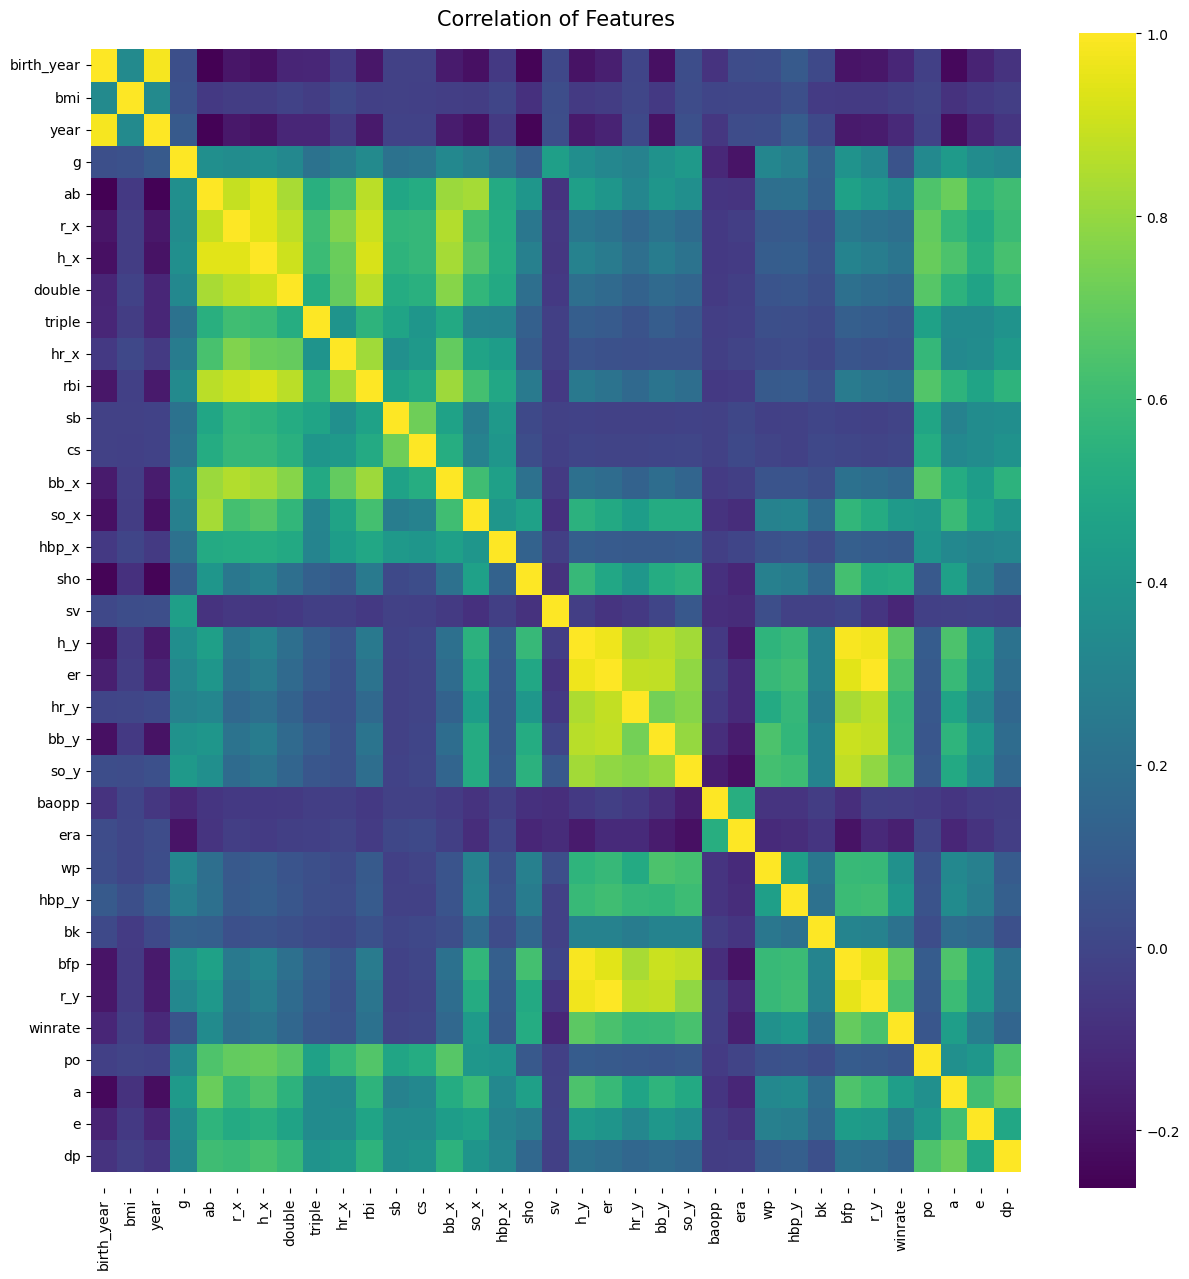

In [226]:
numcol = df.select_dtypes(include=['float64', 'int64'])
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation of Features', size=15)
ax = sns.heatmap(numcol.astype(float).corr(), cmap=colormap, annot=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [227]:
#Make comparison of allstar and non allstar players in the dataset
df['allstar'].value_counts()

allstar
0    30534
1     1651
Name: count, dtype: int64

<Axes: >

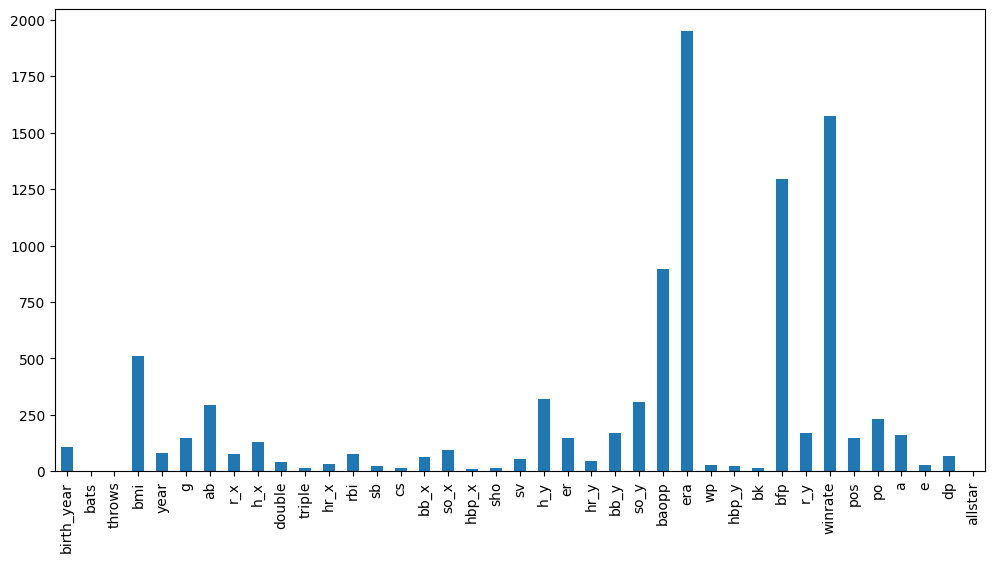

In [228]:
df.nunique().plot.bar(figsize=(12,6))

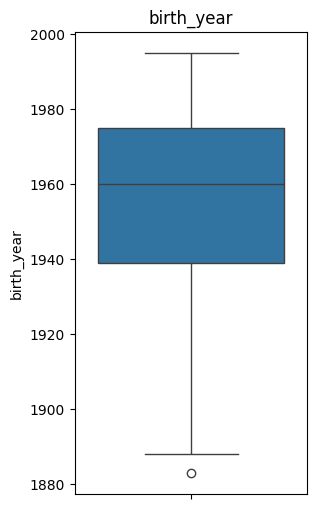

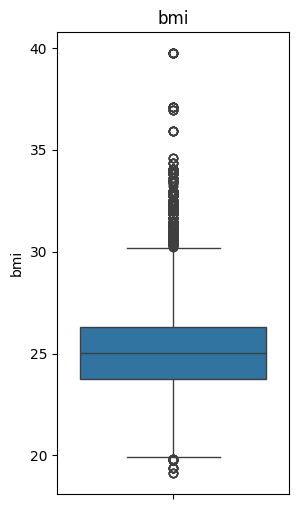

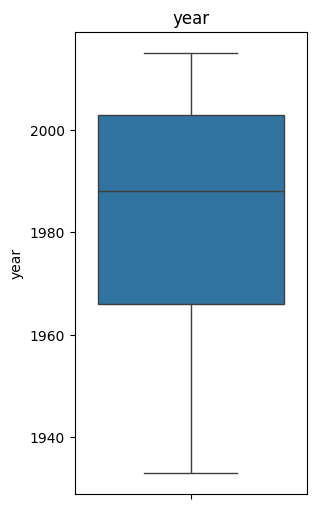

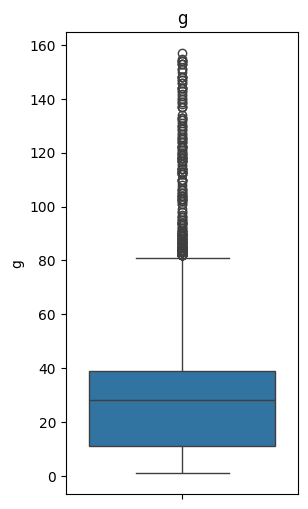

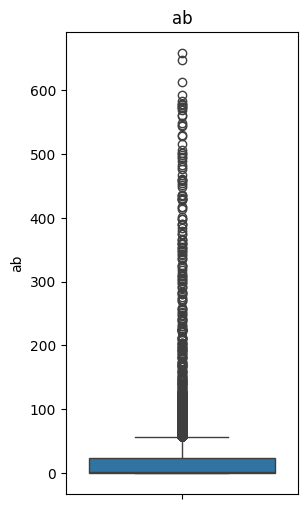

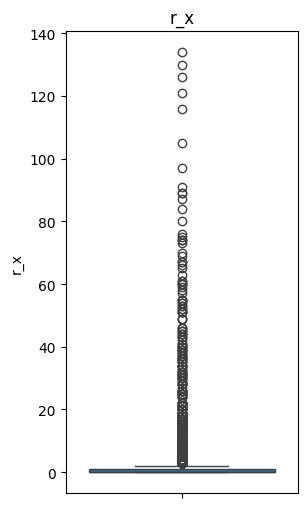

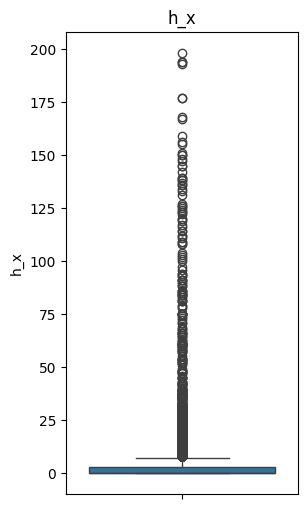

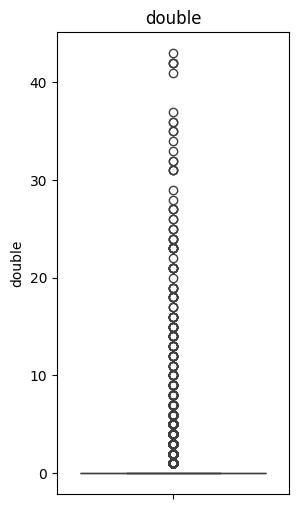

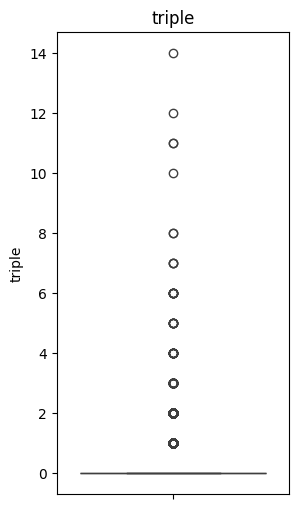

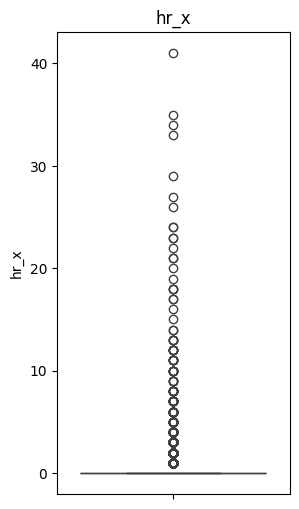

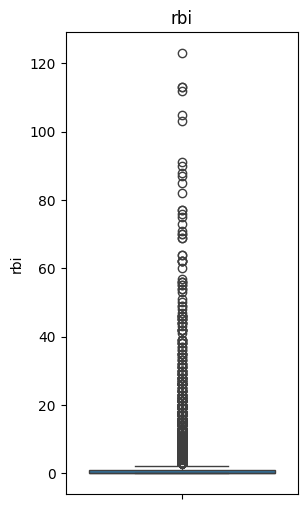

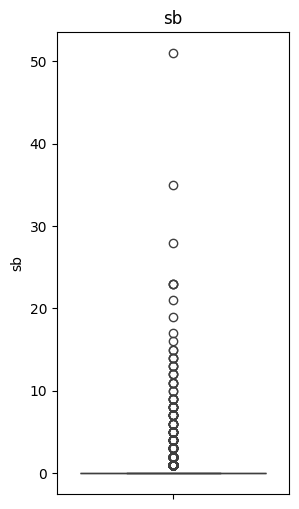

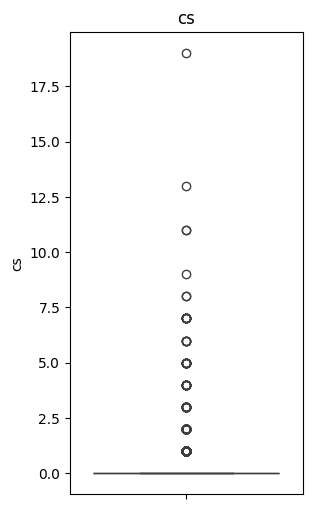

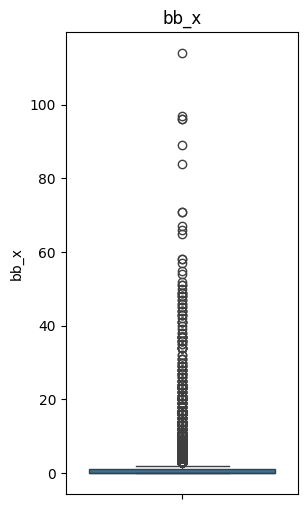

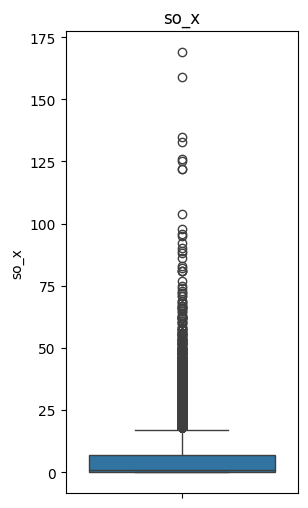

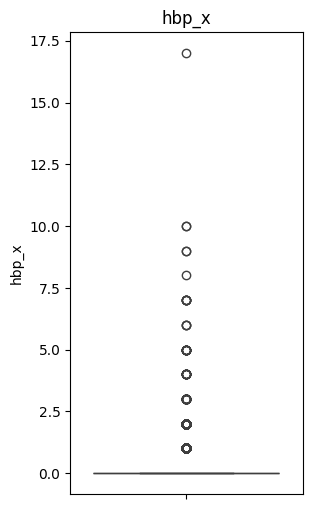

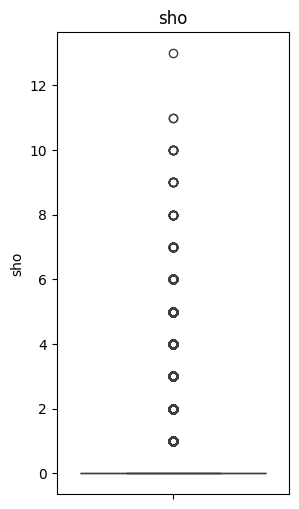

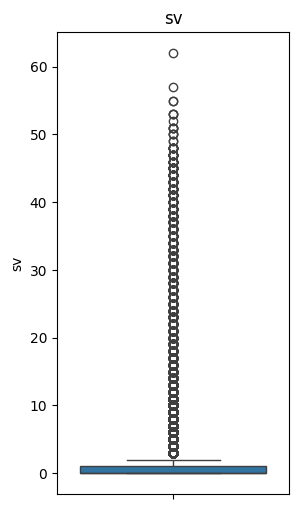

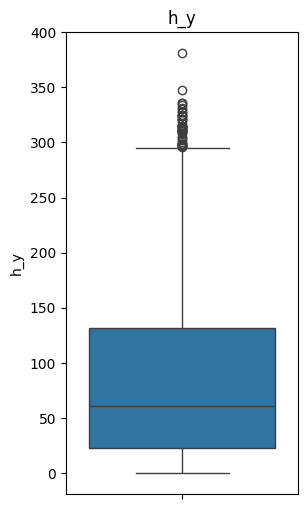

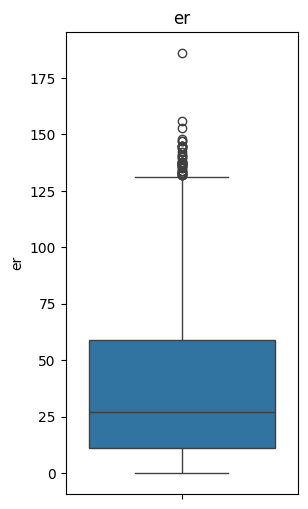

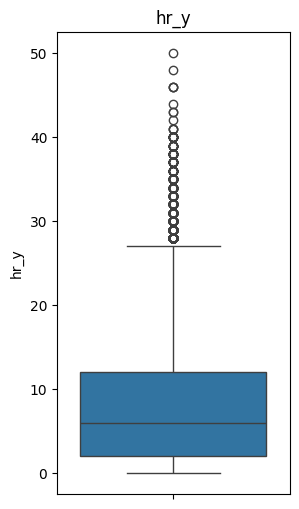

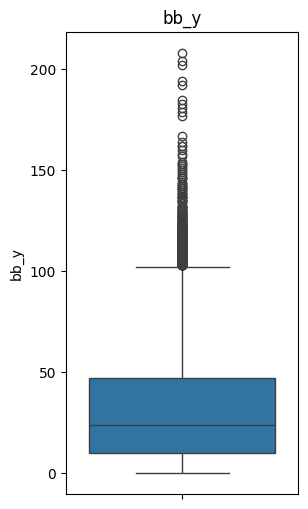

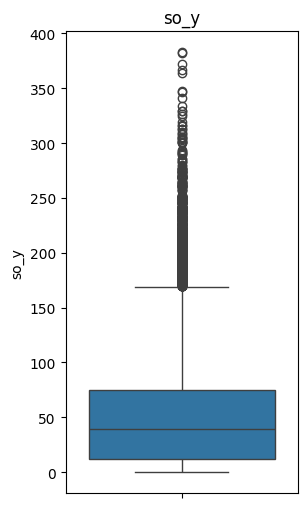

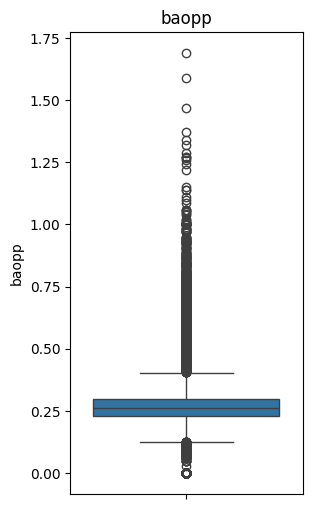

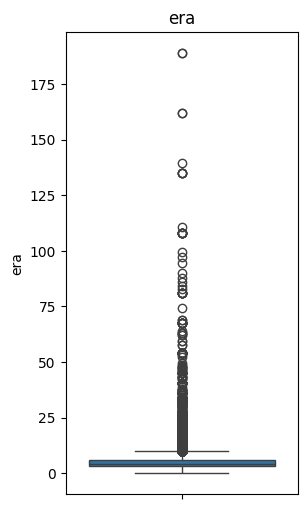

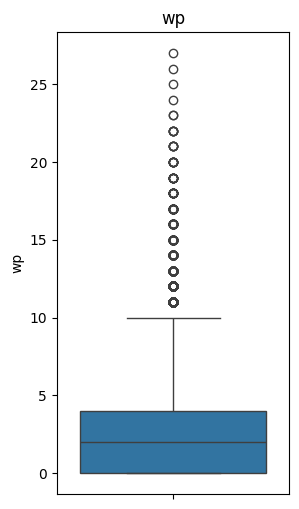

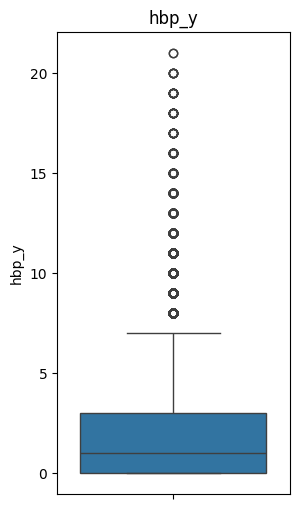

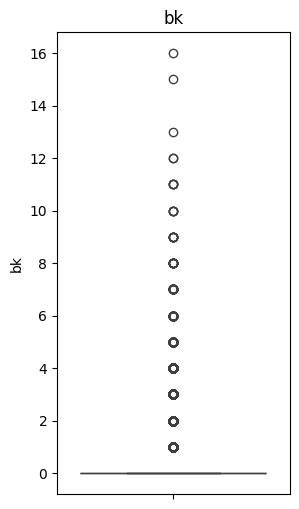

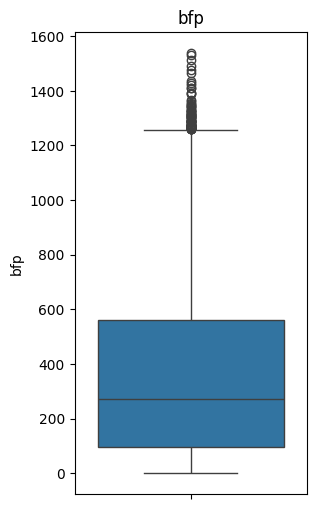

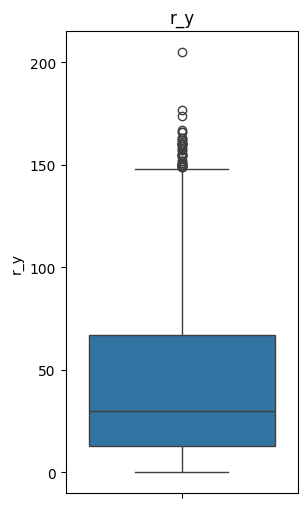

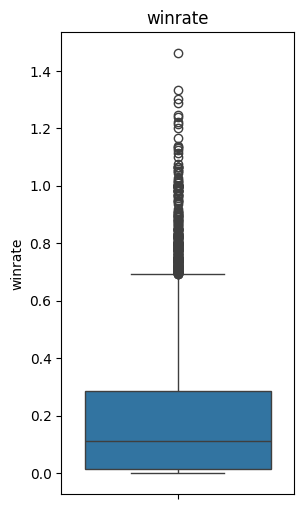

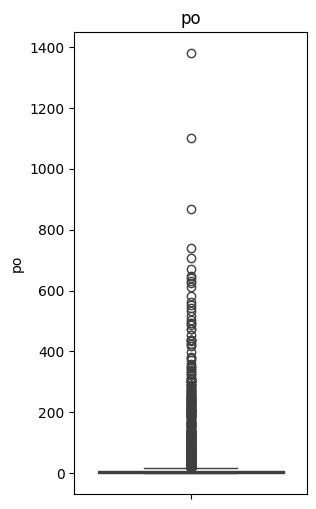

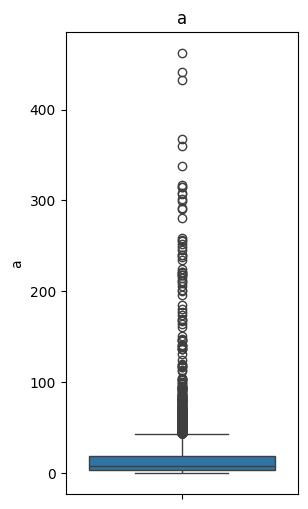

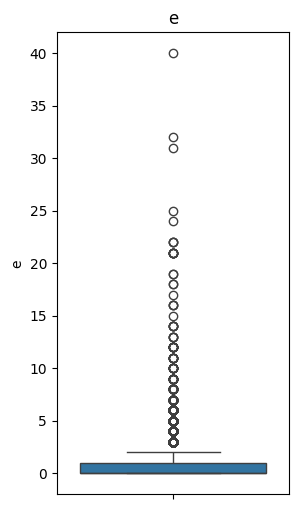

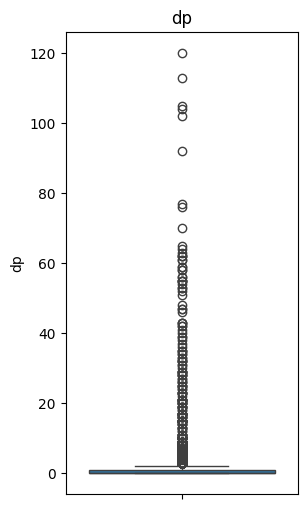

In [229]:
#See distributions of numerical columns
for i in df.select_dtypes(include=['float64', 'int64']).columns.tolist():
    plt.figure(figsize=(3,6))
    sns.boxplot(y=df[i])
    plt.title(i)
    plt.show()

In [230]:
#check distributions
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(variable)

    plt.show()

In [231]:
categoricalcolumns = [c for c in df.columns if df[c].dtypes=='O']
X = df.drop('allstar', axis=1)
y = df['allstar']

# Apply SMOTE-NC to the entire dataset
# Adds rows to the minority class
smote_nc = SMOTENC(categorical_features=categoricalcolumns, random_state=41)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((42747, 38), (18321, 38))

In [232]:
X_train.isnull().mean()

birth_year    0.0
bats          0.0
throws        0.0
bmi           0.0
year          0.0
g             0.0
ab            0.0
r_x           0.0
h_x           0.0
double        0.0
triple        0.0
hr_x          0.0
rbi           0.0
sb            0.0
cs            0.0
bb_x          0.0
so_x          0.0
hbp_x         0.0
sho           0.0
sv            0.0
h_y           0.0
er            0.0
hr_y          0.0
bb_y          0.0
so_y          0.0
baopp         0.0
era           0.0
wp            0.0
hbp_y         0.0
bk            0.0
bfp           0.0
r_y           0.0
winrate       0.0
pos           0.0
po            0.0
a             0.0
e             0.0
dp            0.0
dtype: float64

In [233]:
#find the numerical columns containing null values
numericalcolumns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
numericalcolumnswithnulls = X_train[numericalcolumns].isnull().sum()
numericalcolumnswithnulls = numericalcolumnswithnulls[numericalcolumnswithnulls > 0]
numericalcolumnswithnulls

Series([], dtype: int64)

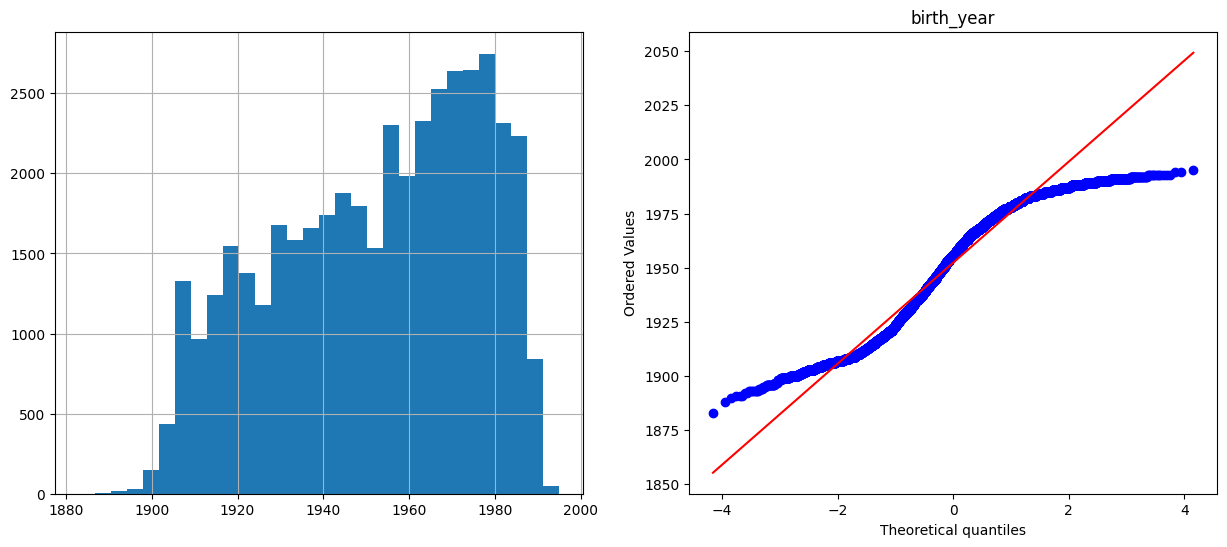

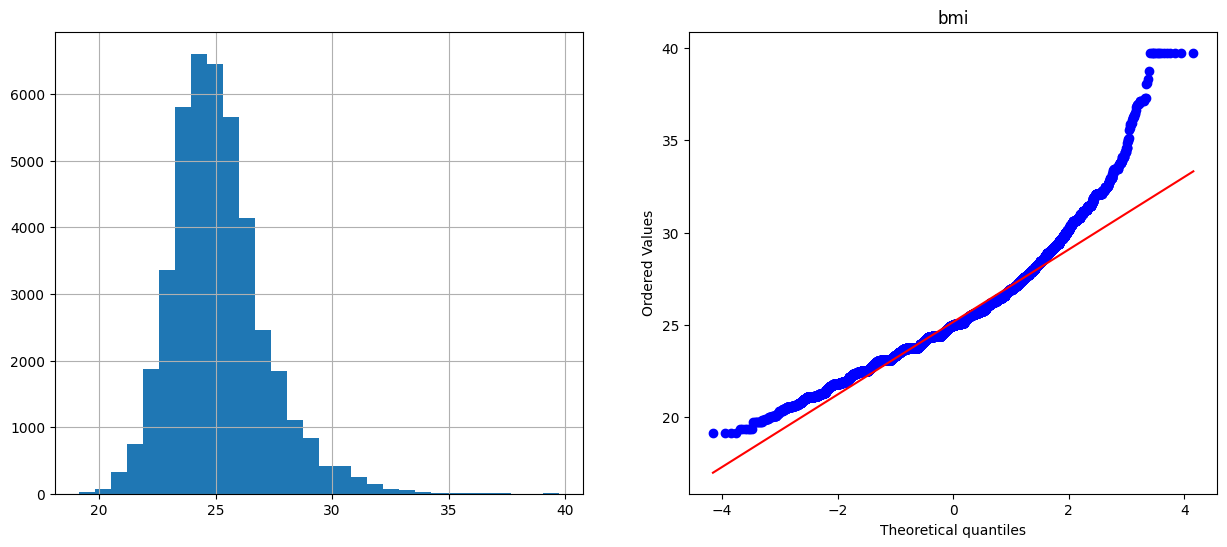

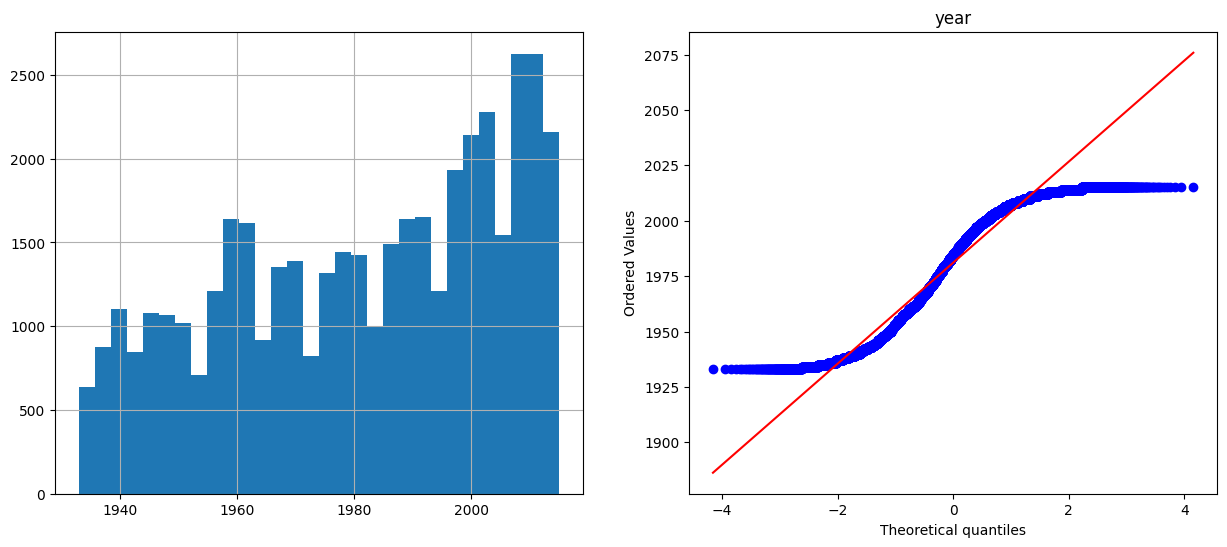

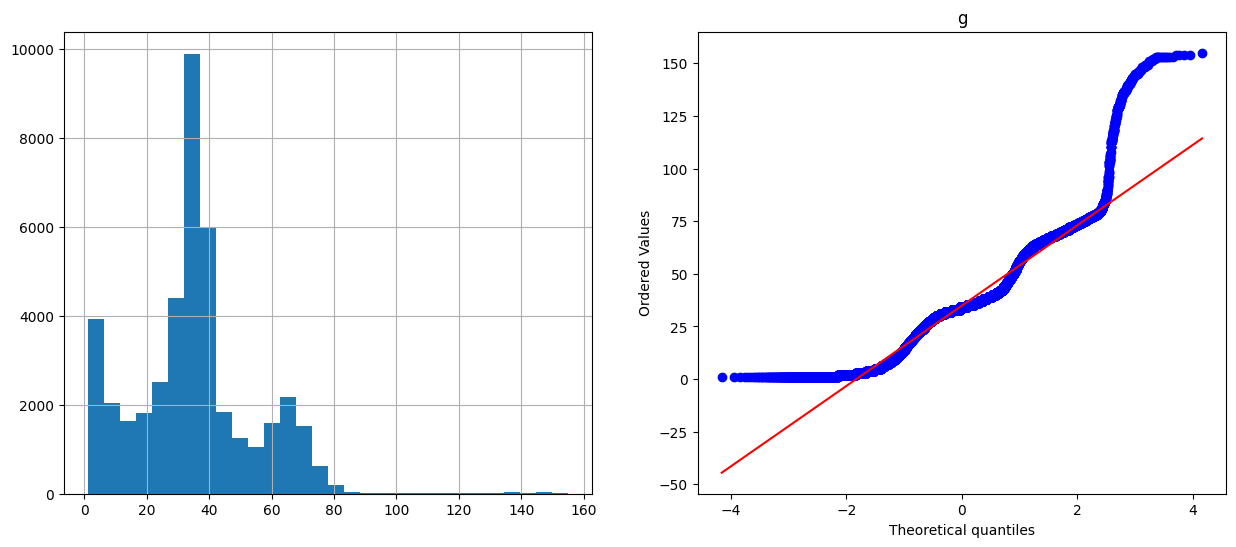

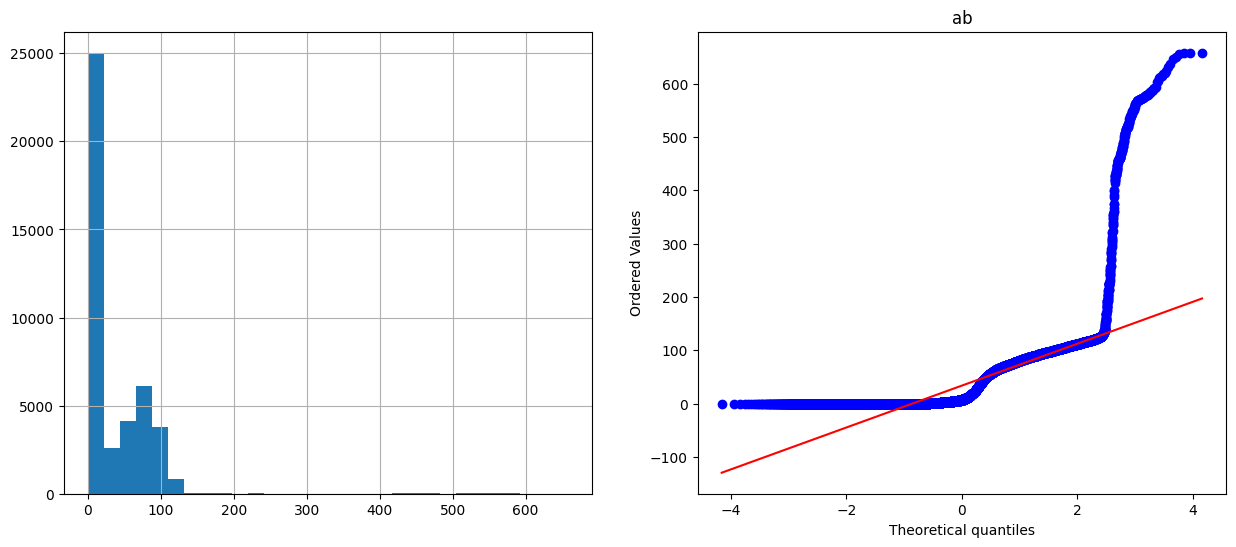

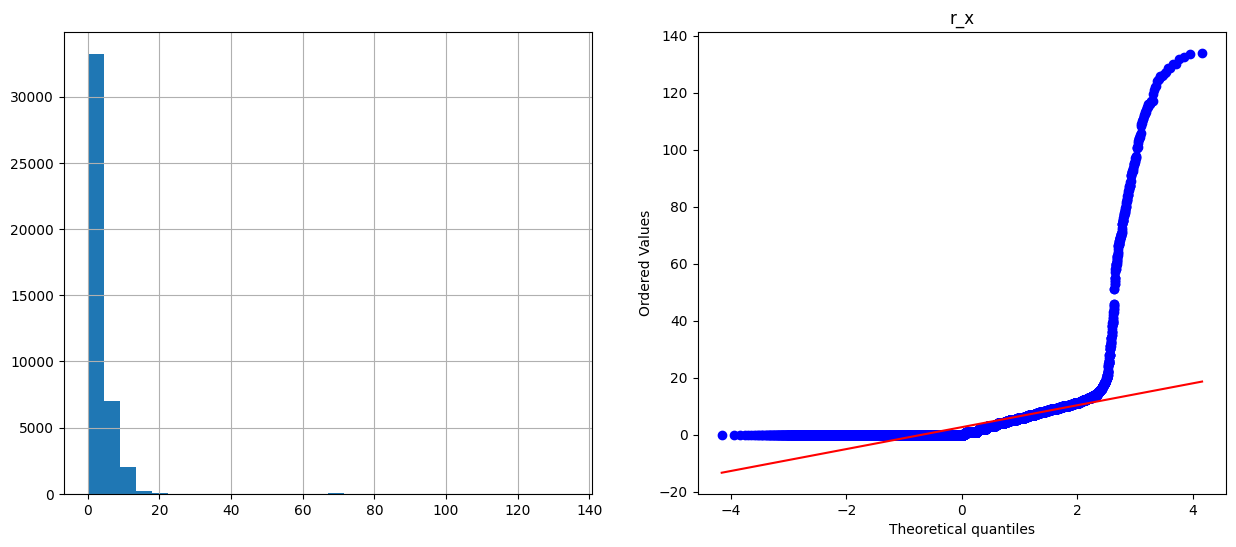

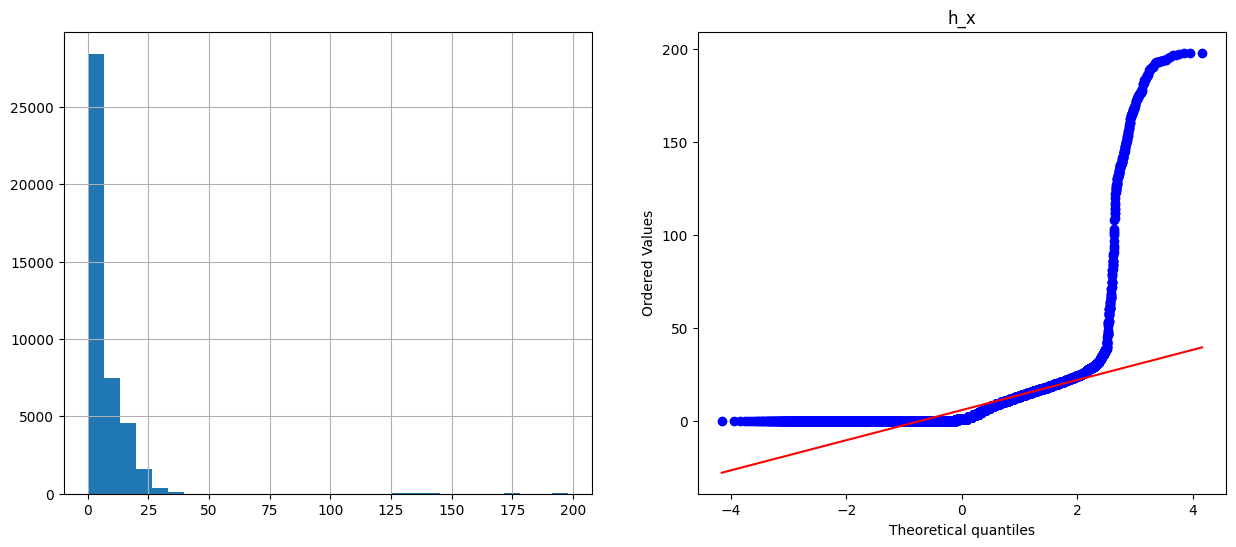

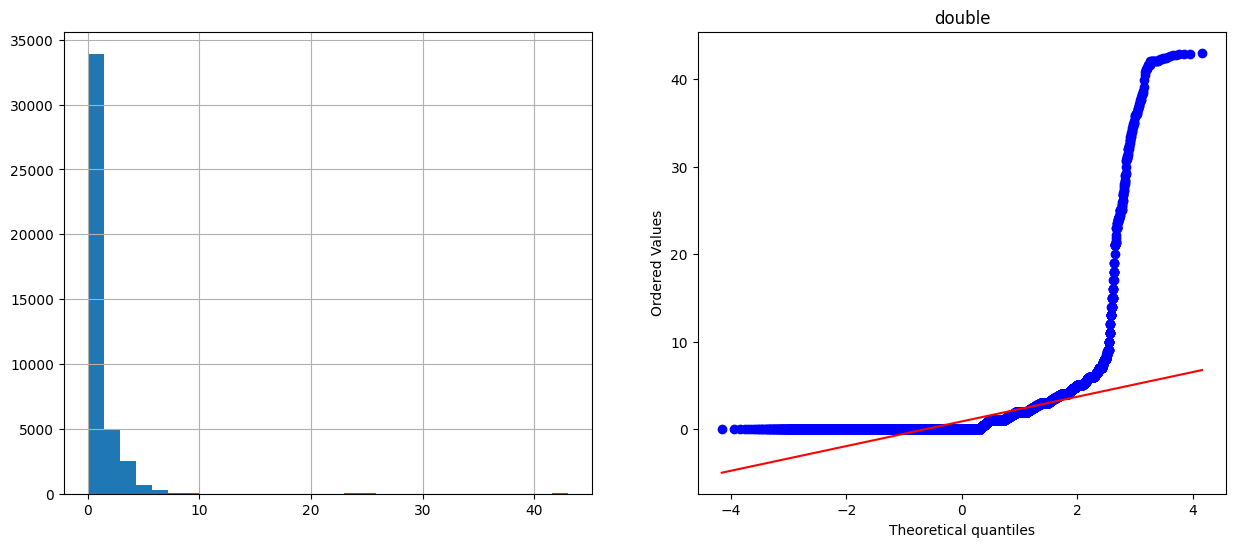

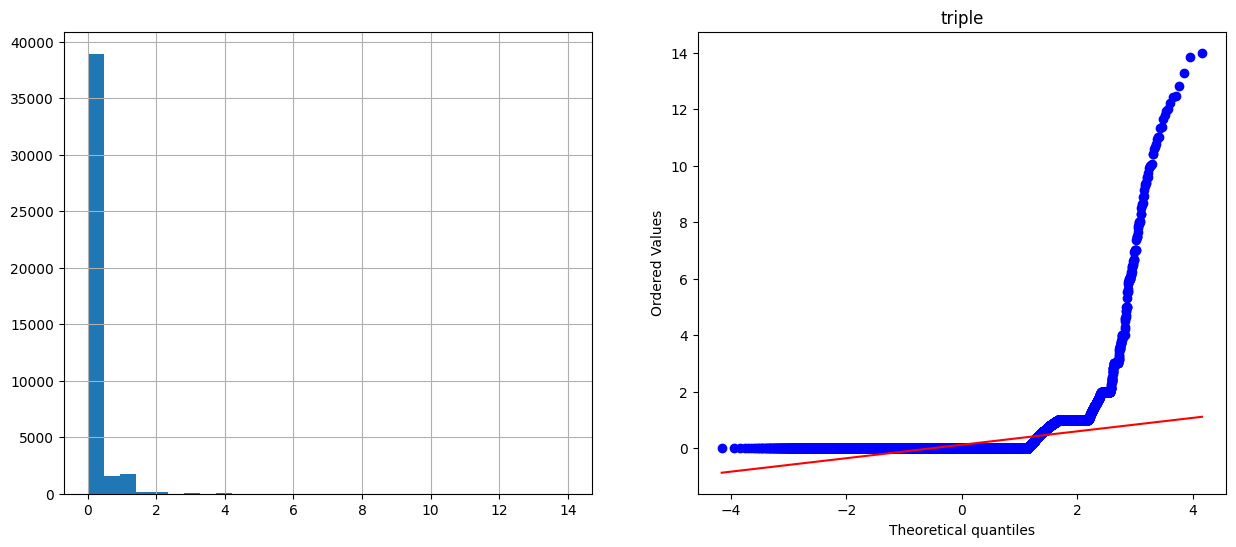

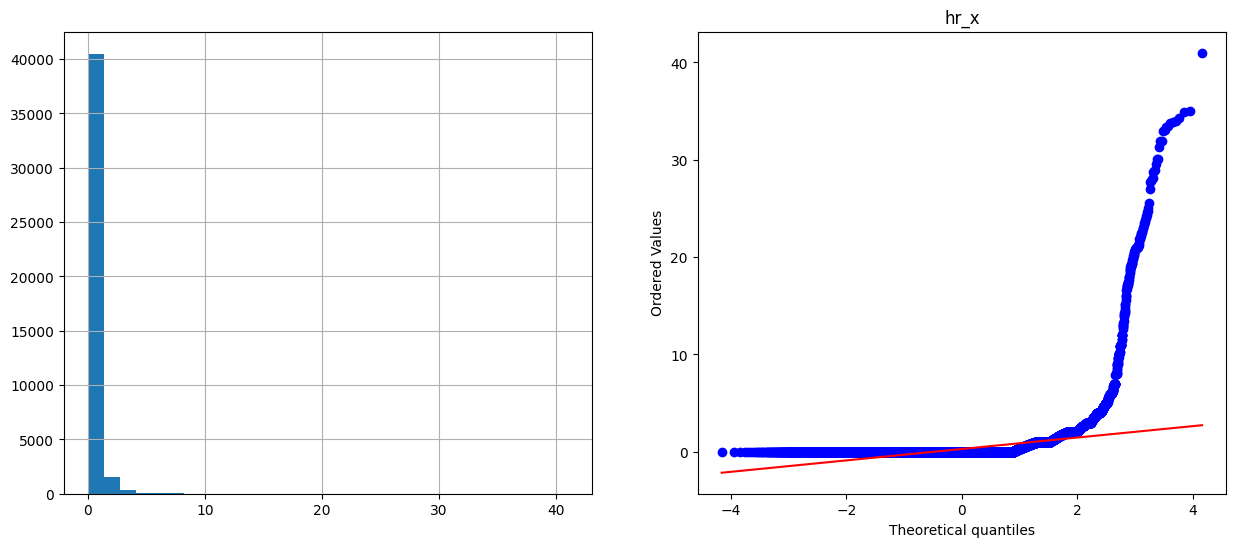

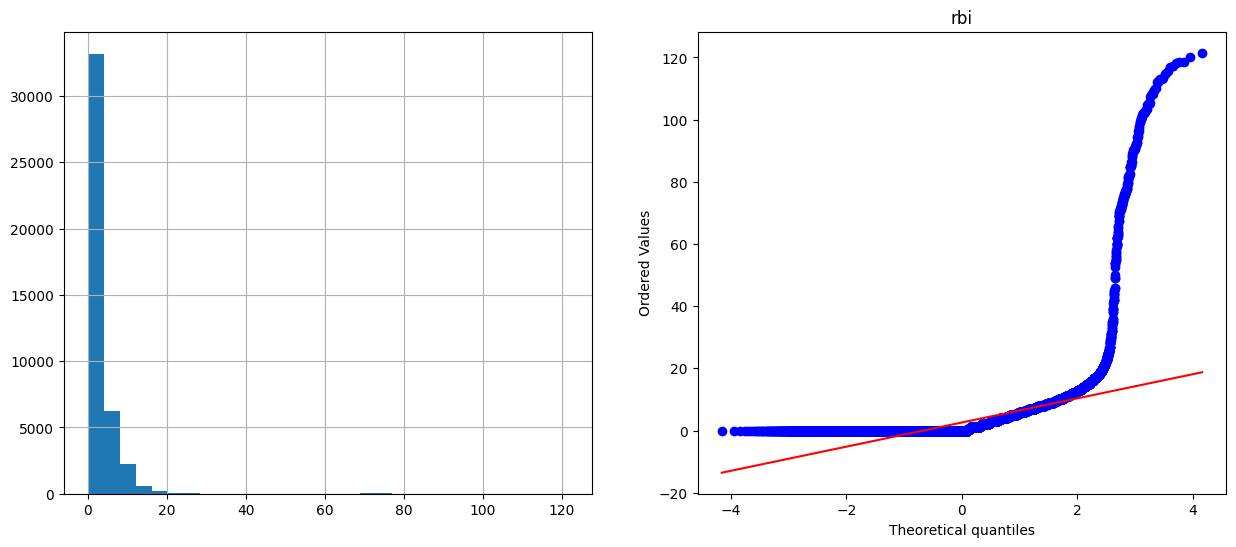

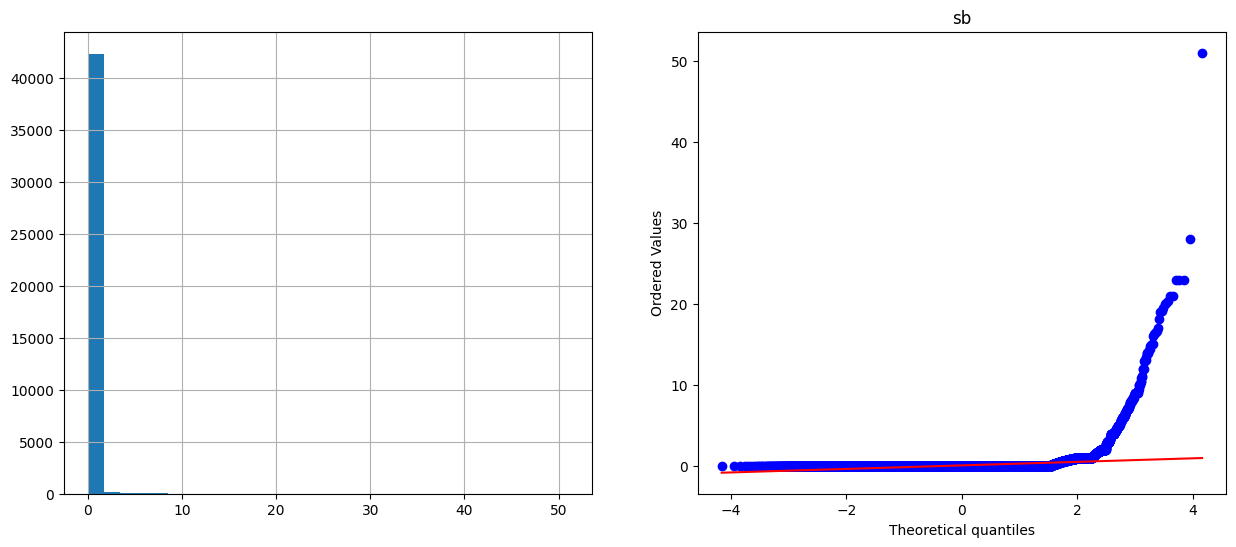

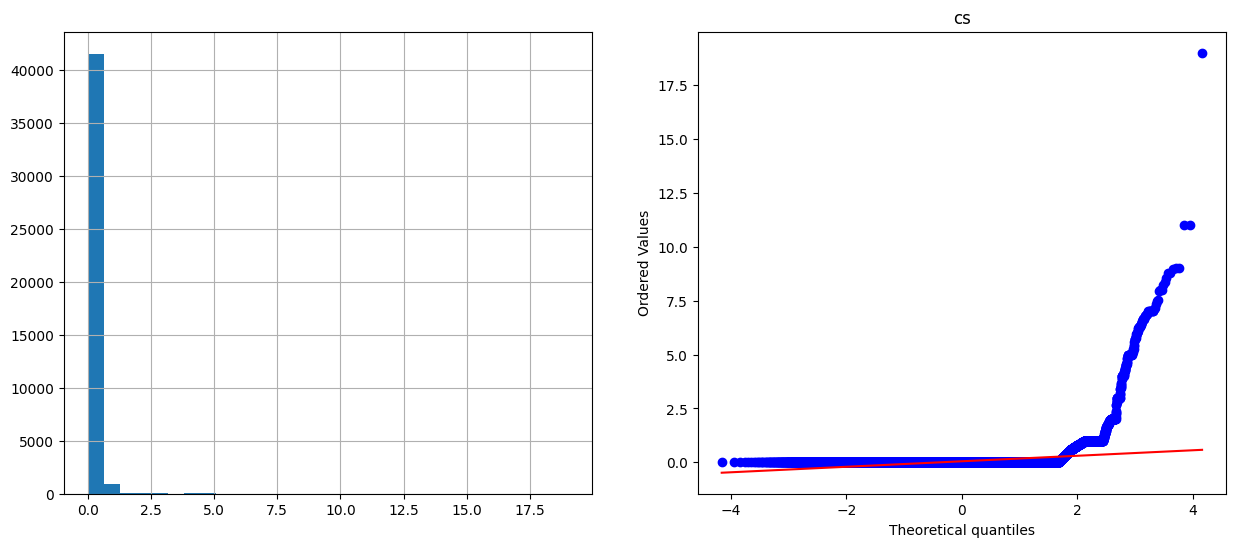

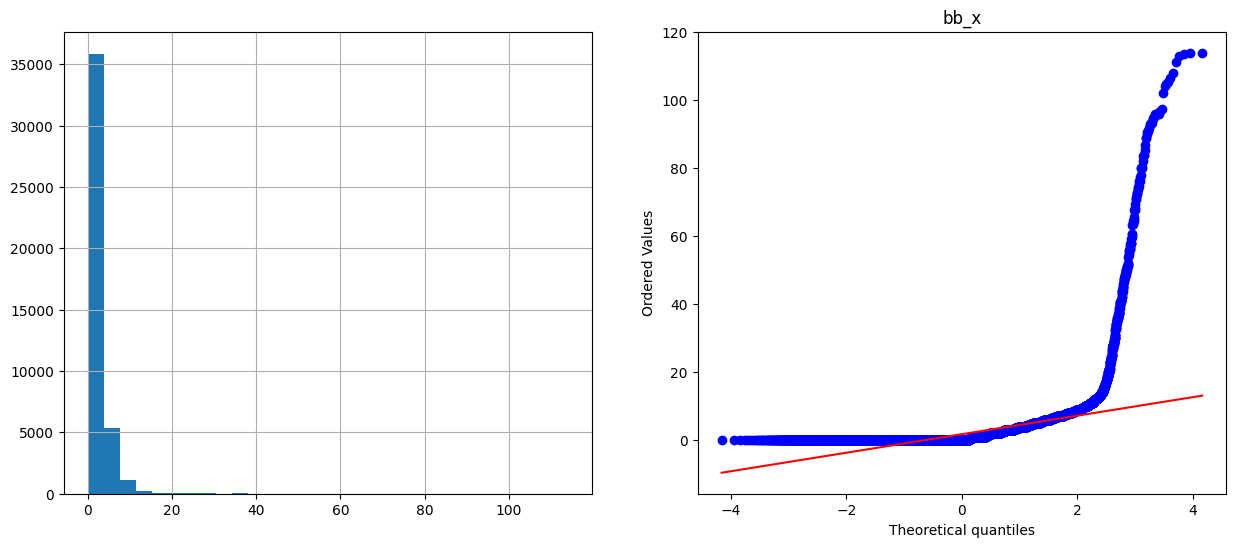

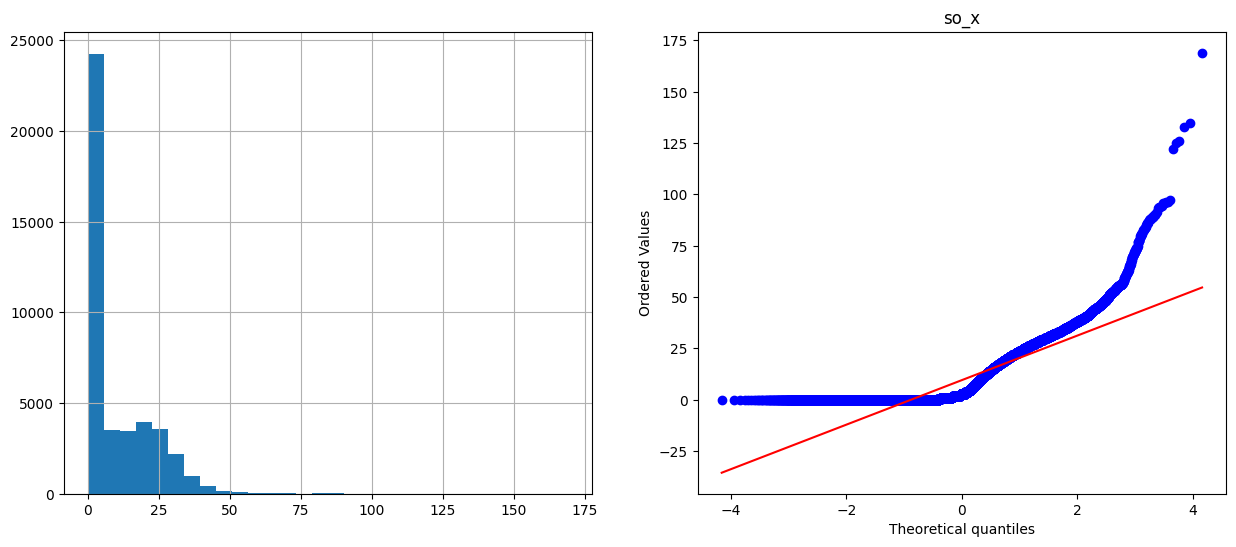

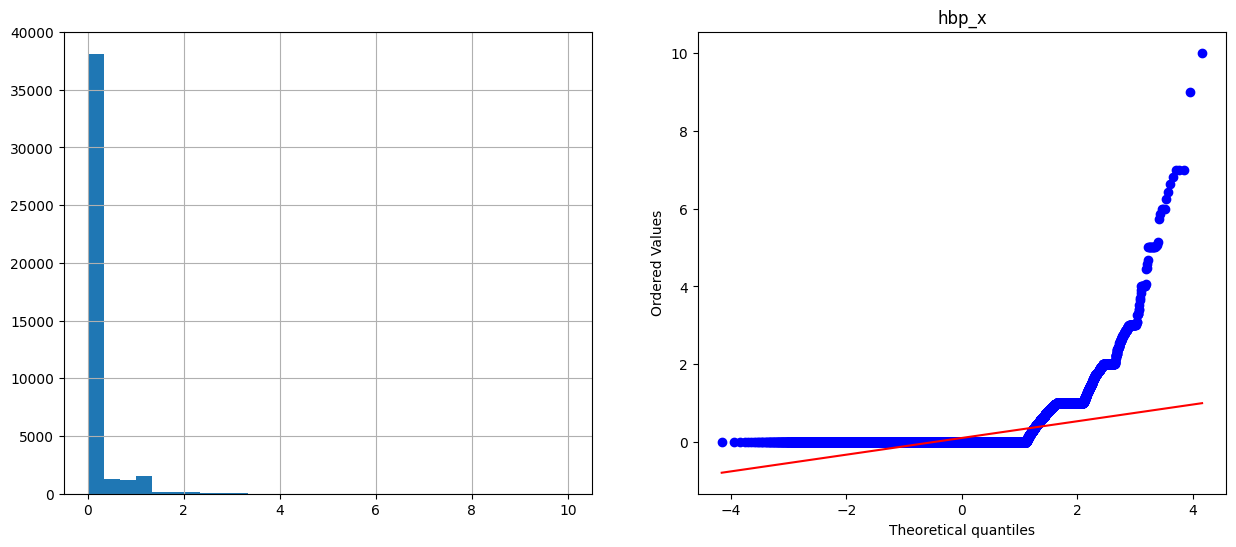

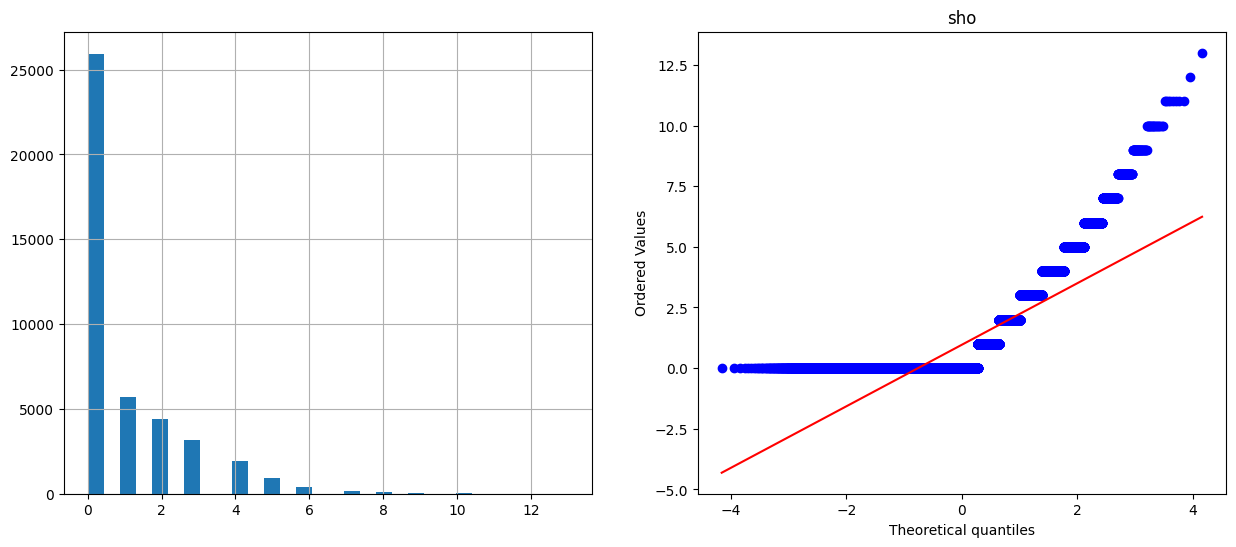

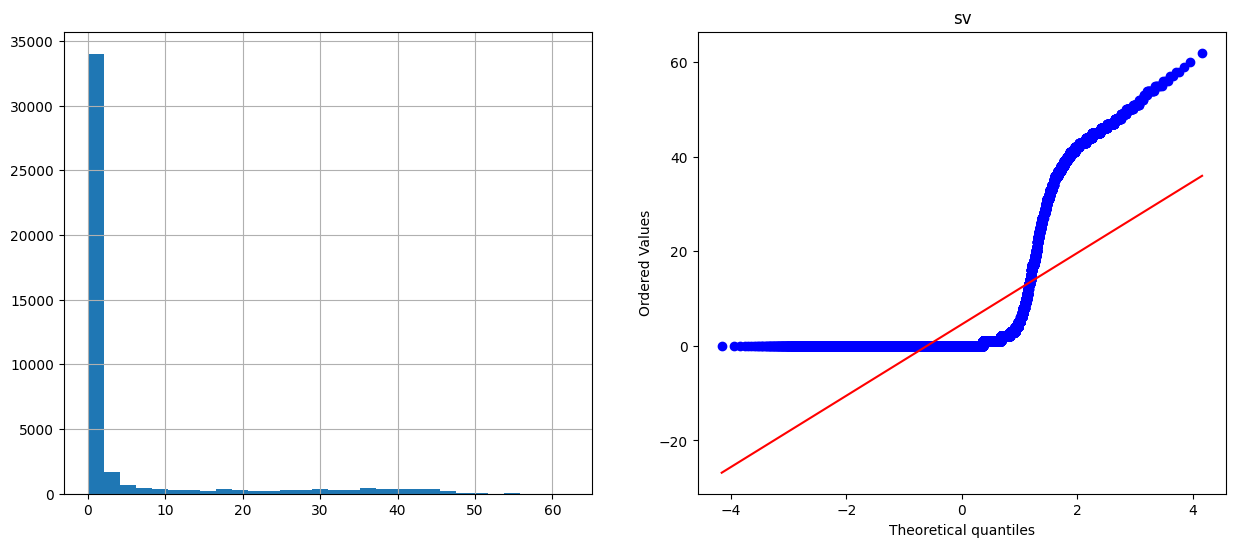

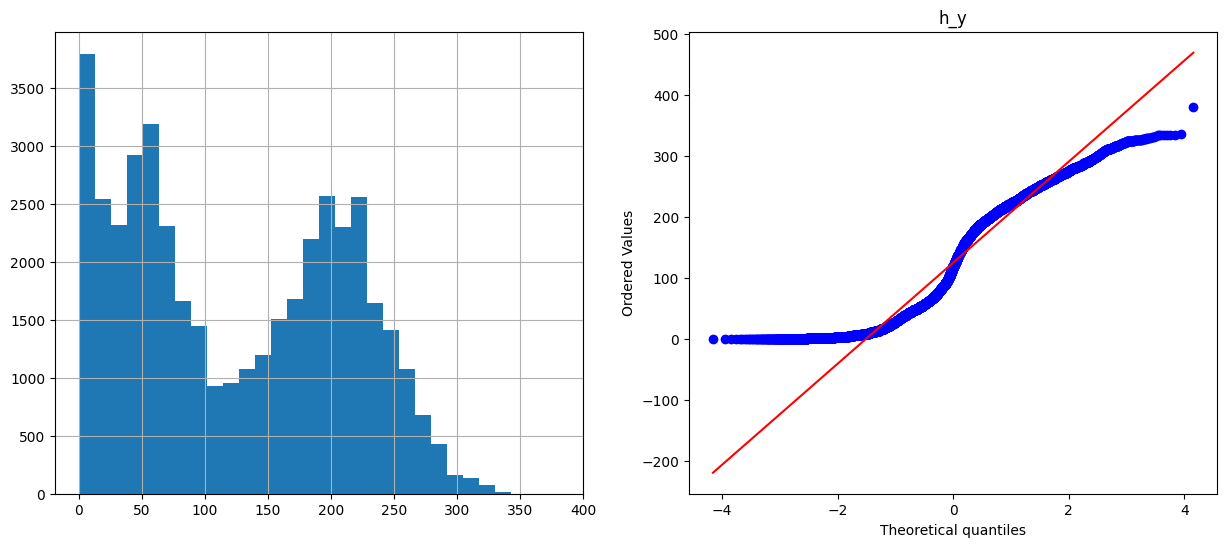

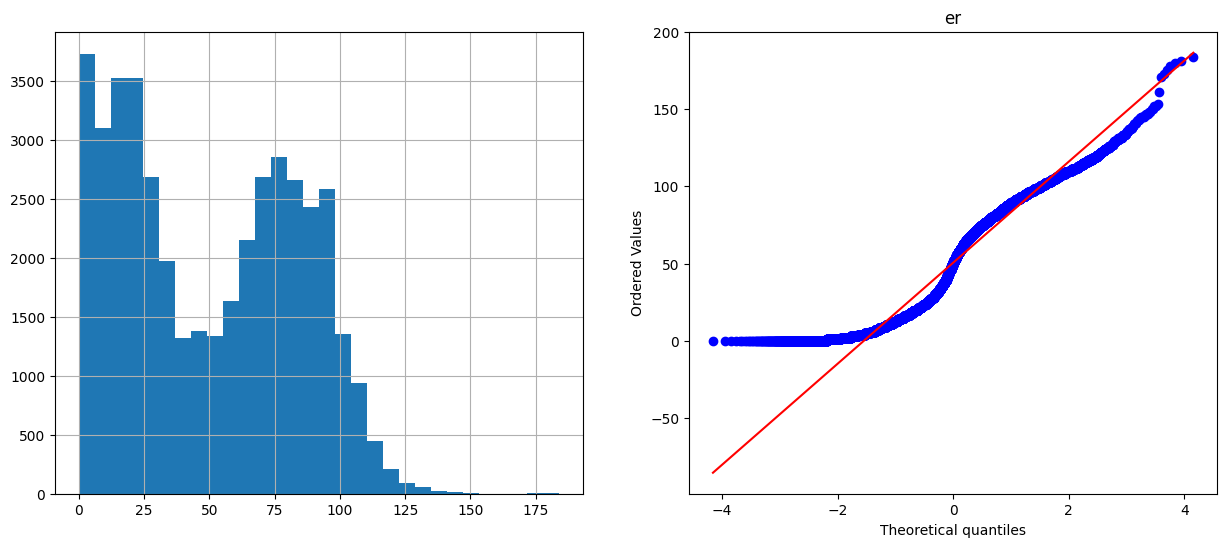

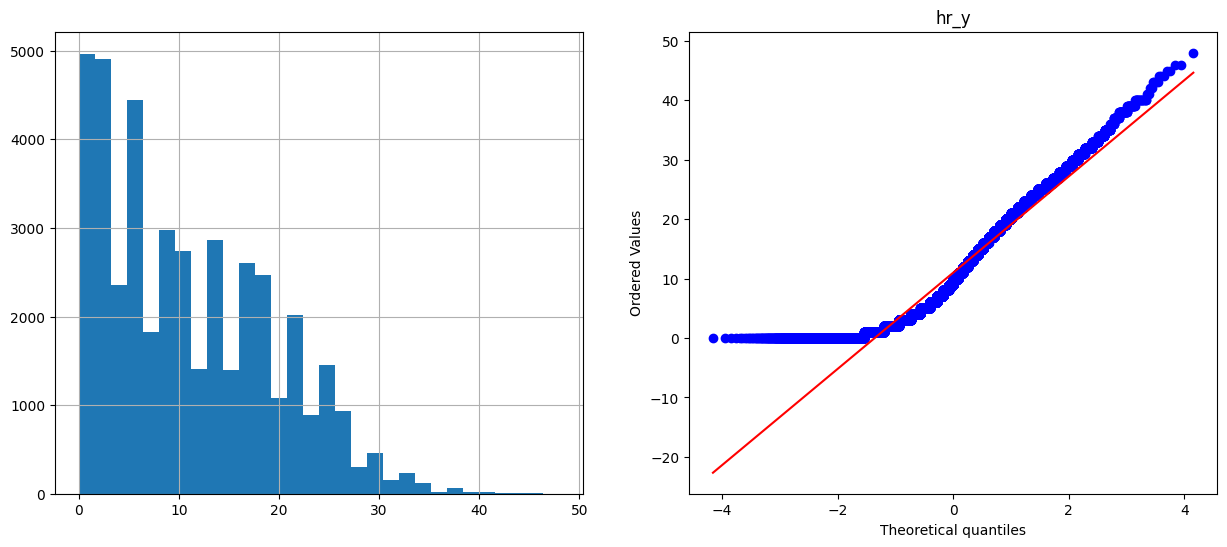

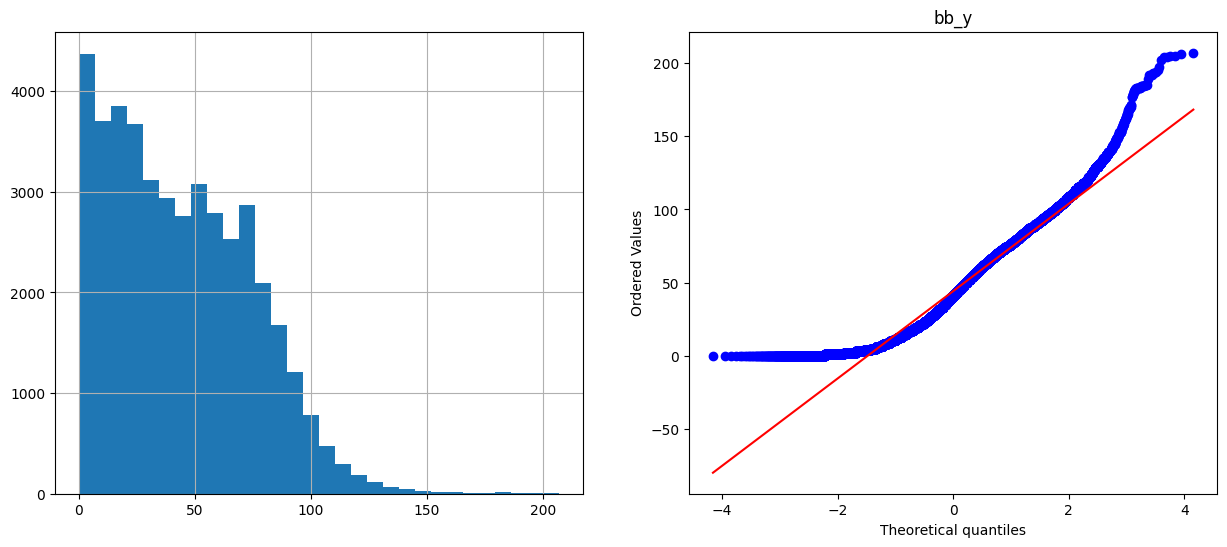

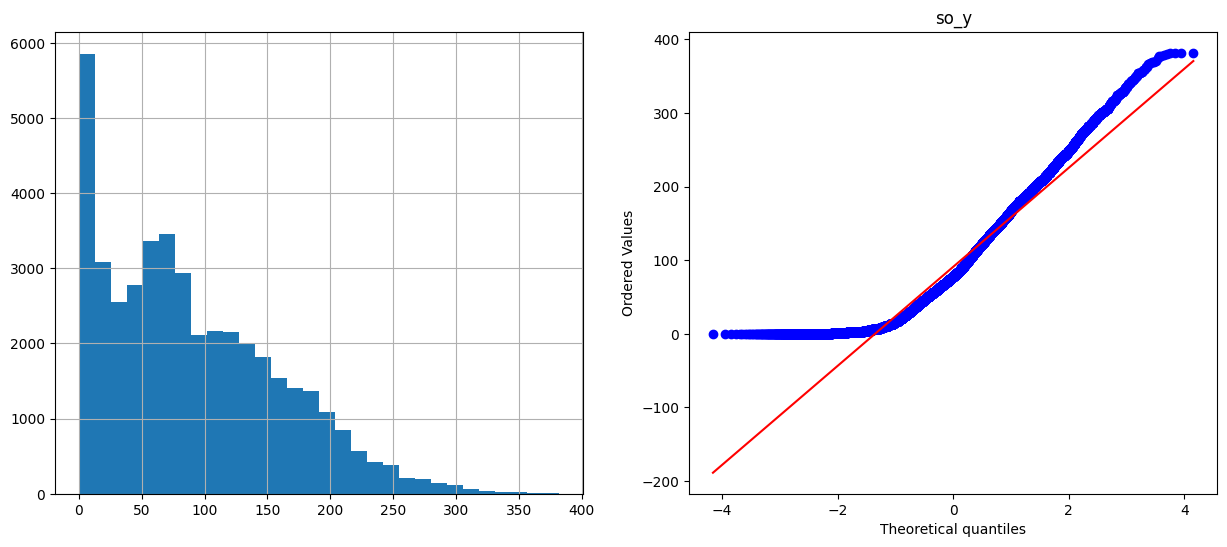

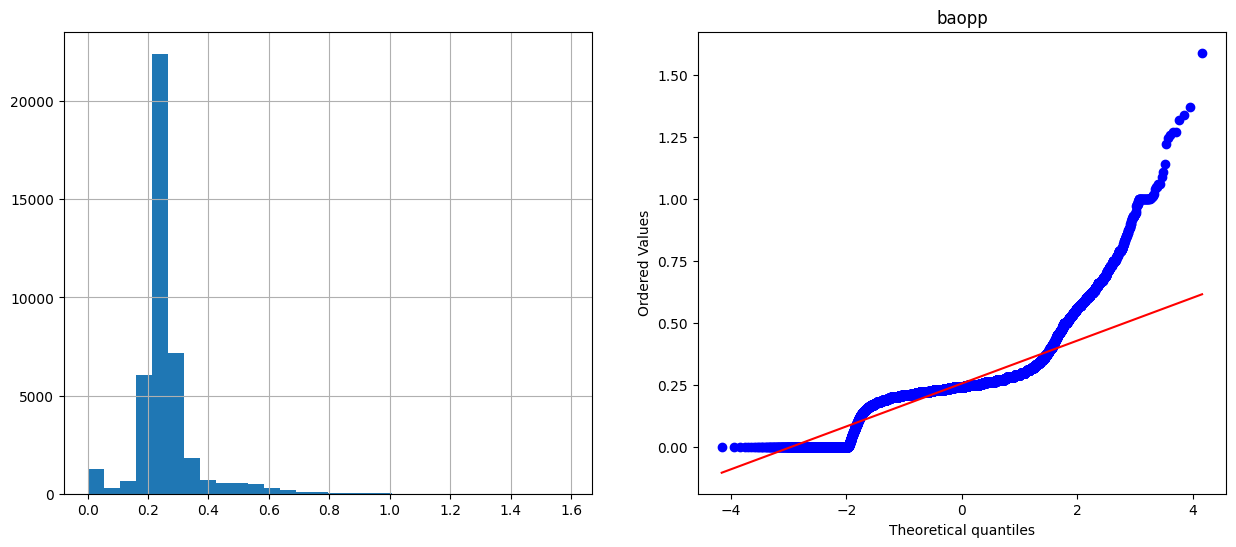

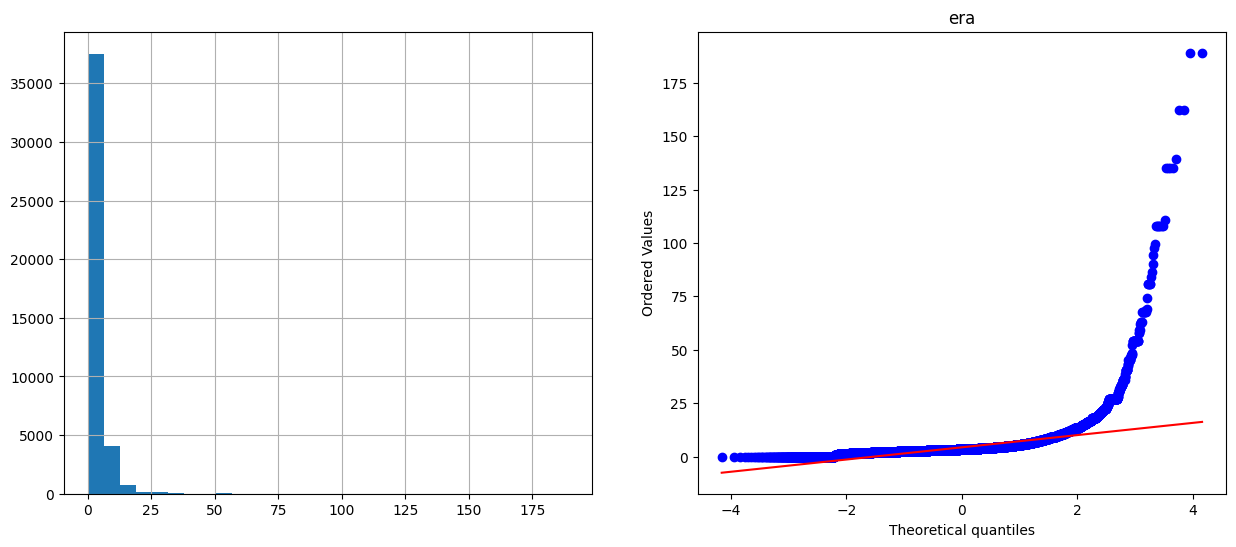

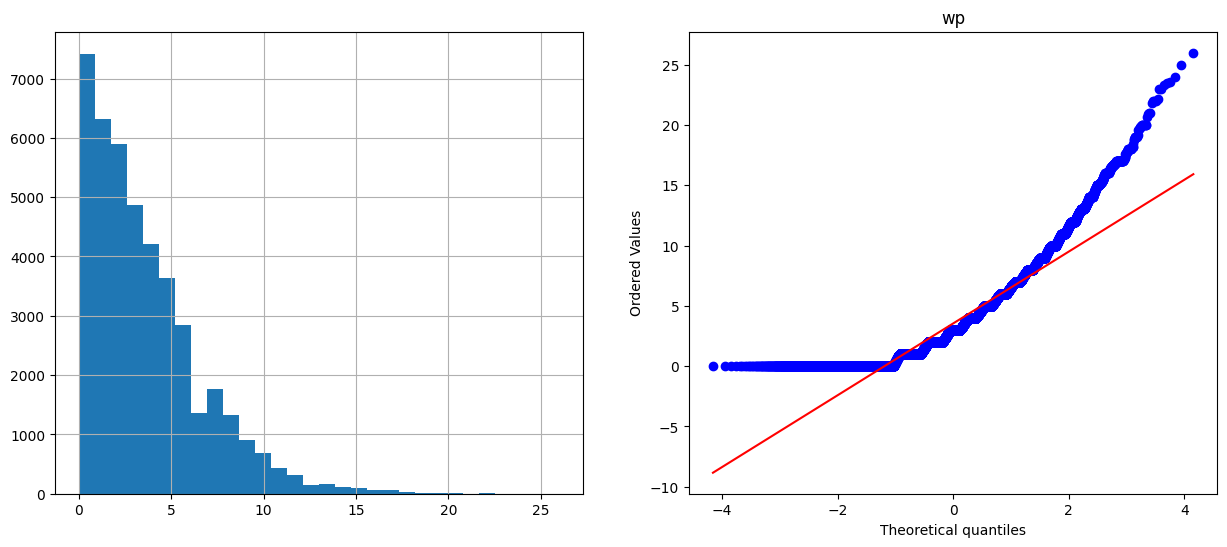

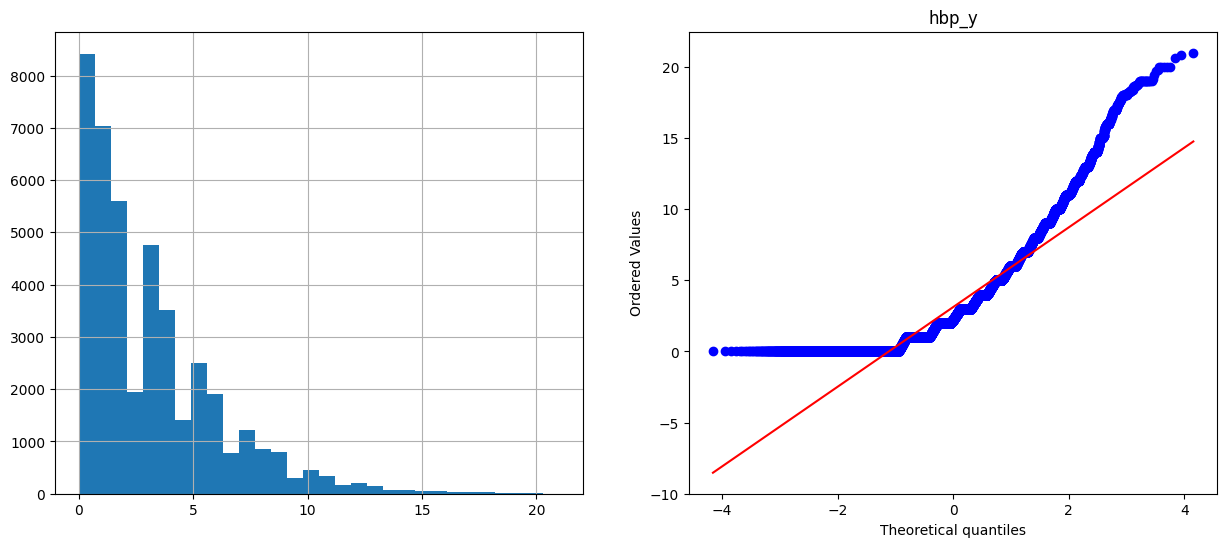

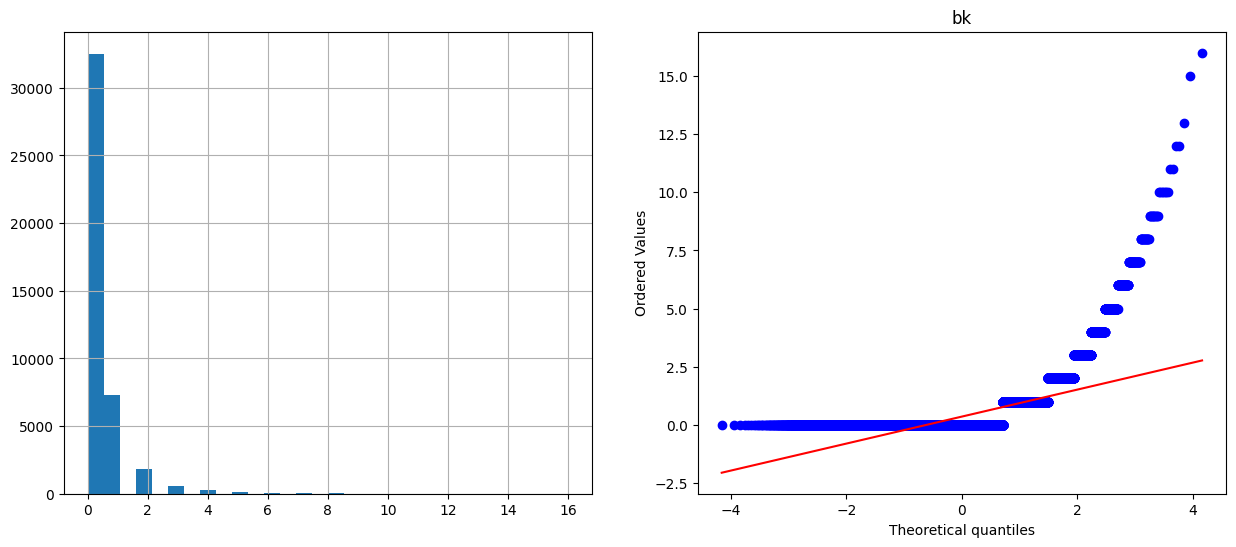

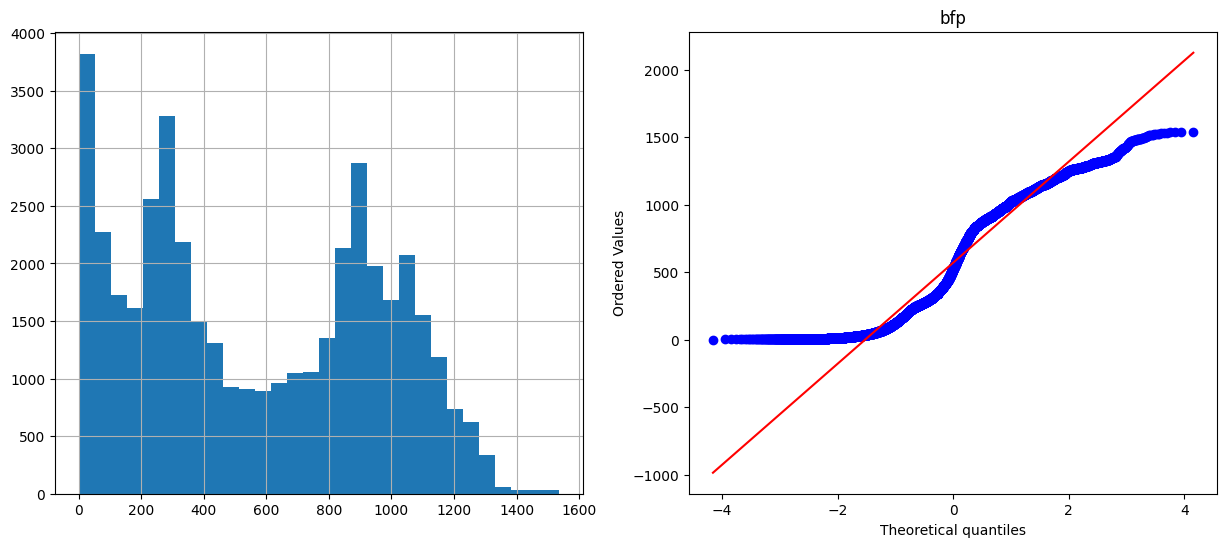

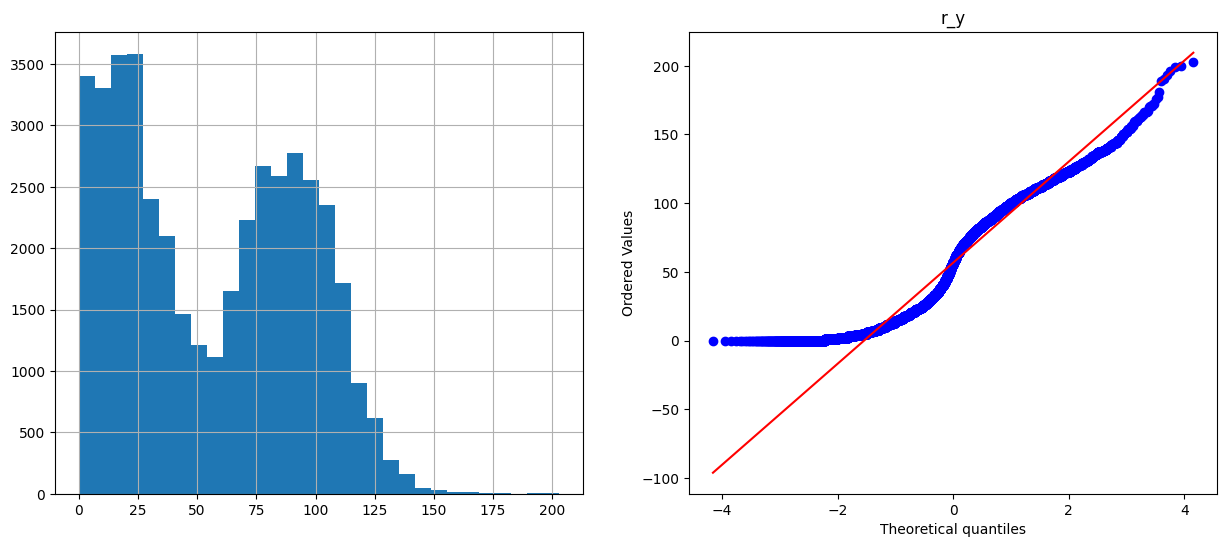

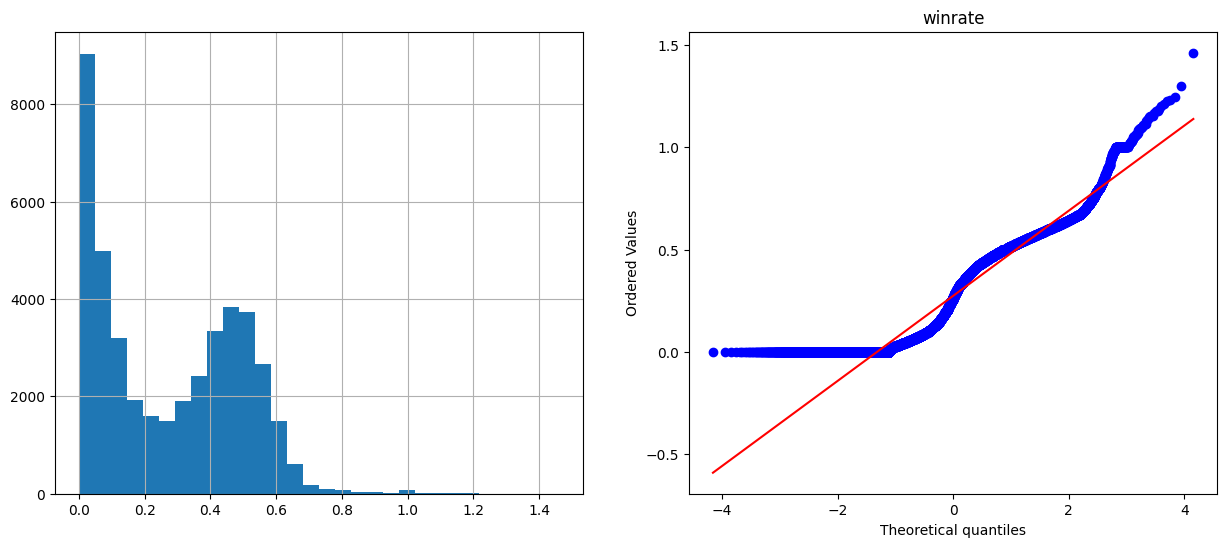

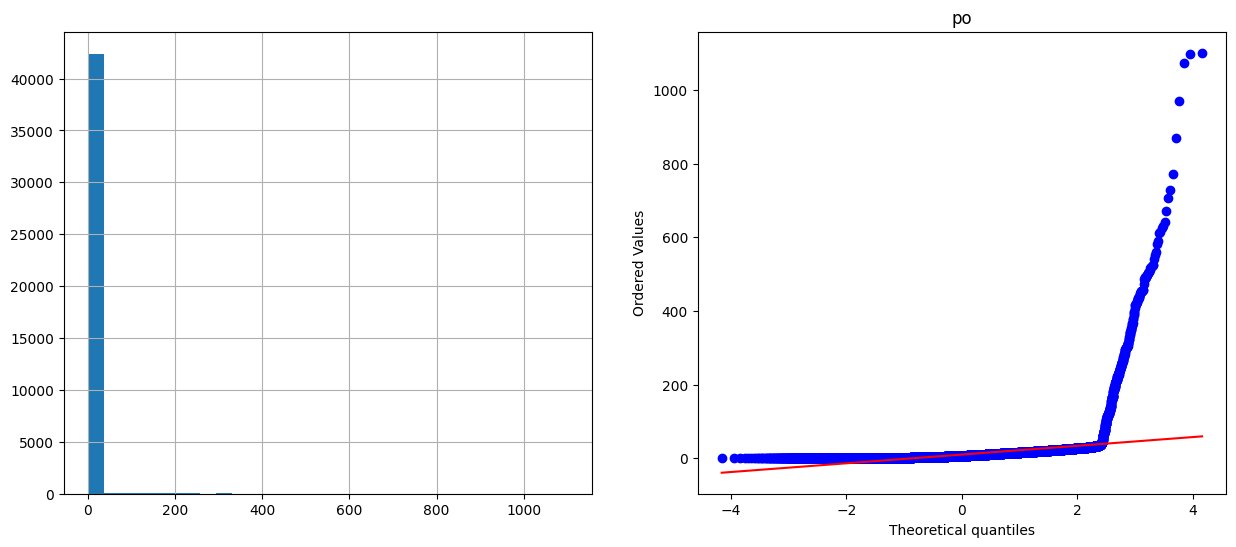

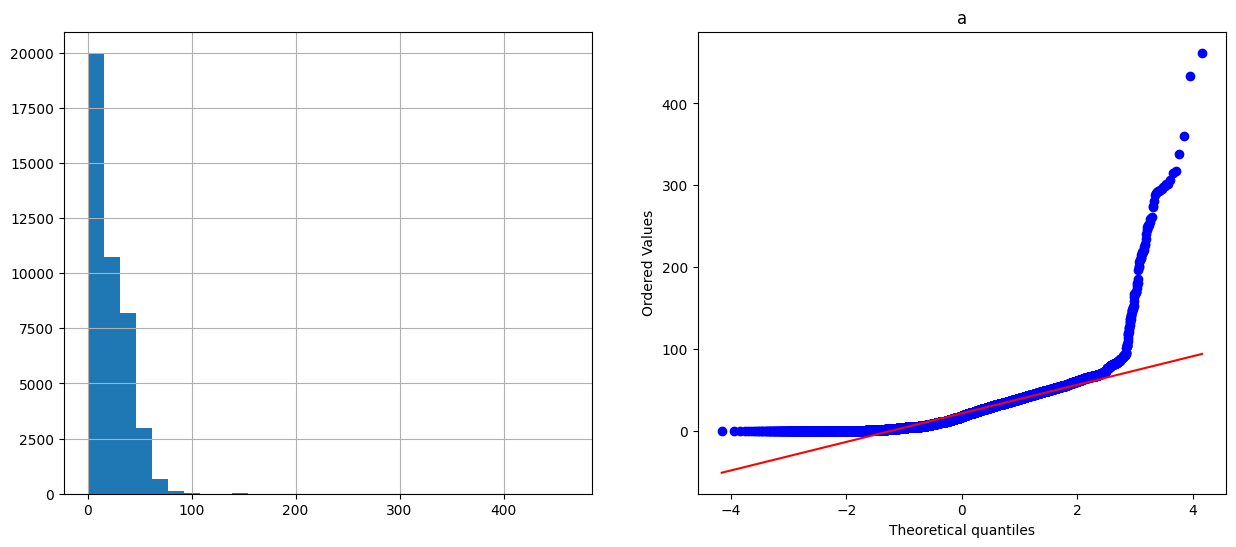

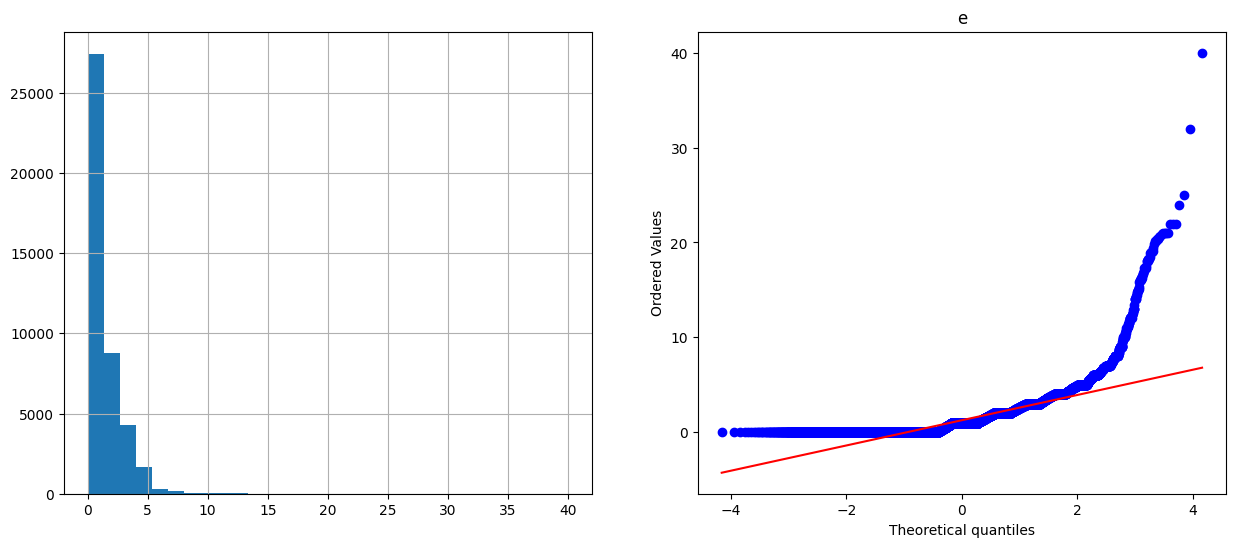

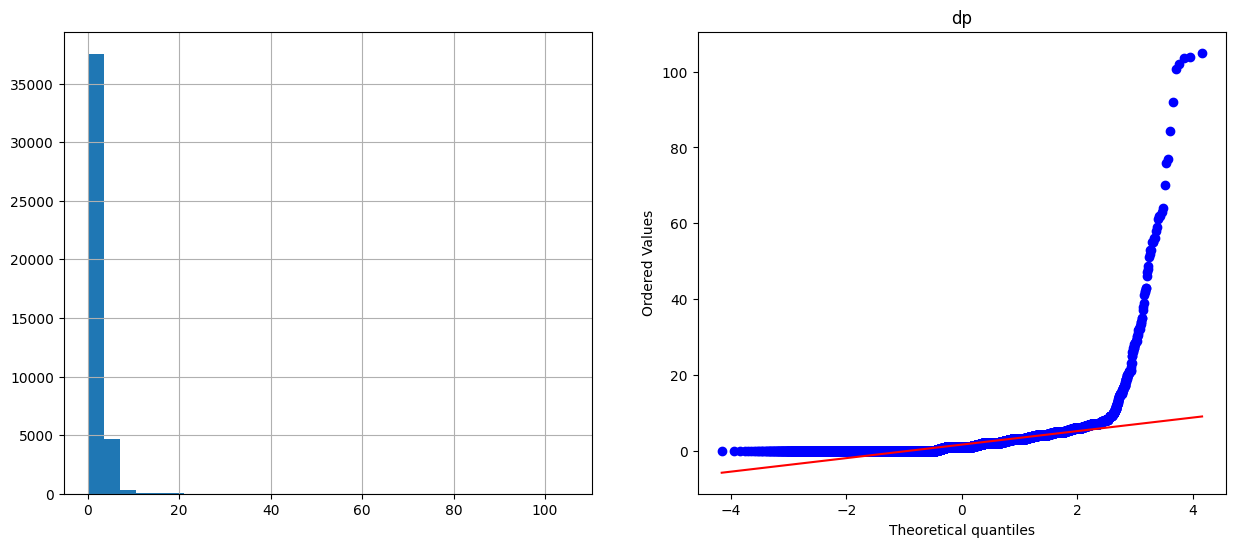

In [234]:
#diagnostic plots before
for i in numericalcolumns:
    diagnostic_plots(X_train, i)

In [235]:
yjt = YeoJohnsonTransformer(variables = numericalcolumns)
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['birth_year', 'bmi', 'year', 'g', 'ab', 'r_x',
                                 'h_x', 'double', 'triple', 'hr_x', 'rbi', 'sb',
                                 'cs', 'bb_x', 'so_x', 'hbp_x', 'sho', 'sv',
                                 'h_y', 'er', 'hr_y', 'bb_y', 'so_y', 'baopp',
                                 'era', 'wp', 'hbp_y', 'bk', 'bfp', 'r_y', ...])

In [236]:
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

In [237]:
#Use capping since many outliers so trimming may result in loss of accuracy

windsorizer = Winsorizer(capping_method='gaussian',
                          tail='both',
                          fold=3,
                          variables = numericalcolumns)

windsorizer.fit(X_train)

Winsorizer(tail='both',
           variables=['birth_year', 'bmi', 'year', 'g', 'ab', 'r_x', 'h_x',
                      'double', 'triple', 'hr_x', 'rbi', 'sb', 'cs', 'bb_x',
                      'so_x', 'hbp_x', 'sho', 'sv', 'h_y', 'er', 'hr_y', 'bb_y',
                      'so_y', 'baopp', 'era', 'wp', 'hbp_y', 'bk', 'bfp', 'r_y', ...])

In [238]:
X_train = windsorizer.transform(X_train)
X_test = windsorizer.transform(X_test)

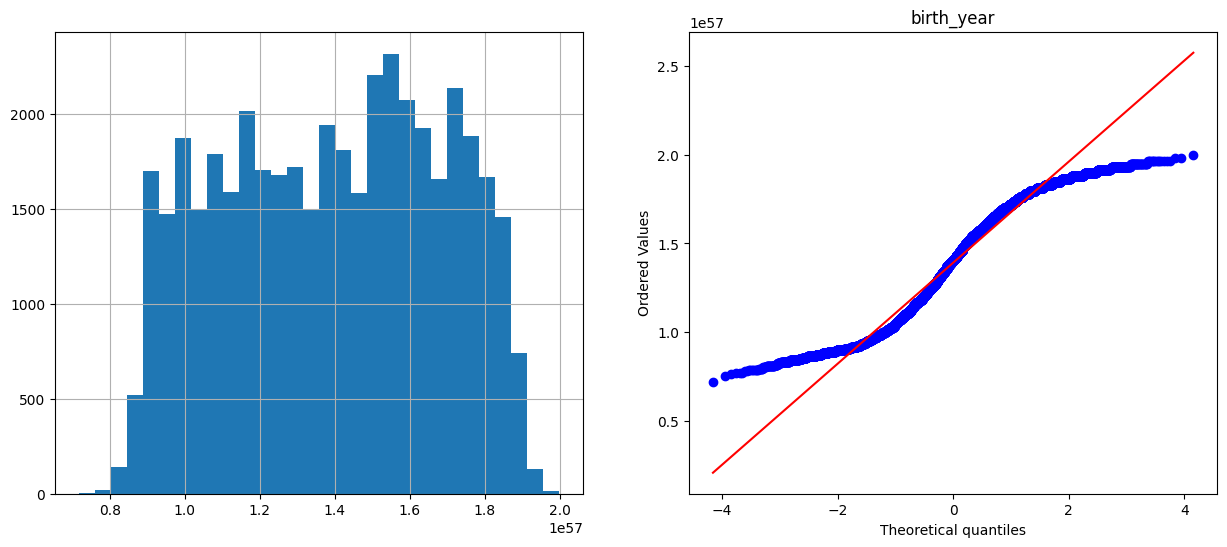

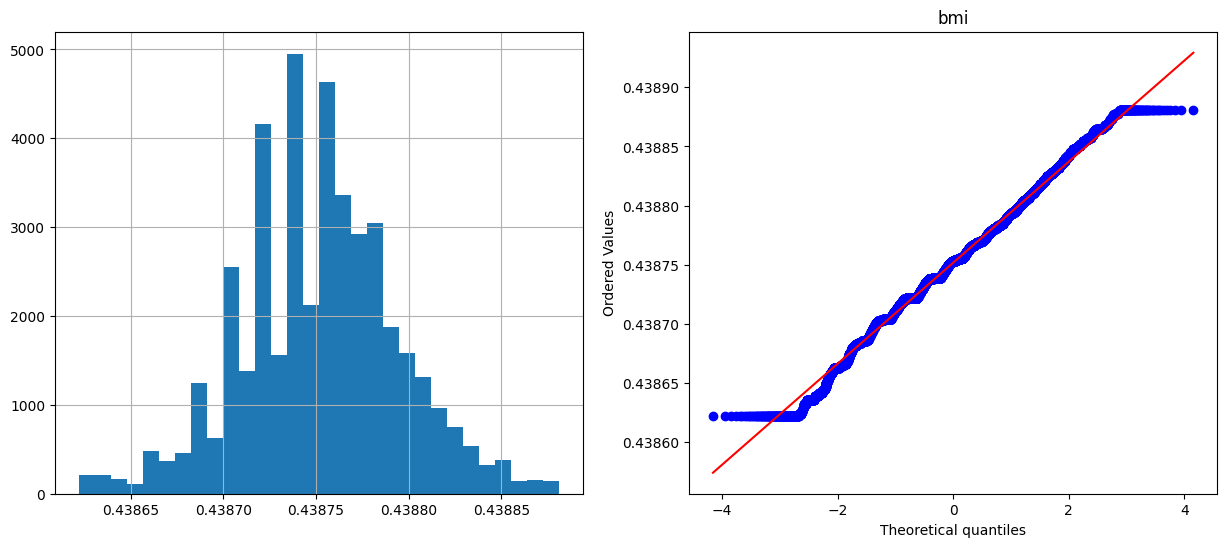

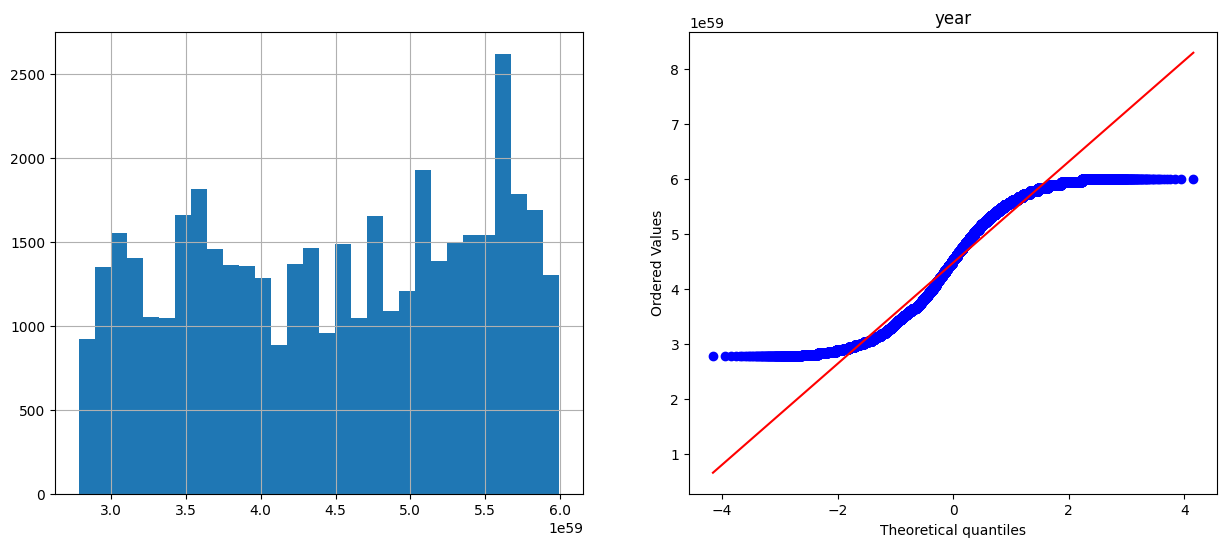

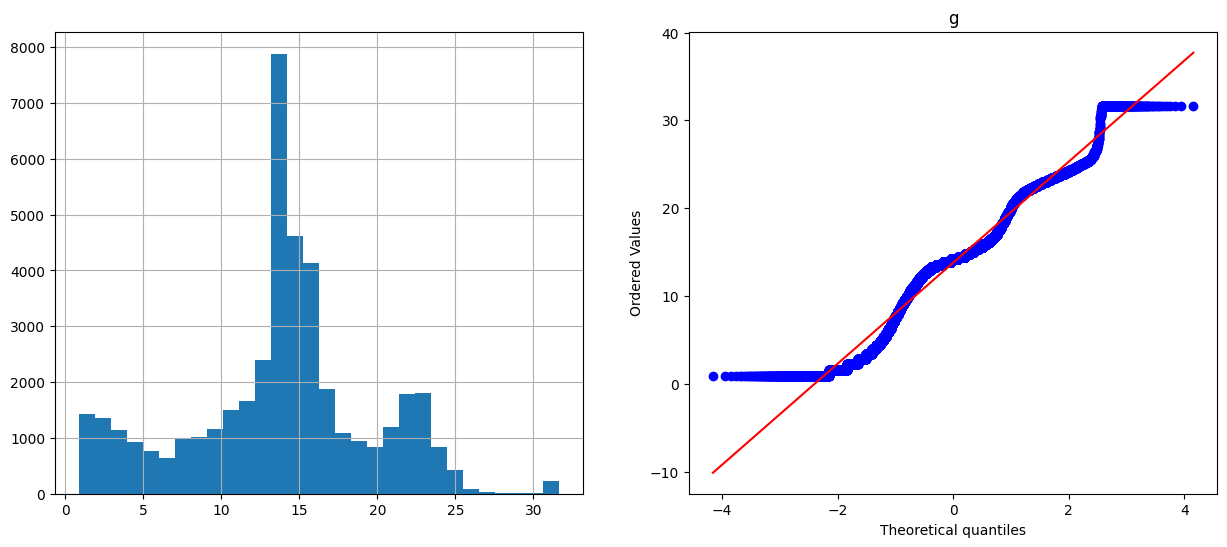

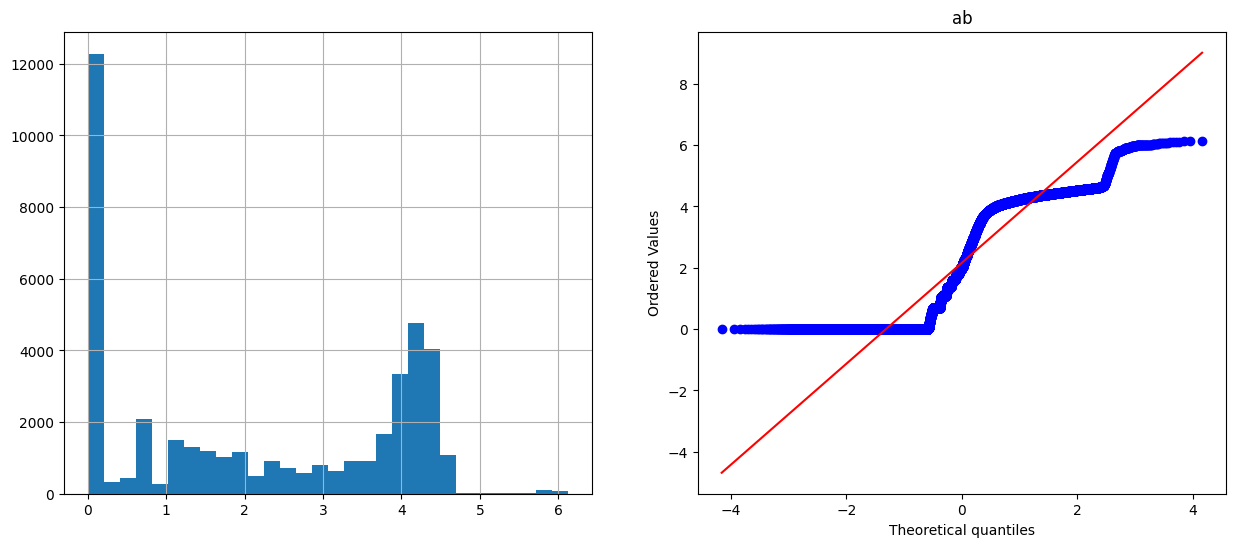

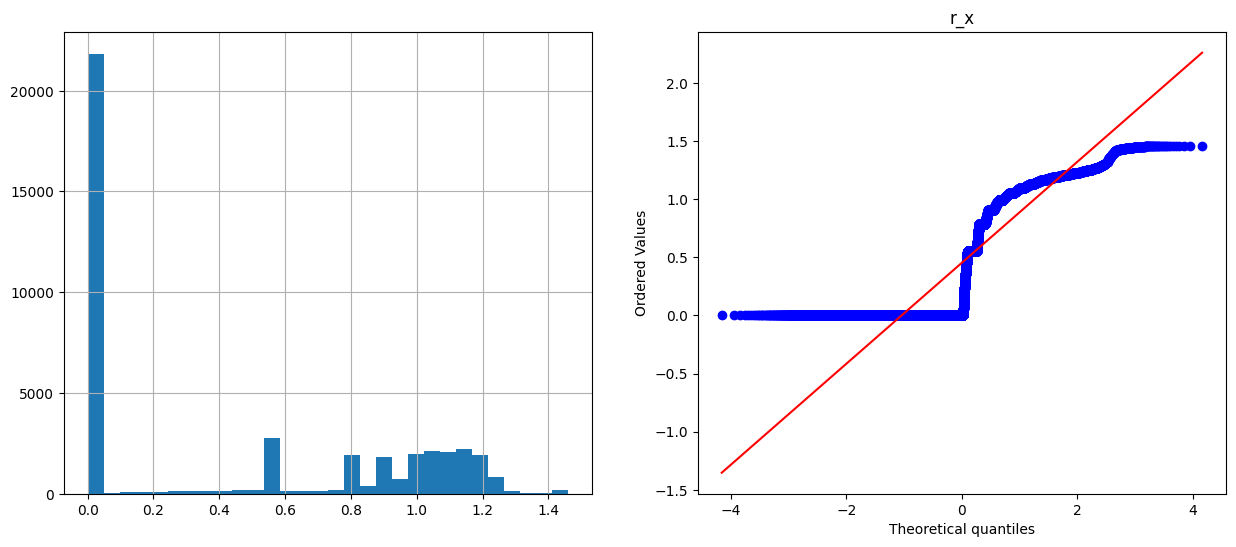

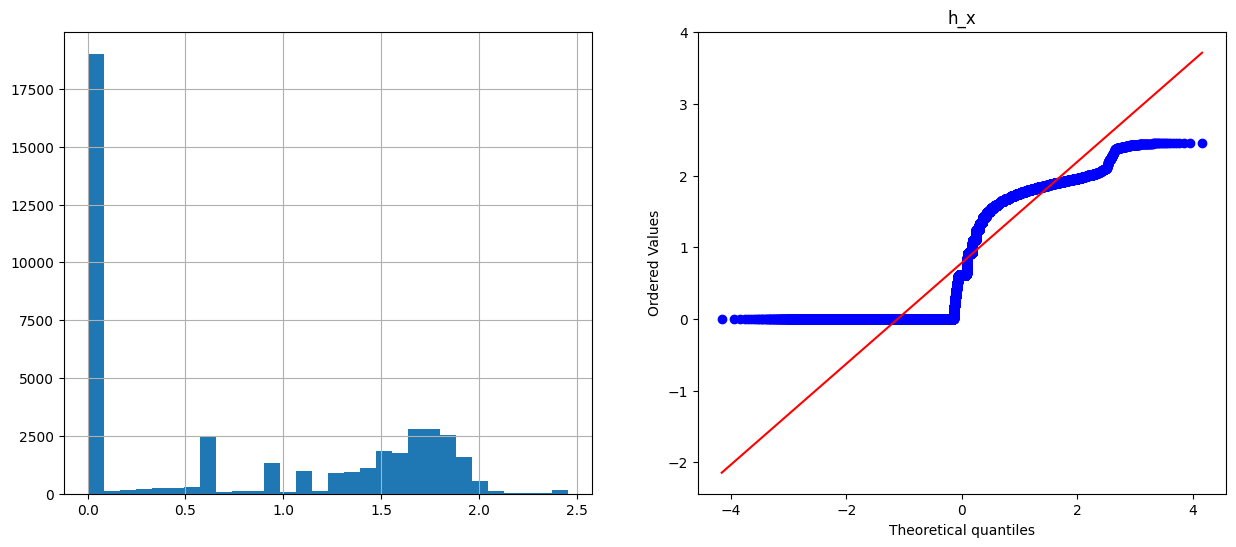

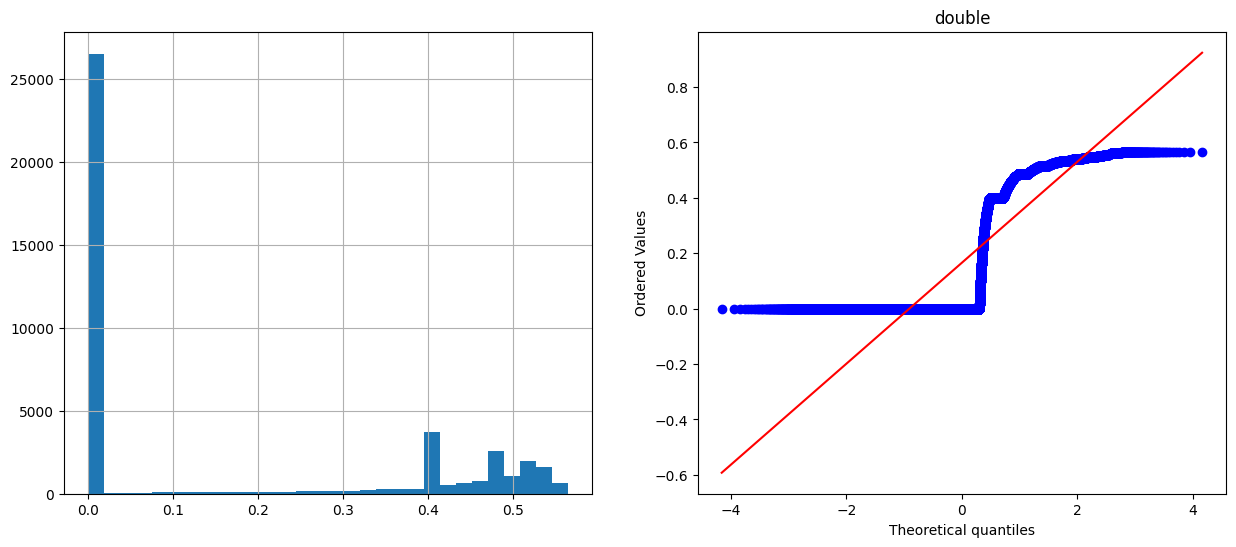

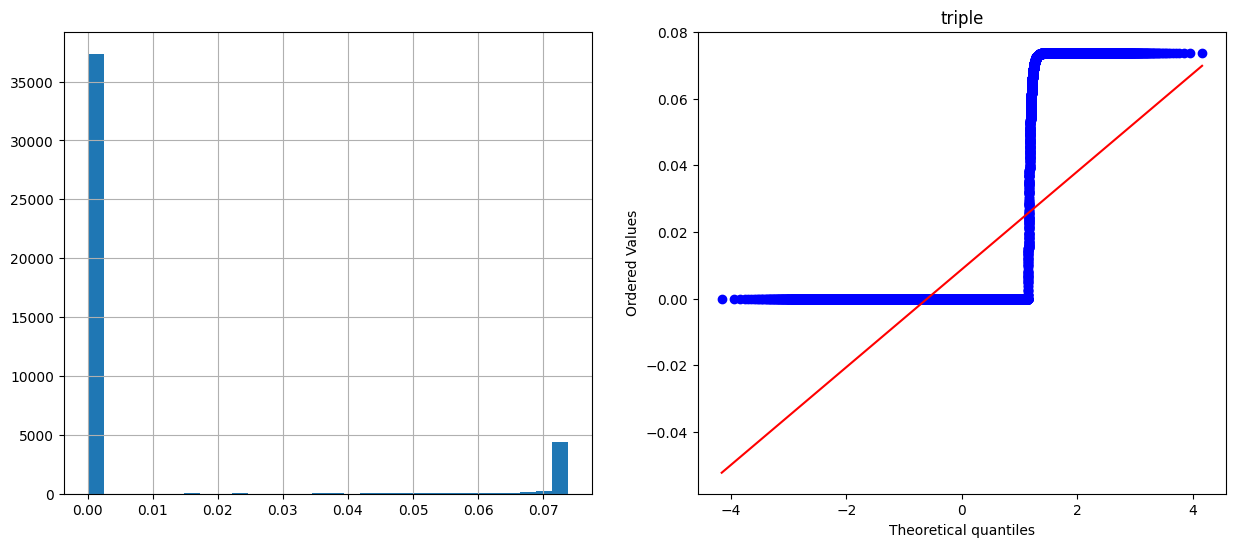

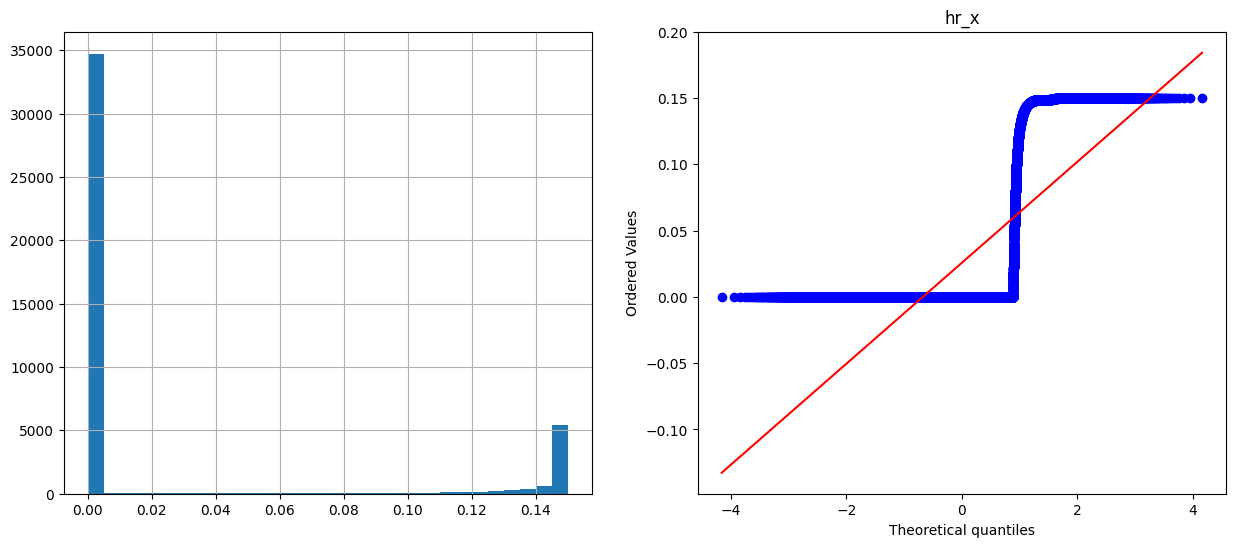

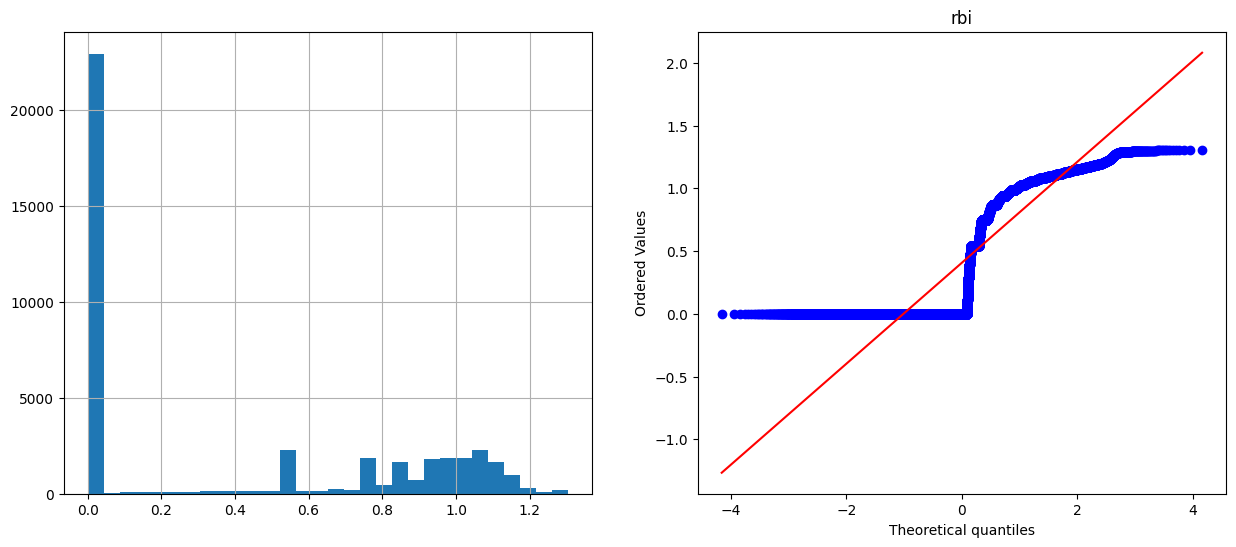

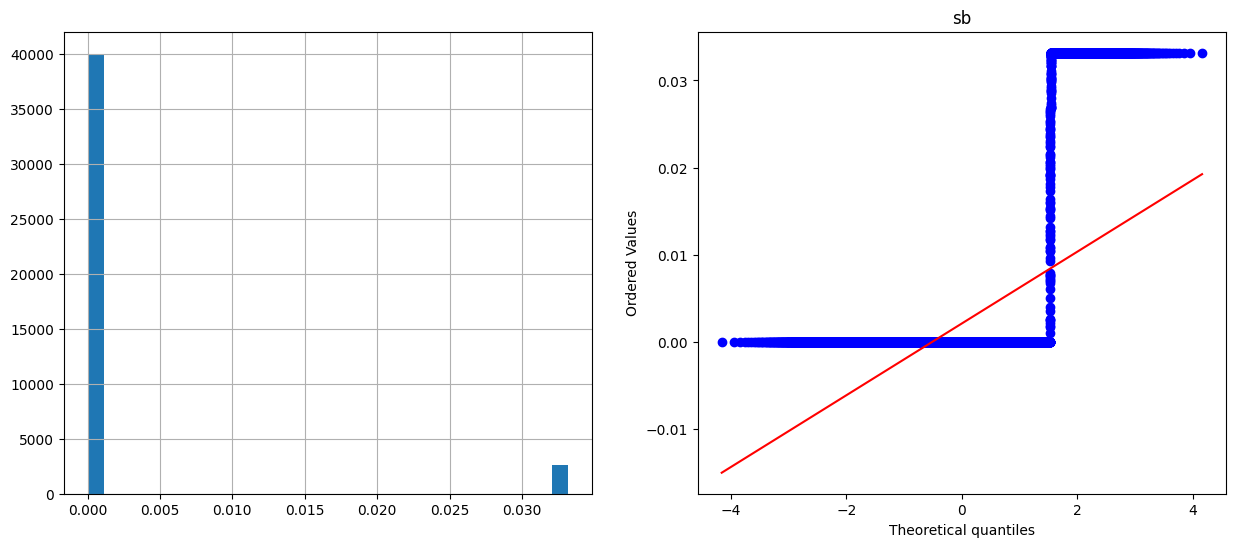

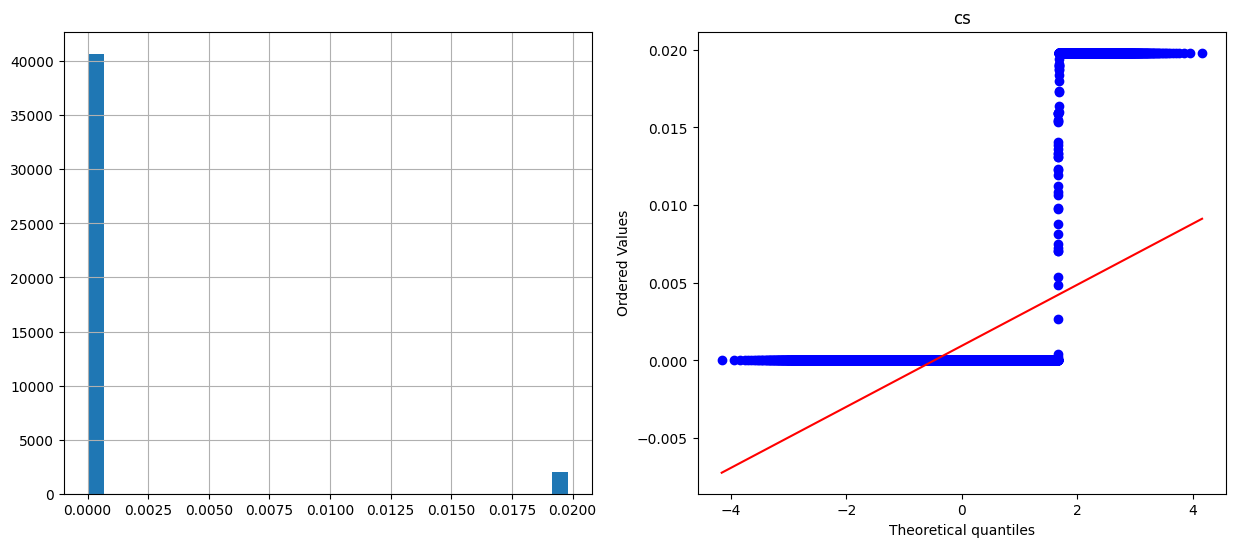

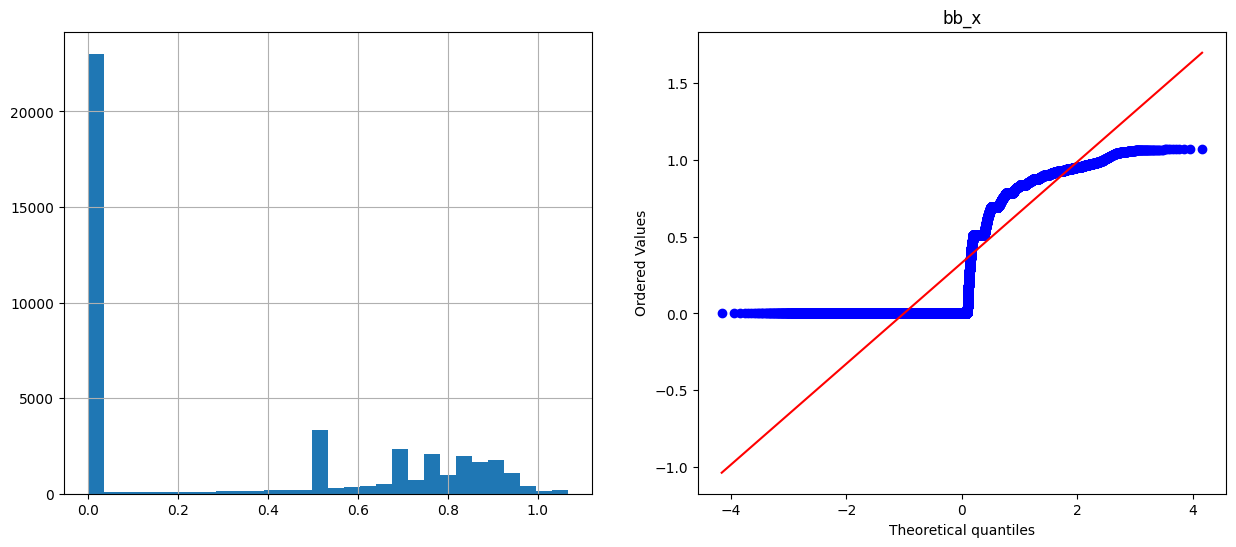

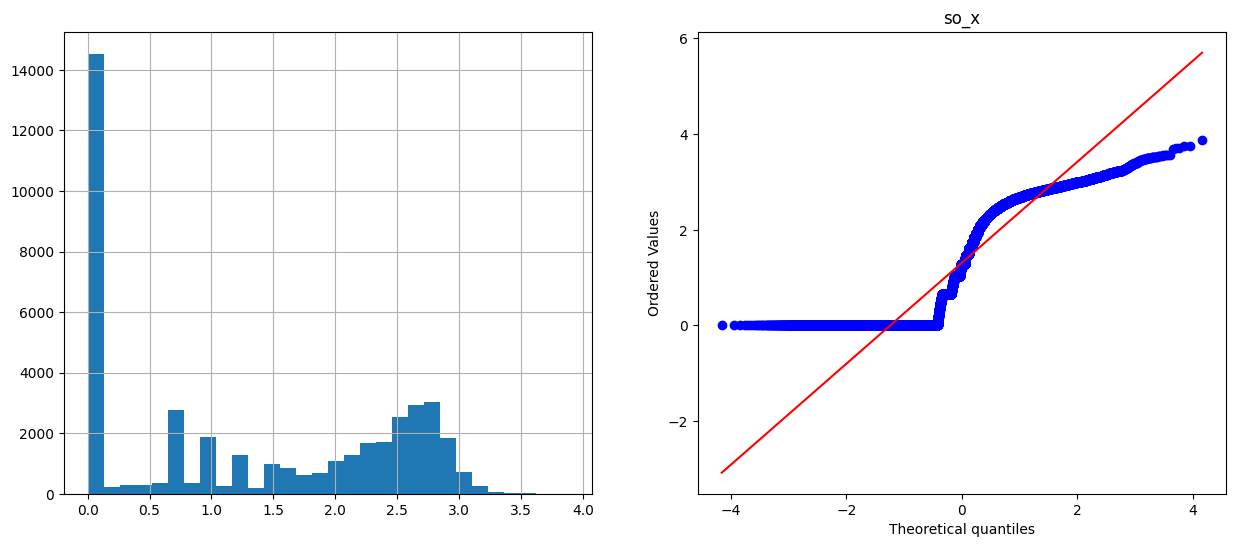

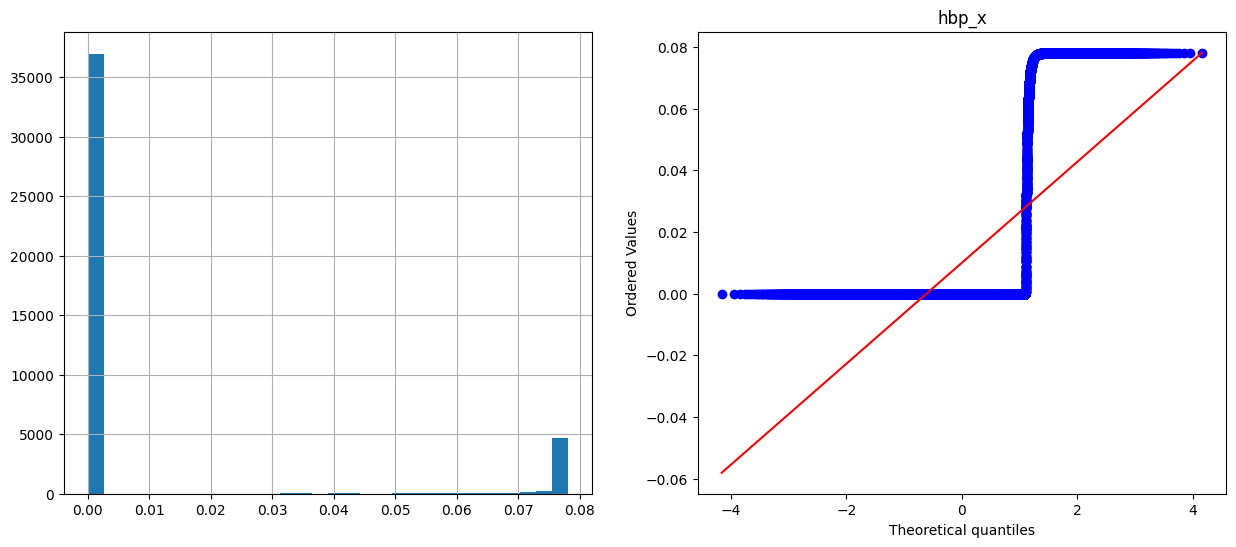

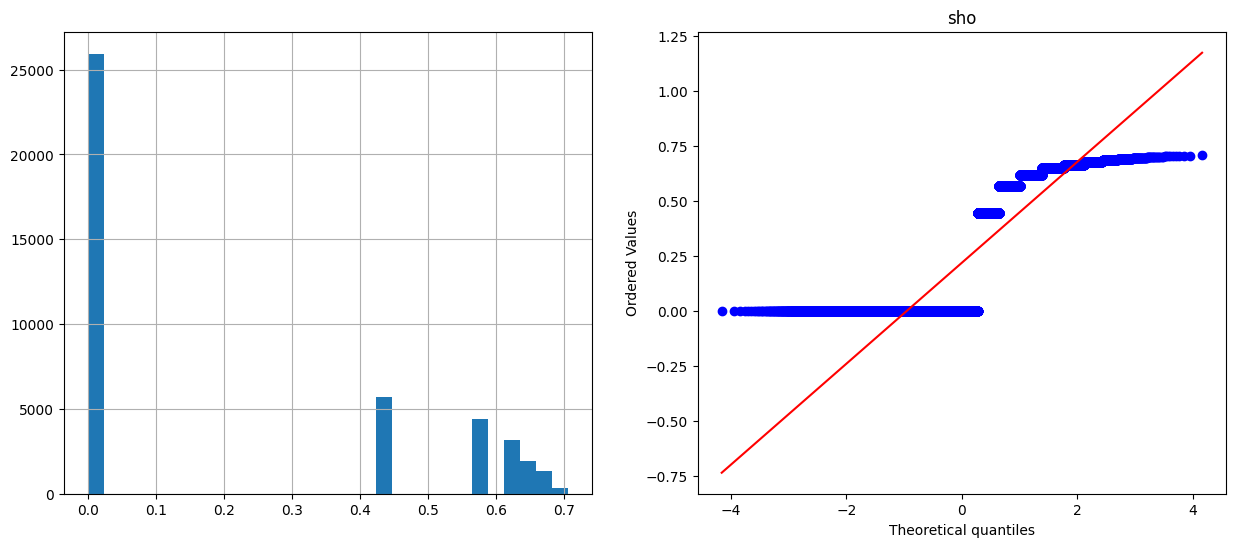

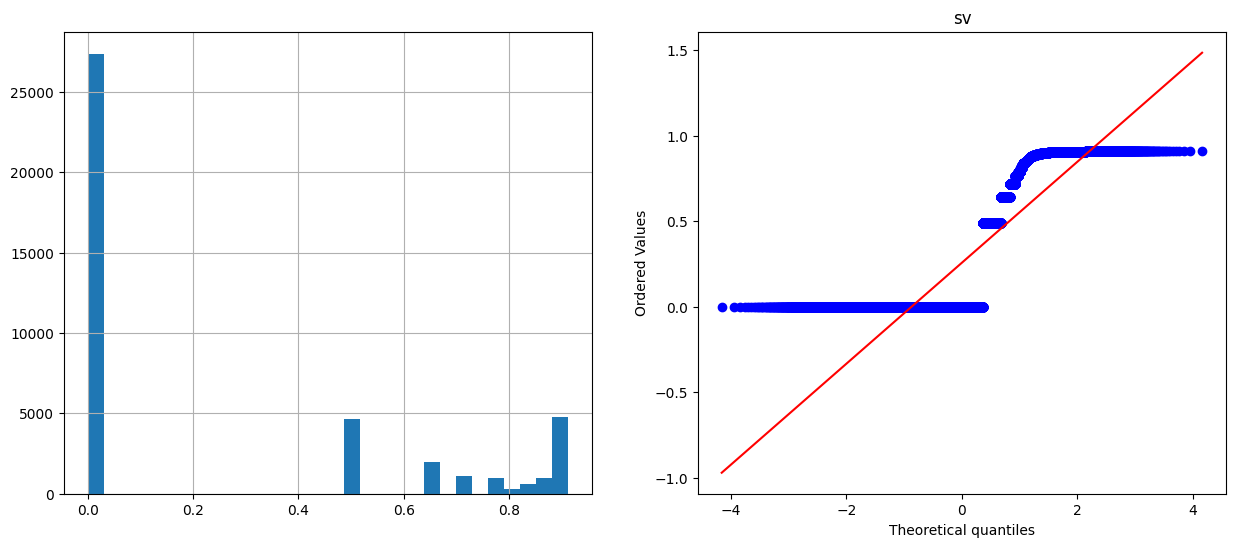

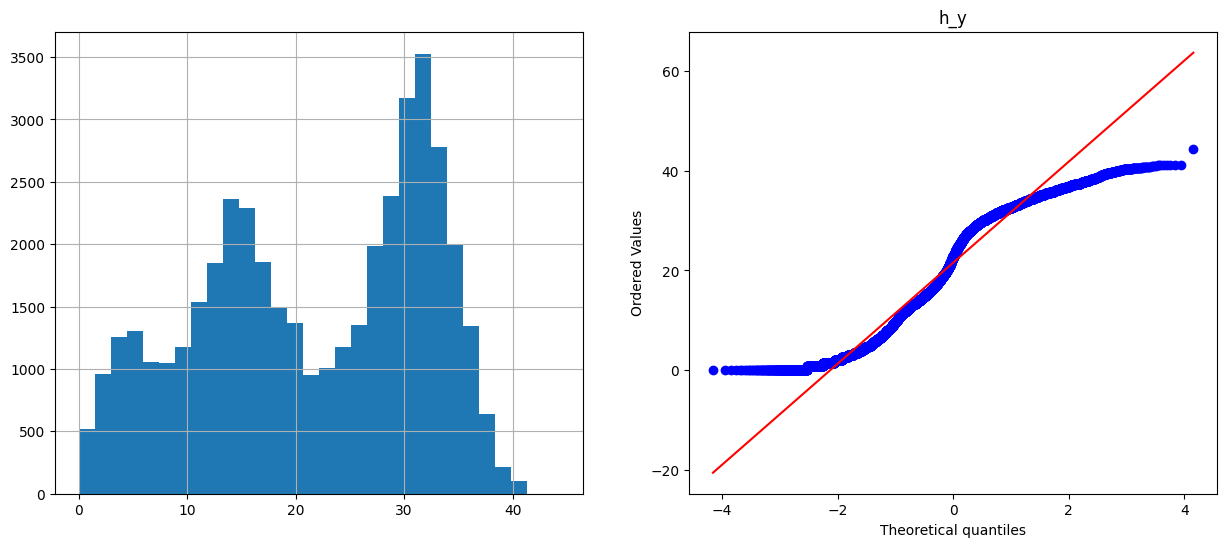

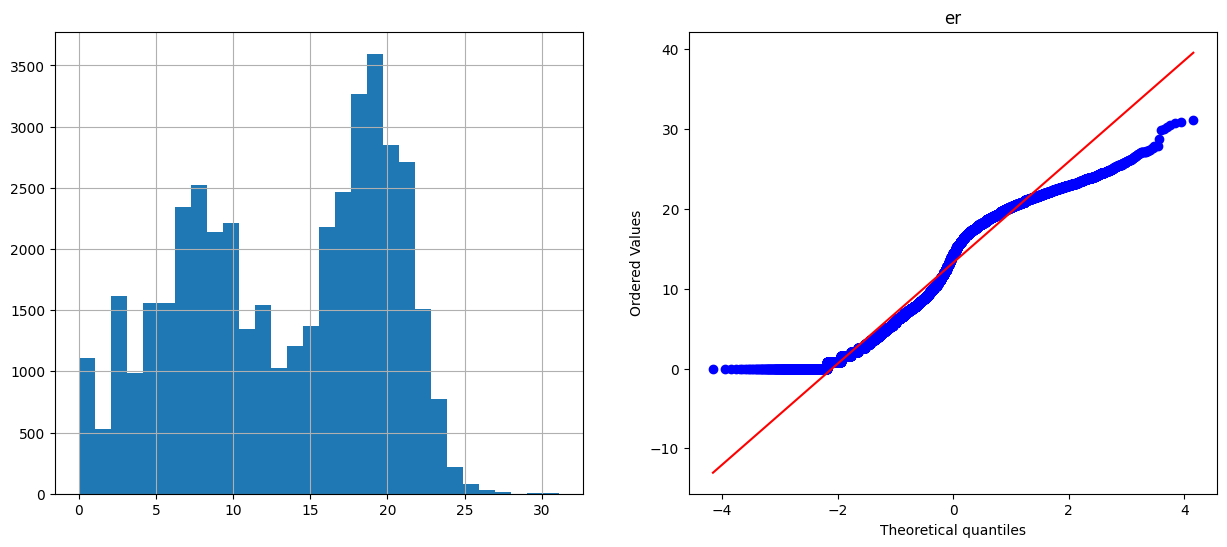

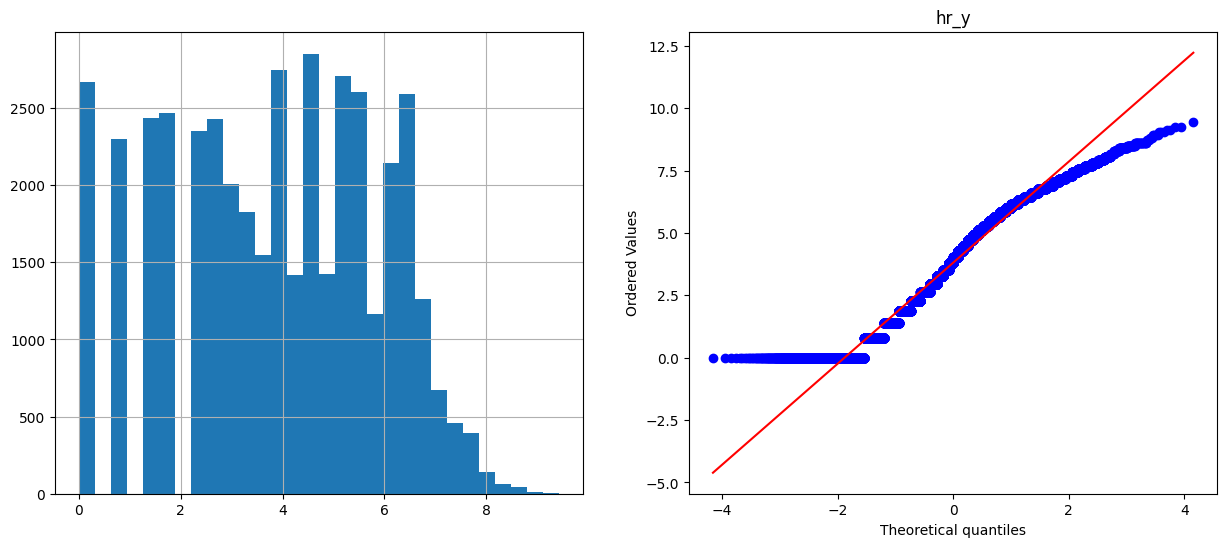

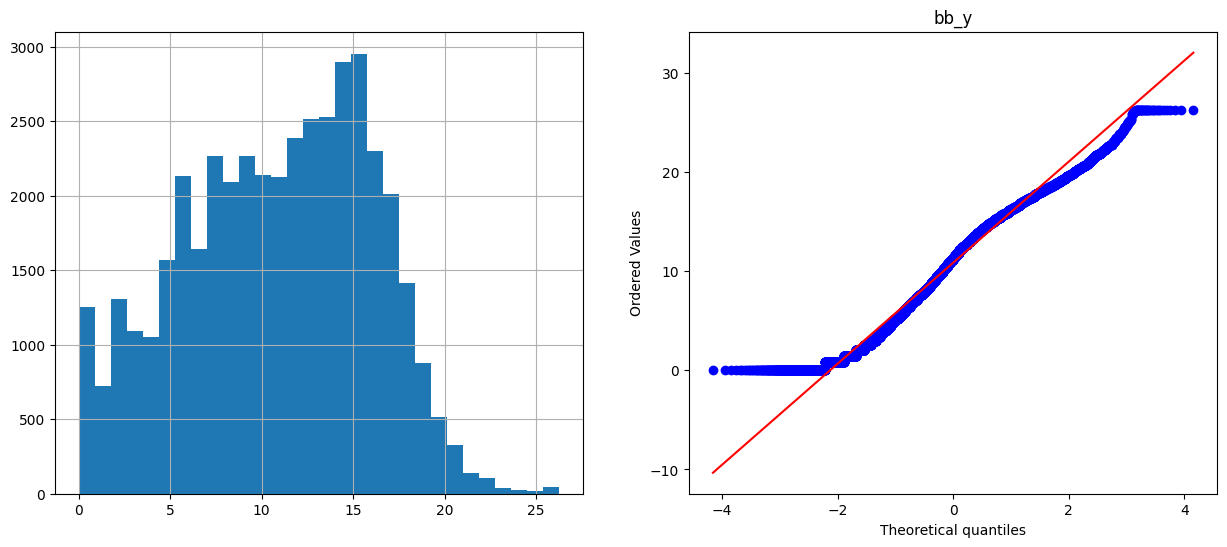

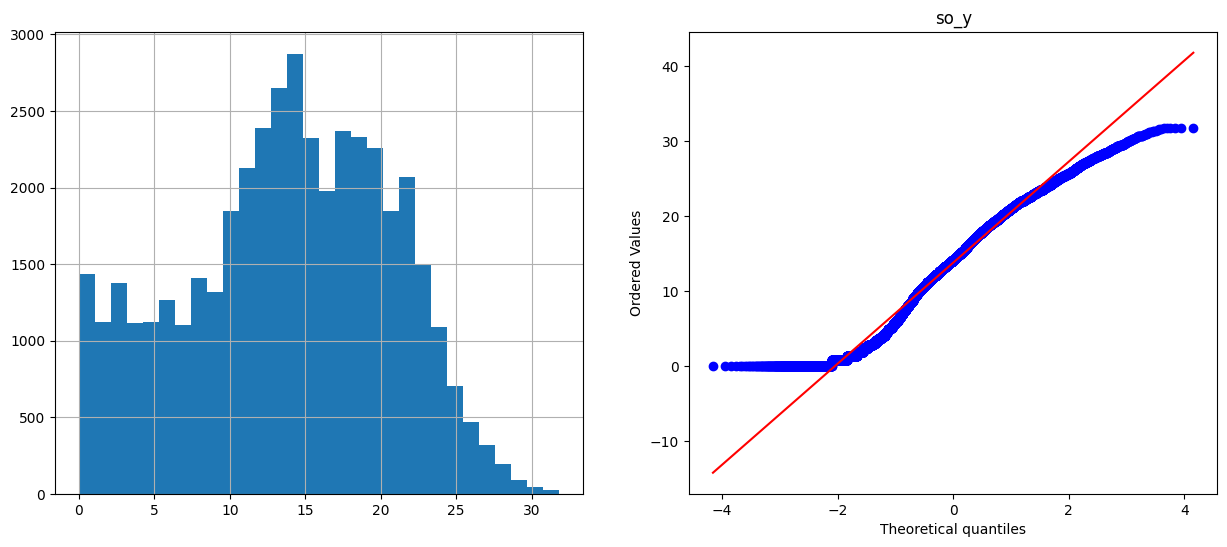

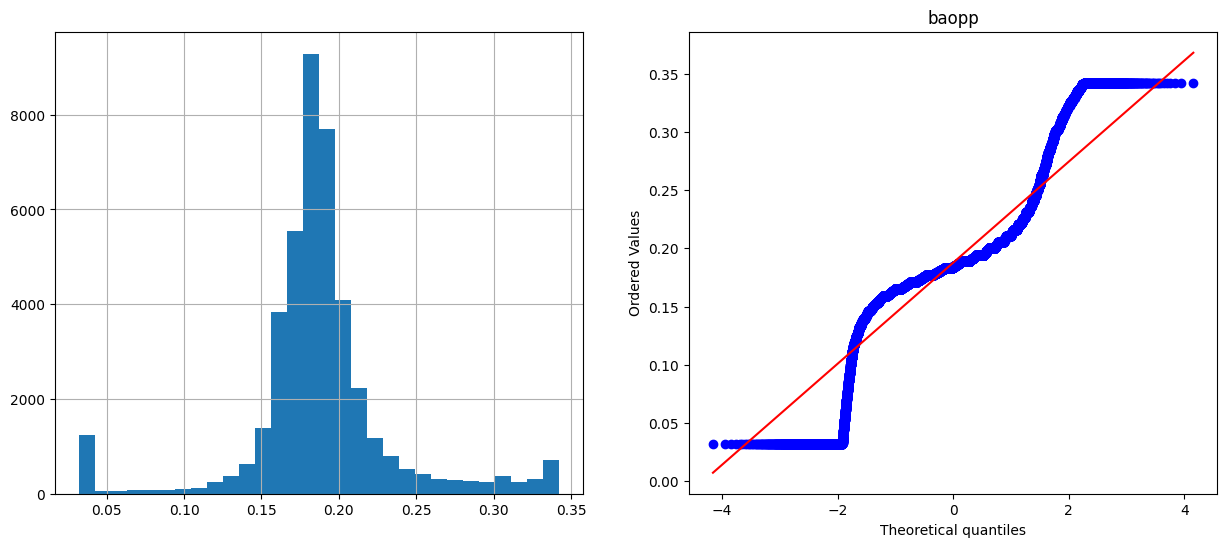

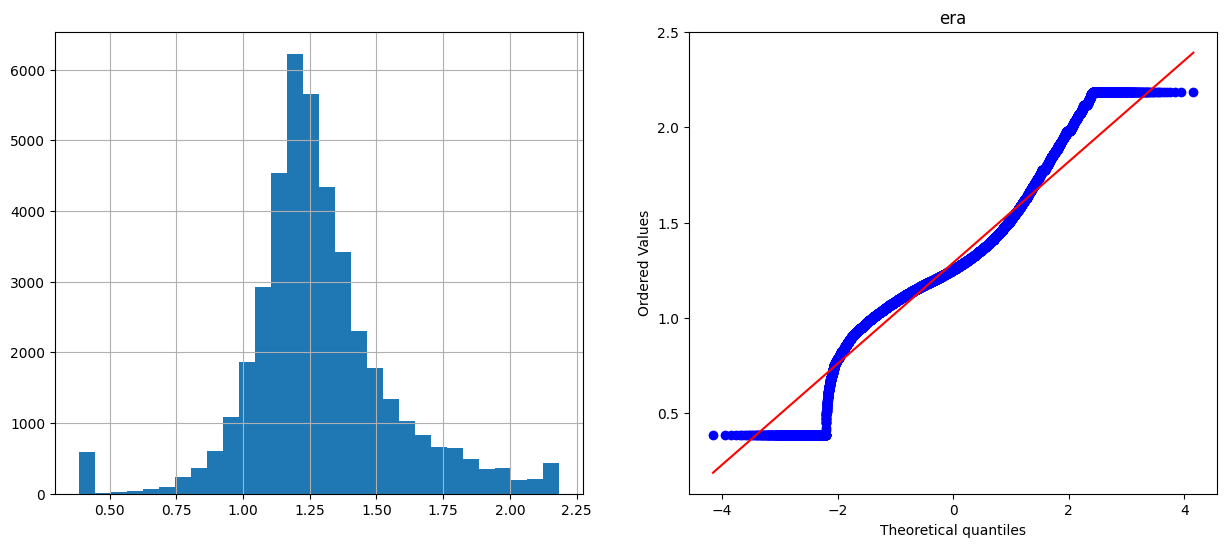

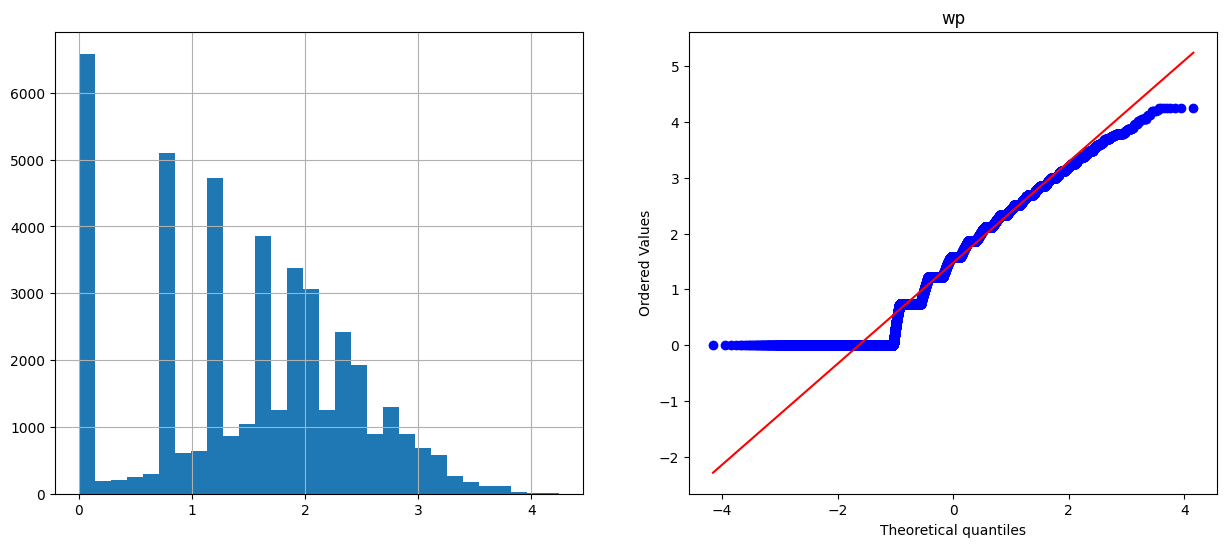

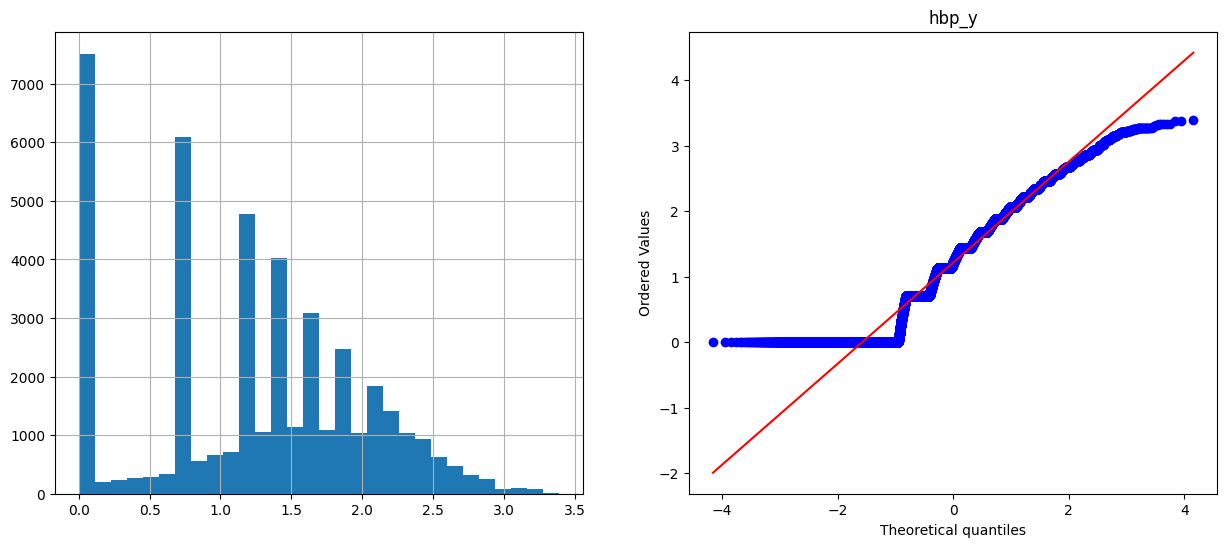

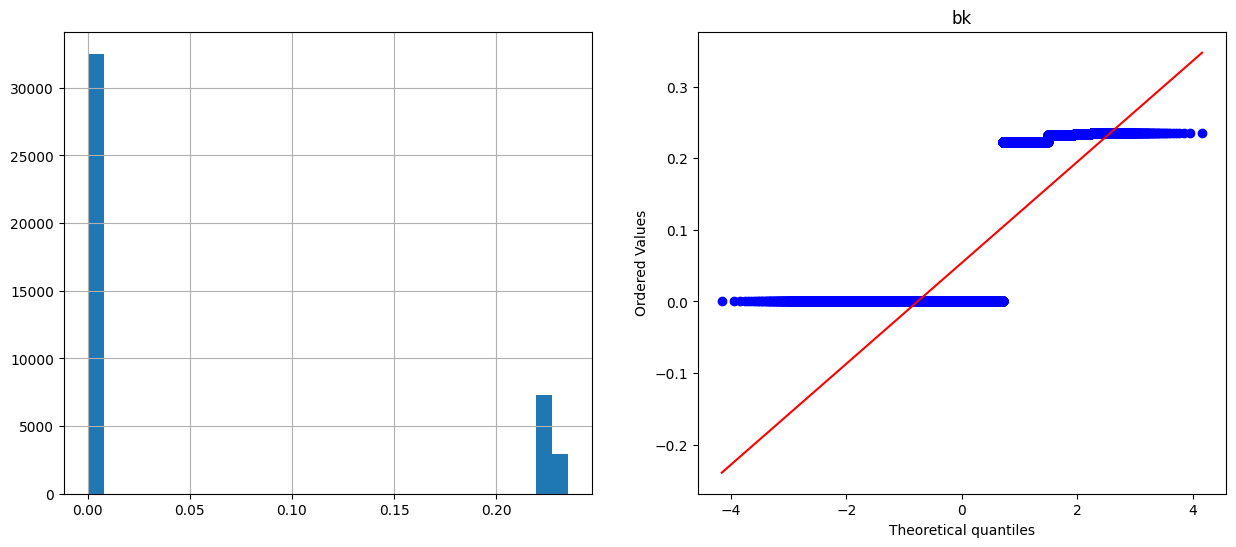

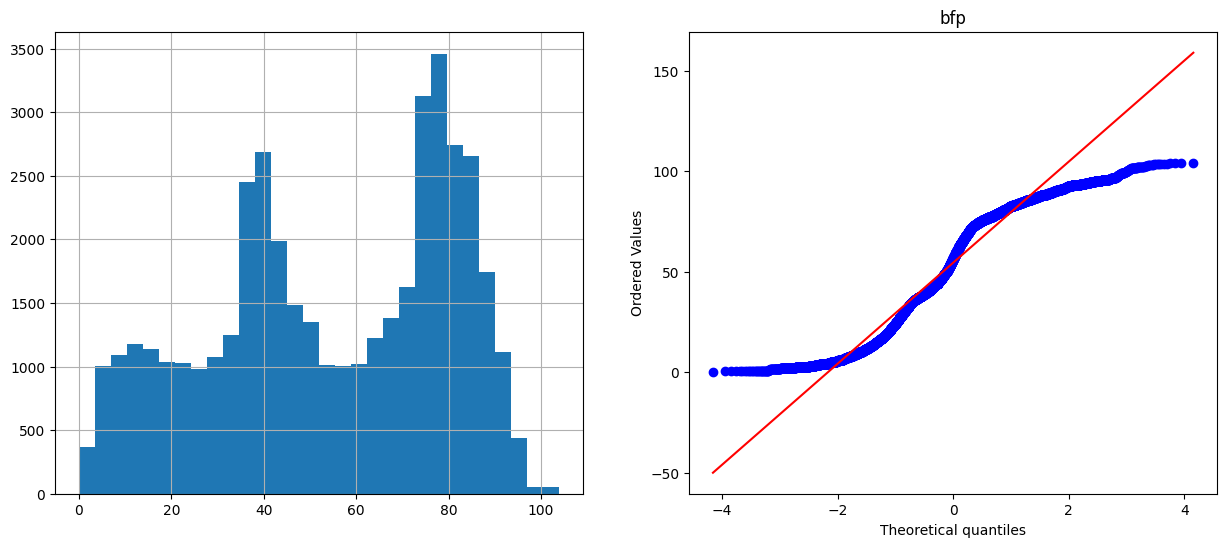

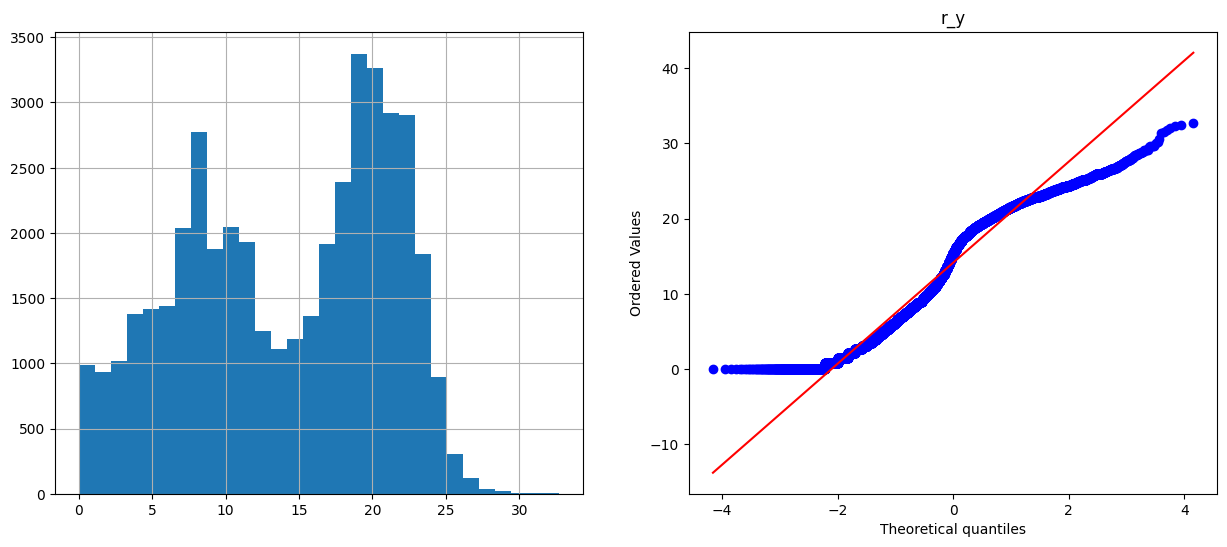

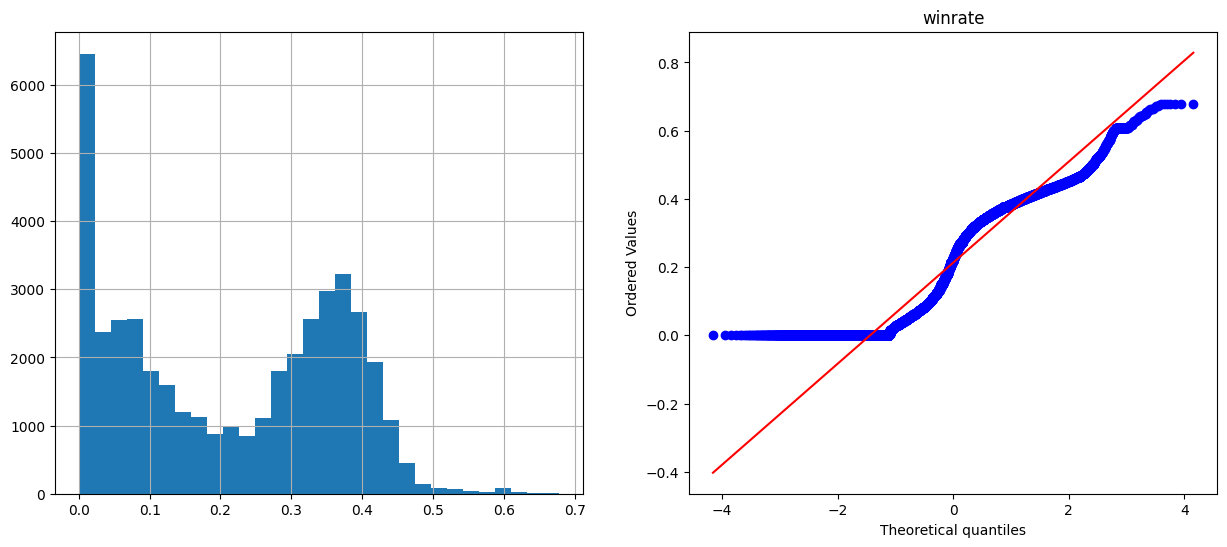

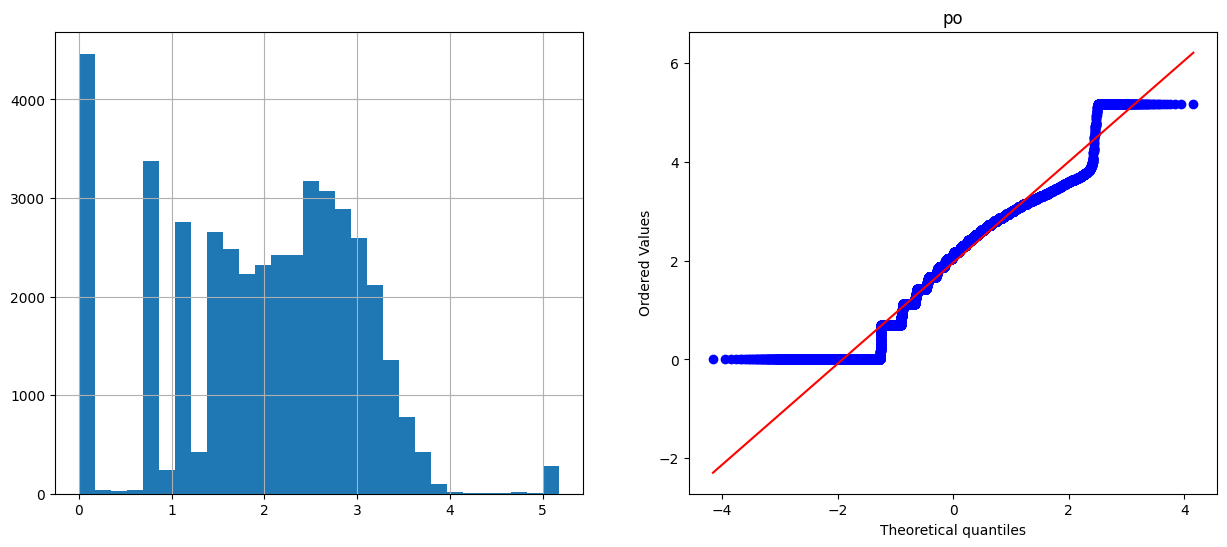

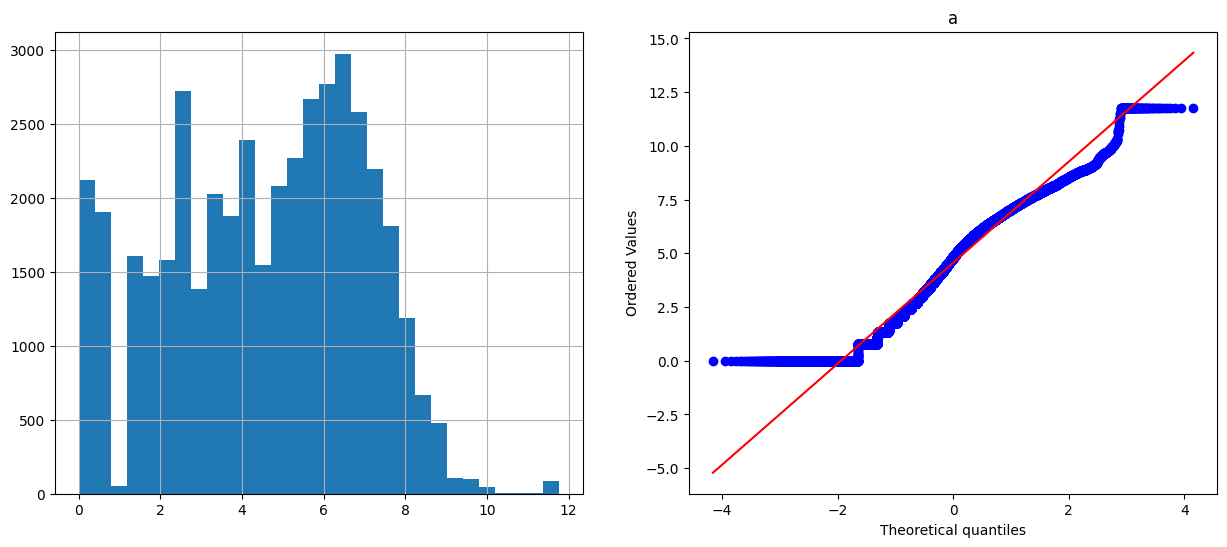

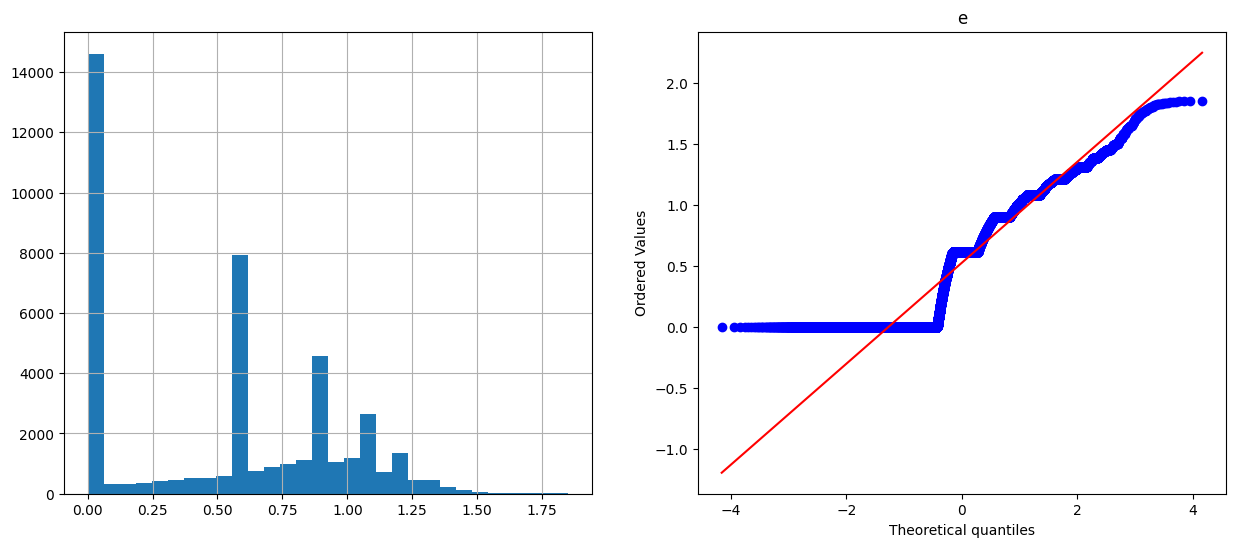

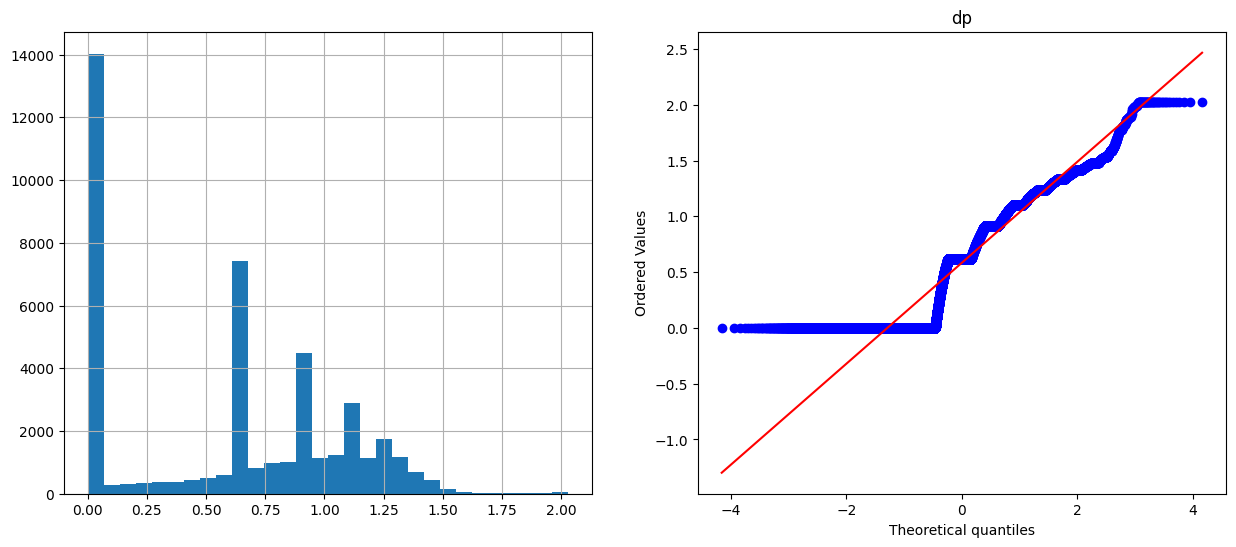

In [239]:
#diagnostic plots
for i in numericalcolumns:
    diagnostic_plots(X_train, i)

In [240]:
#get the categorical columns
cat_cols = [c for c in X_train.columns if X_train[c].dtypes=='O']
X_train[cat_cols].isnull().mean()

bats      0.0
throws    0.0
pos       0.0
dtype: float64

In [241]:
ohe_enc = OneHotEncoder(
    variables=X_train[cat_cols].columns.tolist(),
    drop_last=False)

ohe_enc.fit(X_train)

OneHotEncoder(variables=['bats', 'throws', 'pos'])

In [242]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [243]:
X_train.head()

birth_year       bmi          year          g        ab       r_x  \
45174  1.256676e+57  0.438751  3.914201e+59  15.891830  4.358306  1.140281   
9460   1.500182e+57  0.438738  4.630362e+59   2.260220  0.000000  0.000000   
9905   1.333441e+57  0.438772  4.101850e+59  10.733417  1.911873  0.000000   
8937   1.671391e+57  0.438686  5.127247e+59   4.917630  0.000000  0.000000   
54505  1.725234e+57  0.438812  5.519852e+59  23.211332  0.000000  0.000000   

            h_x    double  triple      hr_x  ...  pos_2B3BCFDHLFOFPSS  \
45174  1.829358  0.503522     0.0  0.146412  ...                    0   
9460   0.000000  0.000000     0.0  0.000000  ...                    0   
9905   0.617548  0.000000     0.0  0.000000  ...                    0   
8937   0.000000  0.000000     0.0  0.000000  ...                    0   
54505  0.000000  0.000000     0.0  0.000000  ...                    0   

       pos_1B2B3BCLFOFPRFSS  pos_CFDHLFOFP  pos_2B3BCCFLFOFPRFSS  \
45174                     0              0                     0   
9460                      0              0                     0   
9905                      0              0                     0   
8937                      0              0                     0   
54505                     0              0                     0   

       pos_1B1BDHDHP  pos_DHPP  pos_1B2B3B3BOFPRF  pos_OFPPRF  pos_P2B3BSS  \
45174              0         0                  0           0            0   
9460               0         0                  0           0            0   
9905               0         0                  0           0            0   
8937               0         0                  0           0            0   
54505              0         0                  0           0            0   

       pos_CFCFLFLFOFOFPPRFRF  
45174                       0  
9460                        0  
9905                        0  
8937                        0  
54505                       0  

[5 rows x 167 columns]

In [244]:
disc = EqualWidthDiscretiser(bins=20, variables=['ab','r_x','h_x','double','triple','hr_x','rbi','sho','baopp','bk'])

disc.fit(X_train)

EqualWidthDiscretiser(bins=20,
                      variables=['ab', 'r_x', 'h_x', 'double', 'triple', 'hr_x',
                                 'rbi', 'sho', 'baopp', 'bk'])

In [245]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

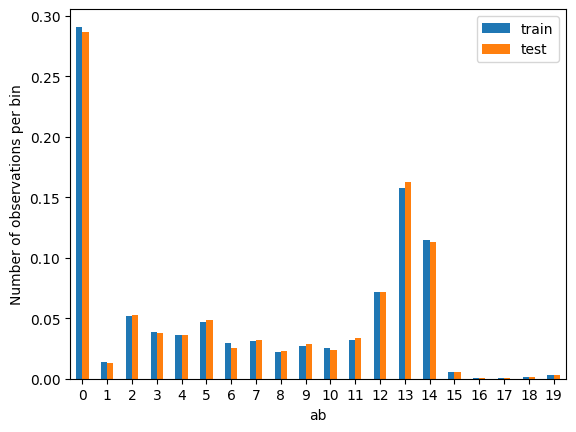

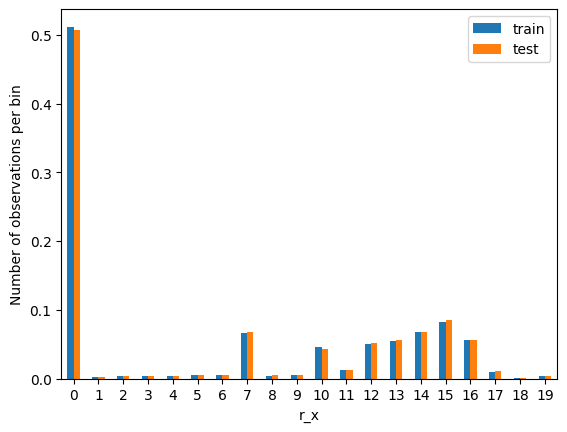

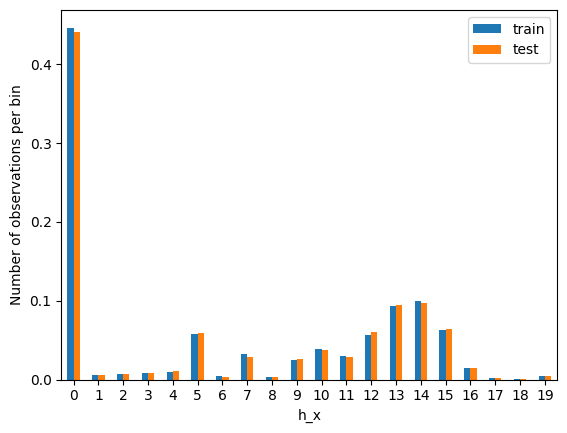

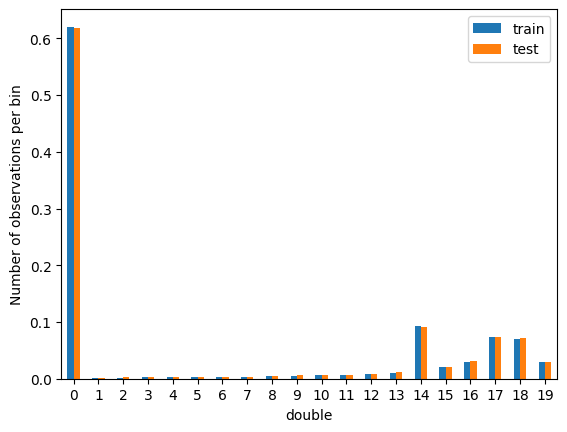

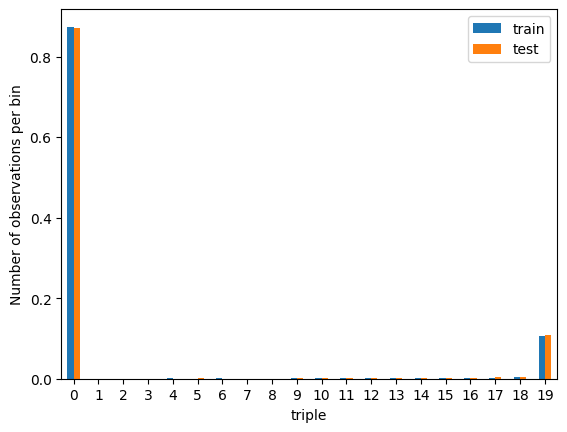

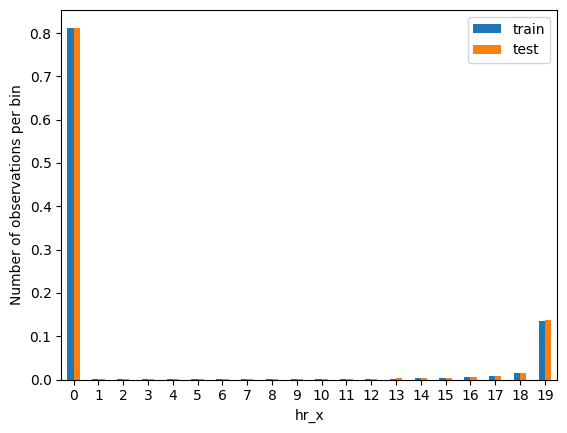

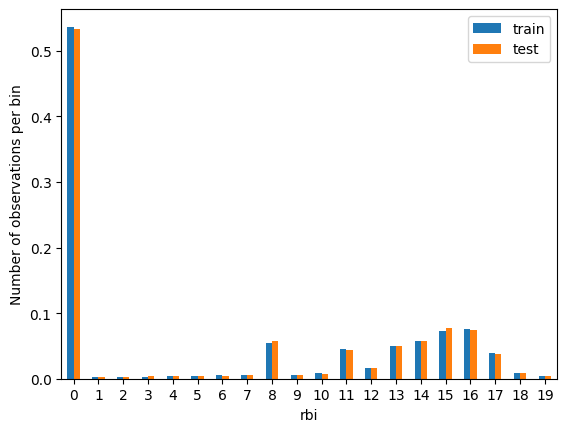

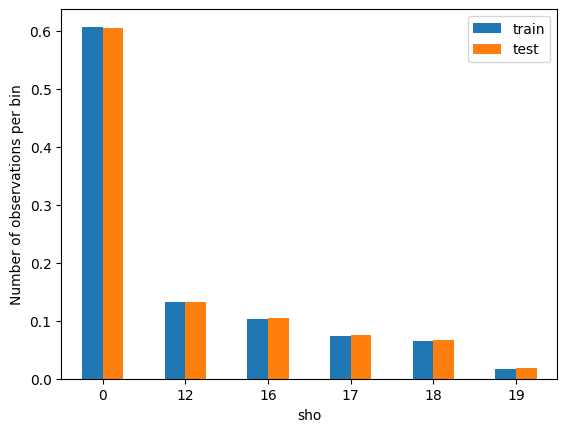

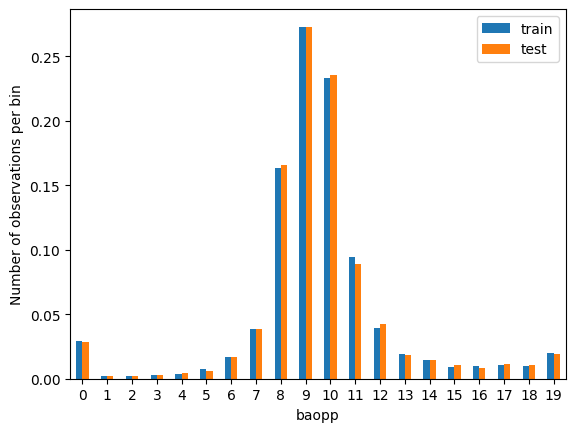

In [246]:
for i in ['ab','r_x','h_x','double','triple','hr_x','rbi','sho','baopp']:
    t1 = X_train.groupby([i])[i].count() / len(X_train)
    t2 = X_test.groupby([i])[i].count() / len(X_test)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']

    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')
    

In [247]:
scaler = RobustScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [248]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

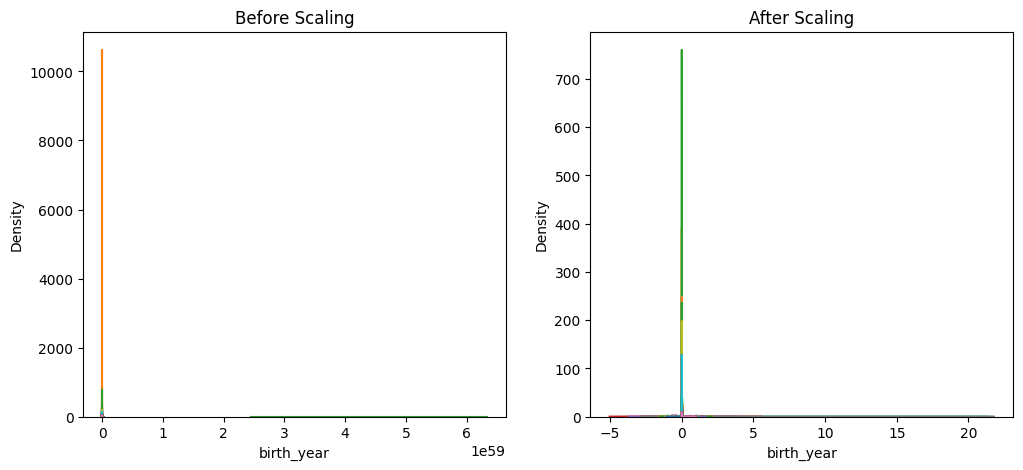

In [249]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for i in X_train.columns:
    sns.kdeplot(X_train[i], ax=ax1, label = i)

# after scaling
ax2.set_title('After Scaling')
for i in X_train.columns:
    sns.kdeplot(X_train_scaled[i], ax=ax2, label = i)

In [250]:
pca = PCA()

In [251]:
pca.fit(X_train_scaled)

PCA()

In [252]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

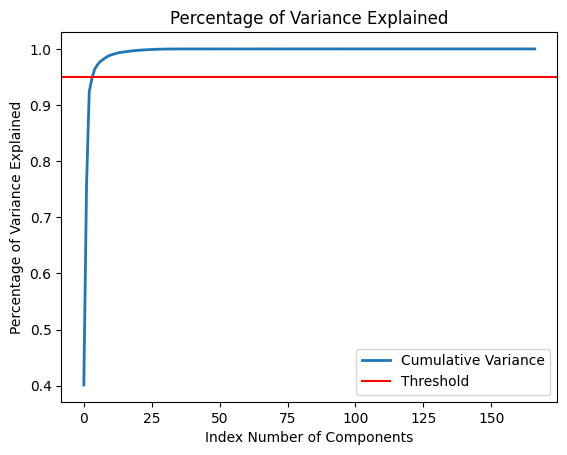

In [253]:
threshold = 0.95
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_explained_variance, linewidth = 2)
plt.axhline(y = threshold, color = 'red')
plt.title('Percentage of Variance Explained')
plt.xlabel("Index Number of Components")
plt.ylabel("Percentage of Variance Explained")
plt.legend(['Cumulative Variance','Threshold'])

In [254]:
X_train_student_final = X_train_pca
X_test_student_final = X_test_pca

y_train_student_final = y_train
y_test_student_final = y_test

### Step 4: Machine Learning Modelling

In [255]:
import numpy as np
from scipy import stats

y_labels = ["Non-All-Star", "All-Star"]

# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

print(f"The modal class label is {int(modal_class_label)}, \
and the accompanying string value of this label is {y_labels[modal_class_label]}.")

ModeResult(mode=0, count=21440)
The modal class label is 0, and the accompanying string value of this label is Non-All-Star.


In [256]:
y_train_preds_naive = [int(modal_class_label) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [257]:
y_test_preds_naive = [int(modal_class_label) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [258]:
# scoring accuracy of model
# note that other metrics exist, eg. AUC-ROC, Confusion Matrix-Based Metrics, but these matter more for imbalanced data
# where classes don't share same representation, eg. class 0 is 80%, class 1 is 10%, class 2 is 10%
# and are advanced Machine Learning topics

from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 50.16%.
The Naive Baseline Model's accuracy on test data is 49.64%.


In [259]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1200)
model.fit(X_train_student_final, y_train_student_final)

LogisticRegression(max_iter=1200)

In [260]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train_pred = model.predict(X_train_student_final)
y_test_pred = model.predict(X_test_student_final)

# Calculate and print evaluation metrics

print('Training Accuracy:', accuracy_score(y_train, y_train_pred))
print('Testing Accuracy:', accuracy_score(y_test, y_test_pred))
print('Training Precision:', precision_score(y_train, y_train_pred))
print('Testing Precision:', precision_score(y_test, y_test_pred))
print('Training Recall:', recall_score(y_train, y_train_pred))
print('Testing Recall:', recall_score(y_test, y_test_pred))
print('Training F1 Score:', f1_score(y_train, y_train_pred))
print('Testing F1 Score:', f1_score(y_test, y_test_pred))

Training Accuracy: 0.8995485063279295
Testing Accuracy: 0.8984225751869439
Training Precision: 0.881064373068136
Testing Precision: 0.8801610239471511
Training Recall: 0.9230769230769231
Testing Recall: 0.9241356887395686
Training F1 Score: 0.9015814806325922
Testing F1 Score: 0.9016124768702088


# Report

# Content page
[Intro](#intro)

[Problem Formulation](#prob)

[Data Wrangling on multiple tables](#dw)

[Data Cleansing and Transformation](#transform)

[Machine Learning Model](#model)

[Summary and Further Improvements](#sum)

[Reflection](#ref)

# Intro <a class="anchor" id = "intro"></a>

The aim of this project is to construct a predictive model capable of determining which Major League Baseball players will be selected for the All-Star games in the future. By cleaning and processing a dataset that contains player statistics, from the tables batting, pitching, and fielding metrics, alongside demographic and team-level data, I aim to discover the critical factors that are able to influence All-Star player selections. A robust classification model will be developed and rigorously evaluated to accurately forecast player recognition. The insights gleaned from this assignment will be very helpful to teams, fans, and media outlets, offering a deeper understanding of player performance and potential.

# Problem Formulation <a id = "prob"></a>

To formulate my problem, the first thing that I did was to explore the datasets. To do this, I loaded all of the datasets into my project from their respective csv files. I then printed the top 5 rows of every dataset to understand how the data looks like and the types of data that each of the datasets contain. This helped me to understand the data structures, column variable types, and any potential inconsistencies. While doing this, I referred to the data dictionary to understand the meaning of the different terms used as column names. After looking through the multiple datasets, I decided to create a prediction goal where the model would predict whether a certain player would be able to be selected for the All-Stars games in the future. The overall goal is to predict whether a player will be selected for the upcoming Major League Baseball All-Star Game. This problem is a classification problem because I will be trying to predict a binary outcome, selected (1) or not selected (0), with only 2 possible outcomes. The reason why I chose to do this is due to the problem statement that I chose to formulate which is "The baseball players that coaches have coached may have had the potential to participate in the All-Star games, but many talented players might have been overlooked and not given enough guidance." This would be done by using the tables 'player', 'batting', 'pitching', 'fielding', and 'allstar', filtered to show only the years when there was a player selected for the AllStar games. I will merge them together and use the data to predict whether the player will be selected for allstar games in the future. The 'player' table contains data about all of the players. Each of them have a unique player id which links the table to the other tables. There are other columns that describe the details of each player, such as their height, weight, birthday, which hand they bat or throw with, and more. The 'batting' table contains the player's player id, the current year, and their statistics of their matches while batting. It also stores information on what team the players were in and in which leagues they participated in. In the 'pitching' table is the unique player ids, the year, the players statistics during pitching, the number of wins, losses, and games they had played, the team that they were in and the leagues that they participated in. The 'fielding' table contains the unique player ids, the year, the team and stint the players were in, the league they participated in, their position in the game, the number of games that they had played, number of games they had started, and their statistics while fielding. The 'allstar' column would just be used to identify whether each player within the dataset had gone to the allstar games. By joining all of these tables together, I would be able to have a single large dataset with multiple columns and rows. This dataset would consist of each player id, and their specific statistics for fielding, pitching, and batting. There will also be a column that shows whether the player had gone on to participate in the allstar games. The data will also be split to show the statistics of each player during the different years during which that they were active. The tables will be joined by the 'player_id' column, which is able to link all of the different tables together.

# Data Wrangling on multiple tables <a id = "dw"></a>

After formulating the goal that I wanted to predict, whether a player would be selected for the allstar games in the future, I performed data wrangling on the different tables that I would be using to create my dataset. These tables included 'player', 'batting', 'pitching', 'fielding', and 'allstar'. The 'player' table would be the base table, and the other tables will be merged to it, to create the final dataset that I would be using. The plan was to get the basic information about the players from the 'player' table, and the player statistics from 'batting', 'pitching', and 'fielding' tables. The allstar table would be used as an additional column in the dataset that shows whether the player had been selected for an allstar game during a specific year. To do all of this, the first thing I did was to prepare the tables for merging. I started with the 'allstar' table. I printed out the information of the 'allstar' table and I checked the number of instances of each league within the table. There were only 2 leagues within the 'league_id' column of the 'allstar' table, 'AL' and 'NL', thus I decided to filter away the other leagues in the other tables as they were not in the allstar games. I then checked the information of the 'player' table. Looking through the columns, I noticed some of the columns had a high percentage of null values. I proceeded to drop these columns and any of the other columns that I felt were not helpful, such as 'birth_state', and 'birth_city', which would not be of help when training the model, as they are unable to affect the outcome of whether a player is to be selected for the allstar games. I also created a new column 'bmi' from the columns 'weight' and 'height', as a player's bmi can be an indicator of a player's overall fitness, which is usually tied to how well a player is able to perform. The next table that I prepared was the 'batting' table. I prepared the 3 tables 'batting', 'pitching', and 'fielding' tables in similar methods. I would first filter through 'league_id' column of the tables to remove unnecessary leagues such that it only contains rows of the leagues 'AL' or 'NL', since only these 2 leagues were in the 'allstar' table. After this, I would drop some of the unnecessary columns within the tables, and the columns that contain high numbers of null values. However, for the 'pitching' column, before I did this step, I created a new column called 'winrate'. This column was created from the columns 'w' and 'g', which stand for the number of wins and number of games respectively. This helps to show how often the player was able to win their matches, which can help to predict how well a player plays. After dropping the unnecessary columns and columns with a large percentage of null values, I grouped the 'player_id' column with the 'year' column. This is because for the tables 'batting', 'pitching' and 'fielding', there were duplicate player ids due to there being data on their statistics in various different stints. To resolve this issue, I grouped the 'player_id' and 'year' columns together and summed the statistics up, which resulted in there being only 1 of each player id and year groups within each table, which would make merging the tables together a much smoother process and there would not be any duplicate rows that are being generated during the merging process. I merged the tables by first inner joining the 'batting' table to the 'player' table by the 'player_id' column. For both the 'pitching' and 'fielding' tables, I inner joined them to the dataset by using both the 'player_id' and 'year' columns. I used both columns since if I were to use only one of them, it would result in duplicate rows being generated, and my dataset would then have a large number of rows that would not be helpful in training the model and would instead hinder it and cause it to have a slower speed. After merging these tables together, I joined the 'allstar' table. For the 'allstar' table, I left joined it to the existing dataset with the 'player_id' and 'year' columns, such that all of the existing dataset rows would be left as they were, and if the 'player_id' and 'year' pair did not exist in the 'allstar' table, it would generate null values. After doing this, I created a new column called 'allstar', and it consisted of 1s and 0s based on whether the column 'team_id', from the 'allstar' table, has a value. Since there were no null values for the 'team_id' in the original 'allstar' table, I used it to tell whether the 'allstar' column had a matching 'player_id' and 'year' pair with the dataset. These rows that have a value for 'team_id' would be set as 1, true, while the others with null values would be set as 0, false. Thus I was able to create a column that states whether a player had been able to participate in the allstar games. After doing this, I dropped the remaining columns from the 'allstar' table and the 'player_id' column as they were not useful and I did not need the 'player_id' column anymore. I printed the top 5 rows and the information of the dataset that I had just created, to ensure that the merging had no issues, such as duplicate rows being generated and causing the number of rows to increase by a very large amount. As there was nothing wrong, I moved on to the next step. I filtered the dataset to show only the years where there was a player selected for an allstar game. This was done by summing the value in the 'allstar' column for each year, and if it had a value more than 0, it meant a player was selected for the allstar games. After doing this, the number of rows was reduced from 39,929 rows to 32,185 rows. Thus, my dataset was created.

# Data Cleansing and Transformation <a id = "transform"></a>

To begin the process of cleaning and transforming the data, my first step was to plot a heatmap to observe the correlations between all of the variables. This helped me to identify which variables had strong or weak correlations. I then plotted a bar graph to show the number of unique values that every numerical column had. This helped me to understand whether the different numerical columns had a high cardinality, and how many distinct values that they had. This would be able to help me when I am choosing a machine learning model to use, as high cardinality columns may require different preprocessing strategies to improve the model performance. I plotted boxplots for all of the numerical columns within the dataset that I had created. The reason why I created these boxplots was to gain a better understanding of the distributions of each of the numerical columns. Boxplots provide valuable insights into the ranges of the values, the most common values, and the number of outliers that are within each numerical column. This initial visualization step was important as it allowed me to observe the characteristics of the data and identify any potential issues that might have had to be addressed during the data cleaning process. Following the creation of the boxplots, I created a function to generate diagnostic plots for each of the numerical columns. This function would later be used to assess whether the numerical columns followed a normal distribution. The diagnostic plots included a histogram, and a line graph to evaluate the normality of the data. Understanding the distribution of the data is important because many statistical methods and machine learning algorithms assume that the data follows a normal distribution. Once I had a good understanding of the data distributions, I proceeded to address the class imbalance in my dataset using SMOTE-NC (Synthetic Minority Over-sampling Technique for Nominal and Continuous data). SMOTE-NC helps to generate synthetic samples for the minority class, particularly when the dataset contains both categorical and continuous features, which is crucial for improving the model's performance on imbalanced data. I then split the dataset into training and testing sets. I used a test size of 0.3, meaning that 30% of the data was reserved for testing, while the remaining 70% was used for training the model. The target variable for my prediction goal was the 'allstar' column, as my objective was to predict whether a player would be selected for the All-Star games in the future. This target variable is binary, indicating whether a player is selected or not, with 0 representing no and 1 representing yes. After splitting the data, I printed out the null values in the X_train dataset to identify any missing data. I discovered that the dataset did not contain any null values and the reason for this is likely because I had grouped the data previously. I used the diagnostic plotting function I created earlier to visualize the distributions of the numerical columns again. This step was important to see if the data transformations and imputations had affected the distributions and to check if the numerical columns followed a normal distribution. To further normalize the data, I applied the Yeo-Johnson transformation. This transformation is useful for making the data more normally distributed. Following the normalization step, I used winsorization to cap the numerical columns. Winsorization helps to reduce the effect of outliers by capping extreme values to a specified percentile. Since multiple numerical columns contained numerous outliers, trimming these values might have skewed the data. Winsorization provided a balanced approach to manage outliers without significantly altering the data distribution. After capping the data, I plotted the diagnostic plots again to observe the effects of the Yeo-Johnson transformation and winsorization on the data. Some of the columns appeared more normally distributed, which was a positive outcome. I then turned checked the categorical columns for null values. There were no null values in any of the categorical columns so I was able to immediately proceeed to the next step. After ensuring there were no more null values within the dataset, I proceeded to encode the categorical variables. I used one-hot encoding because it helps to maintain the interpretability of the features to some extent. One-hot encoding converts categorical variables into a series of binary columns, indicating the presence or absence of each category. This method is especially useful when dealing with machine learning algorithms that require numerical input. With the data properly encoded, I printed out the top 5 rows of the training set to verify that the encoding was successful and that all columns contained numerical data. This verification step ensured that the data was in the correct format for further processing. Following the encoding, I used the equal width discretizer to discretize the numerical data. Discretization involves converting continuous data into discrete bins with equal width. I chose to split the data into 30 bins. By discretizing the data, it becomes simpler and more manageable, potentially improving the performance of some machine learning algorithms. After discretizing the data, I plotted comparative bar graphs for both the training and testing sets to visualize their distributions and ensure that the discretization was consistent across both sets. To prepare the data for model training, I scaled it using the robust scaler. The robust scaler is a scaling technique that transforms the features by subtracting the median and dividing by the interquartile range. I chose the robust scaler after experimenting with different scaling methods and finding that it was the most appropriate for standardizing the data. Comparing the data before and after scaling showed that the standard scaler effectively standardized the data, making it suitable for training the model. Finally, I used Principal Component Analysis (PCA) to identify the most important features and reduce the dimensionality of the data. PCA helps to capture the variance in the data with fewer features, thus simplifying the model and potentially improving its performance. I plotted a cumulative line graph to observe the percentage of variance explained by each principal component. A red line was plotted to indicate the number of principal components required to capture 95% of the total variance. This step allowed me to determine the optimal number of features needed to retain most of the information from the data. Overall, the data cleaning and transformation process involved several steps, including handling null values, normalizing and capping the data, encoding categorical variables, discretizing numerical data, scaling, and applying PCA.

# Machine Learning Model <a id = "model"></a>

After cleaning and transforming the data, I moved on to the creation of the naive baseline model. I first printed out the modal class of the target category, the 'allstar' column, and its count, at 21440 occurences. This means that the majority of the players in the dataset were not able to participate in the AllStar games. I then printed out the naive baseline model. The naive baseline model helps to create a standard that can be used to compare against the performance of the more sophisticated models that will be used later on. It can help with understanding whether a more advanced model is justified by whether its performance is better than the performance of the naive baseline model. My naive baseline model had an accuracy of 50.16% on the train data, and an accuracy of 49.64% on the test data. Following this, I created the machine learning model. I chose to use the logistic regression model since it is a widely used and well-understood method for binary classification problems. Logistic regression can provide insights into the relationships between the features and the target variable through the model's coefficients, which can be particularly useful for understanding the factors that influence a player's selection for the All-Star games. Additionally, logistic regression is relatively simple to implement and interpret. The evaluation metrics for the logistic regression model were accuracy, precision, recall, and f1 score. The accuracy refers to the proportion of the correct results among the total number of cases examined. It is a measure of how effective the model is in correctly identifying the classes. The precision is the ratio of the correctly predicted positive observations to the total predicted positives. It is a measure of the positive predictions that the model had made. The recall is the ratio of correctly predicted positive observations to  all the observations made in the actual class. It reflects the model's ability to capture all the positive instances, going to an allstar game, in the dataset. The F1 score is a single metric that balances both the concerns of precision and recall. My accuracy scores were about 0.8995 for the training set, and 0.8984 for the testing set. The precision scores were about 0.8810 for the training set, and 0.8801 for the testing set. For the recall scores, the training set had a value of 0.9230, while the testing set had a value of 0.9241. The f1 scores had a value of 0.9015 for the training set and a value of 0.9016 for the testing set. The accuracy scores being very similar suggests that the model is performing consistently well and is not overfitting or underfitting. The high precision values suggest that when the model predicts a player as an AllStar participant, it is usually correct. The high recall values imply that the model is good at identifying most of the players who should be classified as AllStar participants. The overall performance suggests that the logistic regression model is robust and that it is reliable for predicting whether a player will be selected for the AllStar games.

# Summary and Further Improvements <a id = "sum"></a>

This project was about predicting Major League Baseball All-Star selections based on comprehensive player statistics. The initial phase consisted of exploring the tables, creating the dataset, cleaning the data, transforming the data, and visualizing data distributions to uncover underlying patterns. Feature engineering was instrumental in creating new variables, handling outliers, and standardizing data for optimal model performance. A logistic regression model was subsequently developed and rigorously evaluated using a combination of accuracy, precision, recall, and F1-score metrics. The model exhibited promising results in predicting All-Star selections. To further enhance predictive capabilities, future research could explore advanced feature engineering techniques, conduct hyperparameter tuning for the logistic regression model, and experiment with alternative machine learning algorithms such as random forests, support vector machines, or gradient boosting.

# Reflection <a id = "ref"></a>

After taking part in this data wrangling module, I have become able to understand how to perform data wrangling properly and why it is so important to perform it. Data wrangling is a necessary step when I am trying to prepare data for analysis and when trying to build models. I believe that I am now able to understand how to conduct data wrangling on the datasets, such that I am able to clean and transform data into a structured format that is suitable to be used for further analysis. I was able to learn how to handle missing values, and how to ensure that the data has been effectively prepared for further analysis and for modeling. I was also able to obtain the skills that were required for me to come up with meaningful features from datasets. By making use of this knowledge, I was able to create new columns such as the column BMI from the columns height and weight, which could be valuable in predicting player performance, and the new column winrate, which was created from the number of wins and number of games, which can be used to show how often a player is able to win their matches, which correlates to how skilled a player is. Using python packages was a big part of what I learnt. Libraries such as pandas, scikit-learn, and numpy allowed me to perform data manipulation, model training, and evaluation very easily. By using these libraries, I was able to efficiently develop optimized machine learning models. I also used some of the other libraries such as SMOTE, which was very useful as it helped me to handle my imbalanced datasets by creating fake samples for the minority class of the target variable. The assignment allowed me to use theoretical knowledge to come up with practical solutions. For example, predicting player selection for All-Star games involved merging various data sources, handling imbalanced classes, and evaluating the model performance using metrics such as accuracy, precision, recall, and F1 score. This helped to reinforce my learning and it showed the impact of effective data wrangling on model performance. Despite the progress that I had made, there are still some areas for improvement. Increasing efficiency of the data wrangling processes, enhancing feature engineering, and exploring deep learning frameworks are aspects I plan to focus on in the future. A higher efficiency would help in scaling data preparation tasks more efficiently, while advanced feature engineering techniques could help to further improve model accuracy. Exploring deep learning frameworks will help to provide insights into handling more complex types of data. In summary, this module has helped me to gain very important knowledge and skills that are necessary in data wrangling, feature extraction, and model optimization. The knowledge that I have gained through this assignment has been very helpful, and it helps me to better understand data science subjects better in the future. I hope that I would be able to build on these skills in the future.